In [1]:
import import_ipynb
from Custom_lossFunction import *
import pandas
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras import Model
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import concatenate
import numpy
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import layers
tf.keras.backend.set_floatx('float64')
from keras.callbacks import ModelCheckpoint


importing Jupyter notebook from Custom_lossFunction.ipynb
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54. 56. 58. 60. 62. 64. 66. 68. 70.
 72. 74. 76. 78. 80. 82. 84. 86. 88. 90. 92. 94. 96. 98.]
4900
1604.3839098479214
868.3139844818685
121.08723199999997


# How to run: 
1. Specify variables J,z,t,s,t_individual, and their lenghts
2. Using that the lenght of the tensorproduct of J and z, put that number of zeros in Y
3. Execute

In [2]:
z1 = np.arange(0.01,0.99,1/1000)
J1 = np.arange(0,100,2.0)


J1 = J/(J+2)


#standard scaling
# J1 = J.reshape((len(J1), 1))
# scaler = MinMaxScaler()
# scaler.fit(J1)
# J1 = scaler.transform(J1)
# print(J1.shape)

X = []
X = [[j, Z] for j in J for Z in z]

#X = [[j, Z] for Z in z1 for j in J1]

X = np.array(X)
print(X.shape)
Y = []
for i in range(0,4900, 1):
    Y.append(i)
    
Y = np.array(Y)
# Y = np.zeros((X.shape[0],1))
print(Y.shape)
print(np.kron(J,z).shape[0])

(4900, 2)
(4900,)
4900


In [3]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
import json
from keras.callbacks import LambdaCallback


model = models.Sequential()
model.add(Input(shape=(2)))
#study activation functions


#
# W1 = TF.TENSRO([[0.3,0.2,0.1,0.6,0.5],[0.5,0.8,0.2,0.1,0.5]])

# W2 = np.array([[0.2, 0.3,0.1],[0.5,0.8,0.2], [0.2,0.1,0.5], [0.2,0.1,0.6], [0.3,0.2,0.1]])

# W3=np.array([[0.9, 0.2,0.1]])


model.add(layers.Dense(5, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.3)))
model.add(layers.Dense(3, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.1)))
model.add(layers.Dense(1, activation='sigmoid', kernel_initializer=initializers.RandomNormal(stddev=0.4))) #make sure its between 0 and 1



In [4]:
print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

# loss_fn = Custom_Loss_Function()
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=2000,
    decay_rate=0.9)
opt = keras.optimizers.Adagrad(learning_rate=lr_schedule)
model.compile(optimizer =opt, loss=Custom_Loss_Function, metrics=['accuracy'])



In [5]:
history_callback = model.fit(X, Y, epochs=5000, batch_size=np.kron(J,z).shape[0], verbose=1 , shuffle = False,  callbacks = [print_weights])
loss_history = history_callback.history["loss"]

Epoch 1/5000
1/1 [==============================] - ETA: 0s - loss: 194079735808.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33619612, -0.28684878,  0.15608936,  0.23655312],
       [ 0.0420307 ,  0.6476166 , -0.23070937,  0.32439264, -0.47568883]]), array([-0.01, -0.01,  0.  ,  0.01,  0.01])]
1/1 [==============================] - 0s 3ms/step - loss: 194079735808.0000 - accuracy: 2.0408e-04
Epoch 2/5000
1/1 [==============================] - ETA: 0s - loss: 192672727040.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33661344, -0.28684878,  0.15547484,  0.23605197],
       [ 0.05024789,  0.65212022, -0.23070937,  0.31842601, -0.47925814]]), array([-0.00198281, -0.00083659,  0.        ,  0.00041263,  0.00309394])]
1/1 [==============================] - 0s 4ms/step - loss: 192672727040.0000 - accuracy: 2.0408e-04
Epoch 3/5000
1/1 [==============================] - ETA: 0s - loss: 191201918976.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33753165, -0.28684878,  0.15416

Epoch 20/5000
1/1 [==============================] - ETA: 0s - loss: 177972609024.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33749165, -0.28684878,  0.15103996,  0.23411176],
       [ 0.14668754,  0.6992609 , -0.23070937,  0.26984885, -0.51935244]]), array([ 0.09465601,  0.07384291,  0.        , -0.07207335, -0.06939988])]
1/1 [==============================] - 0s 3ms/step - loss: 177972609024.0000 - accuracy: 2.0408e-04
Epoch 21/5000
1/1 [==============================] - ETA: 0s - loss: 177421107200.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33578126, -0.28684878,  0.15283418,  0.23593213],
       [ 0.15013765,  0.69926164, -0.23070937,  0.26985334, -0.51881506]]), array([ 0.09810464,  0.075632  ,  0.        , -0.07375831, -0.07102112])]
1/1 [==============================] - 0s 5ms/step - loss: 177421107200.0000 - accuracy: 2.0408e-04
Epoch 22/5000
1/1 [==============================] - ETA: 0s - loss: 176952344576.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  

Epoch 39/5000
1/1 [==============================] - ETA: 0s - loss: 169859170304.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33338513, -0.28684878,  0.15539021,  0.23908869],
       [ 0.20003117,  0.71996664, -0.23070937,  0.24904171, -0.53348516]]), array([ 0.14794802,  0.11313366,  0.        , -0.11171807, -0.10875651])]
1/1 [==============================] - 0s 3ms/step - loss: 169859170304.0000 - accuracy: 2.0408e-04
Epoch 40/5000
1/1 [==============================] - ETA: 0s - loss: 169499344896.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33327646, -0.28684878,  0.15551823,  0.23924772],
       [ 0.20232097,  0.72105242, -0.23070937,  0.24791391, -0.53427398]]), array([ 0.15023379,  0.11493227,  0.        , -0.11360023, -0.11059727])]
1/1 [==============================] - 0s 4ms/step - loss: 169499344896.0000 - accuracy: 2.0408e-04
Epoch 41/5000
1/1 [==============================] - ETA: 0s - loss: 169143746560.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  

Epoch 58/5000
1/1 [==============================] - ETA: 0s - loss: 163650600960.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33082486, -0.28684878,  0.15853507,  0.2427713 ],
       [ 0.23806874,  0.73914539, -0.23070937,  0.22866371, -0.54733767]]), array([ 0.18588449,  0.1441899 ,  0.        , -0.14488327, -0.14072907])]
1/1 [==============================] - 0s 5ms/step - loss: 163650600960.0000 - accuracy: 2.0408e-04
Epoch 59/5000
1/1 [==============================] - ETA: 0s - loss: 163354148864.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.33079721, -0.28684878,  0.15857075,  0.24285186],
       [ 0.23980028,  0.74017342, -0.23070937,  0.22754125, -0.54812846]]), array([ 0.18760916,  0.14571136,  0.        , -0.14654746, -0.14230887])]
1/1 [==============================] - 0s 4ms/step - loss: 163354148864.0000 - accuracy: 2.0408e-04
Epoch 60/5000
1/1 [==============================] - ETA: 0s - loss: 163060006912.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  

Epoch 77/5000
1/1 [==============================] - ETA: 0s - loss: 158383636480.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.3288096 , -0.28684878,  0.16124229,  0.24608201],
       [ 0.26750733,  0.75718522, -0.23070937,  0.20881854, -0.56080694]]), array([ 0.21516404,  0.17101577,  0.        , -0.17462484, -0.16851859])]
1/1 [==============================] - 0s 7ms/step - loss: 158383636480.0000 - accuracy: 2.0408e-04
Epoch 78/5000
1/1 [==============================] - ETA: 0s - loss: 158125096960.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.328702  , -0.28684878,  0.16139353,  0.24626465],
       [ 0.26887354,  0.75811782, -0.23070937,  0.20778336, -0.56151541]]), array([ 0.21652007,  0.17234035,  0.        , -0.17611792, -0.16988949])]
1/1 [==============================] - 0s 3ms/step - loss: 158125096960.0000 - accuracy: 2.0408e-04
Epoch 79/5000
1/1 [==============================] - ETA: 0s - loss: 157868195840.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  

Epoch 96/5000
1/1 [==============================] - ETA: 0s - loss: 153716883456.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.32714568, -0.28684878,  0.16366837,  0.24923226],
       [ 0.29094183,  0.77497429, -0.23070937,  0.18904251, -0.57464373]]), array([ 0.23837338,  0.19516895,  0.        , -0.20213877, -0.1934378 ])]
1/1 [==============================] - 0s 5ms/step - loss: 153716883456.0000 - accuracy: 2.0408e-04
Epoch 97/5000
1/1 [==============================] - ETA: 0s - loss: 153483706368.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  0.32713257, -0.28684878,  0.16368829,  0.24932029],
       [ 0.29203879,  0.77593896, -0.23070937,  0.18794042, -0.57542797]]), array([ 0.23945653,  0.19639889,  0.        , -0.2035639 , -0.19470363])]
1/1 [==============================] - 0s 3ms/step - loss: 153483706368.0000 - accuracy: 2.0408e-04
Epoch 98/5000
1/1 [==============================] - ETA: 0s - loss: 153252069376.0000 - accuracy: 2.0408e-04[array([[-0.26962144,  

Epoch 115/5000
1/1 [==============================] - ETA: 0s - loss: 149373255680.0000 - accuracy: 2.0408e-04[array([[-0.20169149,  0.32573433, -0.28684878,  0.16588776,  0.25226882],
       [ 0.32842592,  0.79259815, -0.23070937,  0.1684497 , -0.58893047]]), array([ 0.27231014,  0.21756354,  0.        , -0.22839812, -0.21637906])]
1/1 [==============================] - 0s 5ms/step - loss: 149373255680.0000 - accuracy: 2.0408e-04
Epoch 116/5000
1/1 [==============================] - ETA: 0s - loss: 149150040064.0000 - accuracy: 2.0408e-04[array([[-0.19842821,  0.32569902, -0.28684878,  0.16594539,  0.25237781],
       [ 0.33092182,  0.79353976, -0.23070937,  0.16733631, -0.58975086]]), array([ 0.27465126,  0.21870953,  0.        , -0.22975247, -0.21755556])]
1/1 [==============================] - 0s 5ms/step - loss: 149150040064.0000 - accuracy: 2.0408e-04
Epoch 117/5000
1/1 [==============================] - ETA: 0s - loss: 148927709184.0000 - accuracy: 2.0408e-04[array([[-0.1953444 

Epoch 134/5000
1/1 [==============================] - ETA: 0s - loss: 145254219776.0000 - accuracy: 2.0408e-04[array([[-0.15036547,  0.32451659, -0.28684878,  0.16793793,  0.25475333],
       [ 0.3695568 ,  0.81017897, -0.23070937,  0.14779624, -0.60482788]]), array([ 0.31318398,  0.23870002,  0.        , -0.25340547, -0.23806766])]
1/1 [==============================] - 0s 7ms/step - loss: 145254219776.0000 - accuracy: 2.0408e-04
Epoch 135/5000
1/1 [==============================] - ETA: 0s - loss: 145032396800.0000 - accuracy: 2.0408e-04[array([[-0.14618309,  0.3244539 , -0.28684878,  0.16804707,  0.2548708 ],
       [ 0.37221956,  0.81110039, -0.23070937,  0.14671972, -0.60569537]]), array([ 0.31581271,  0.23978339,  0.        , -0.25468911, -0.23917838])]
1/1 [==============================] - 0s 6ms/step - loss: 145032396800.0000 - accuracy: 2.0408e-04
Epoch 136/5000
1/1 [==============================] - ETA: 0s - loss: 144806821888.0000 - accuracy: 2.0408e-04[array([[-0.14166363

Epoch 153/5000
1/1 [==============================] - ETA: 0s - loss: 137501147136.0000 - accuracy: 2.0408e-04[array([[-0.0503875 ,  0.32316572, -0.28684878,  0.17035827,  0.2571054 ],
       [ 0.44216688,  0.82735825, -0.23070937,  0.12814551, -0.62029958]]), array([ 0.38959657,  0.25874141,  0.        , -0.27709048, -0.25833254])]
1/1 [==============================] - 0s 4ms/step - loss: 137501147136.0000 - accuracy: 2.0408e-04
Epoch 154/5000
1/1 [==============================] - ETA: 0s - loss: 136904499200.0000 - accuracy: 2.0408e-04[array([[-0.047401  ,  0.32306056, -0.28684878,  0.17055265,  0.25725135],
       [ 0.44476896,  0.82822368, -0.23070937,  0.12721334, -0.62105219]]), array([ 0.39320999,  0.25975286,  0.        , -0.27827112, -0.25934254])]
1/1 [==============================] - 0s 5ms/step - loss: 136904499200.0000 - accuracy: 2.0408e-04
Epoch 155/5000
1/1 [==============================] - ETA: 0s - loss: 136505229312.0000 - accuracy: 2.0408e-04[array([[-0.04678493

Epoch 172/5000
1/1 [==============================] - ETA: 0s - loss: 132110434304.0000 - accuracy: 2.0408e-04[array([[-0.04975721,  0.32190313, -0.28684878,  0.1727452 ,  0.25905898],
       [ 0.46584126,  0.84380877, -0.23070937,  0.109966  , -0.63479141]]), array([ 0.43301624,  0.27766753,  0.        , -0.29939743, -0.27717282])]
1/1 [==============================] - 0s 4ms/step - loss: 132110434304.0000 - accuracy: 2.0408e-04
Epoch 173/5000
1/1 [==============================] - ETA: 0s - loss: 131867697152.0000 - accuracy: 2.0408e-04[array([[-0.05010966,  0.3217341 , -0.28684878,  0.1730737 ,  0.25927289],
       [ 0.46691133,  0.84462254, -0.23070937,  0.10906437, -0.63548598]]), array([ 0.43487495,  0.27863034,  0.        , -0.30053992, -0.27812517])]
1/1 [==============================] - 0s 5ms/step - loss: 131867697152.0000 - accuracy: 2.0408e-04
Epoch 174/5000
1/1 [==============================] - ETA: 0s - loss: 131626631168.0000 - accuracy: 2.0408e-04[array([[-0.05024163

Epoch 191/5000
1/1 [==============================] - ETA: 0s - loss: 127674392576.0000 - accuracy: 2.0408e-04[array([[-0.05308334,  0.32077383, -0.28684878,  0.17498115,  0.26084237],
       [ 0.48693821,  0.85980399, -0.23070937,  0.09169835, -0.64893687]]), array([ 0.46549648,  0.29590435,  0.        , -0.32118663, -0.29517617])]
1/1 [==============================] - 0s 3ms/step - loss: 127674392576.0000 - accuracy: 2.0408e-04
Epoch 192/5000
1/1 [==============================] - ETA: 0s - loss: 127449964544.0000 - accuracy: 2.0408e-04[array([[-0.05322149,  0.32057403, -0.28684878,  0.17538665,  0.26108593],
       [ 0.48802503,  0.86058438, -0.23070937,  0.09081631, -0.64959694]]), array([ 0.46704686,  0.29682973,  0.        , -0.32229469, -0.29608309])]
1/1 [==============================] - 0s 4ms/step - loss: 127449964544.0000 - accuracy: 2.0408e-04
Epoch 193/5000
1/1 [==============================] - ETA: 0s - loss: 127225913344.0000 - accuracy: 2.0408e-04[array([[-0.05341195

Epoch 210/5000
1/1 [==============================] - ETA: 0s - loss: 123524440064.0000 - accuracy: 2.0408e-04[array([[-0.05563517,  0.31947978, -0.28684878,  0.17765751,  0.26276383],
       [ 0.50693155,  0.87521592, -0.23070937,  0.07377923, -0.66249604]]), array([ 0.49293564,  0.31348441,  0.        , -0.34234457, -0.31238574])]
1/1 [==============================] - 0s 4ms/step - loss: 123524440064.0000 - accuracy: 2.0408e-04
Epoch 211/5000
1/1 [==============================] - ETA: 0s - loss: 123312930816.0000 - accuracy: 2.0408e-04[array([[-0.05582886,  0.3194692 , -0.28684878,  0.17767987,  0.26280287],
       [ 0.50792642,  0.87602985, -0.23070937,  0.0728178 , -0.66322193]]), array([ 0.49426964,  0.31439882,  0.        , -0.34344943, -0.31327847])]
1/1 [==============================] - 0s 3ms/step - loss: 123312930816.0000 - accuracy: 2.0408e-04
Epoch 212/5000
1/1 [==============================] - ETA: 0s - loss: 123101454336.0000 - accuracy: 2.0408e-04[array([[-0.05602576

Epoch 229/5000
1/1 [==============================] - ETA: 0s - loss: 119597637632.0000 - accuracy: 2.0408e-04[array([[-0.05835494,  0.31846266, -0.28684878,  0.17985362,  0.26434458],
       [ 0.5255074 ,  0.89016873, -0.23070937,  0.05617716, -0.67563351]]), array([ 0.51700557,  0.33049394,  0.        , -0.36287943, -0.32891135])]
1/1 [==============================] - 0s 4ms/step - loss: 119597637632.0000 - accuracy: 2.0408e-04
Epoch 230/5000
1/1 [==============================] - ETA: 0s - loss: 119396671488.0000 - accuracy: 2.0408e-04[array([[-0.05829416,  0.31843045, -0.28684878,  0.1799335 ,  0.26440421],
       [ 0.52650235,  0.89094549, -0.23070937,  0.05525789, -0.67631742]]), array([ 0.51822076,  0.33137524,  0.        , -0.36394053, -0.32976485])]
1/1 [==============================] - 0s 4ms/step - loss: 119396671488.0000 - accuracy: 2.0408e-04
Epoch 231/5000
1/1 [==============================] - ETA: 0s - loss: 119196024832.0000 - accuracy: 2.0408e-04[array([[-0.05854497

Epoch 248/5000
1/1 [==============================] - ETA: 0s - loss: 115865477120.0000 - accuracy: 2.0408e-04[array([[-0.06042221,  0.31777002, -0.28684878,  0.18219098,  0.2655387 ],
       [ 0.54298906,  0.90461465, -0.23070937,  0.03927977, -0.68827096]]), array([ 0.53871832,  0.3469648 ,  0.        , -0.38244168, -0.34480157])]
1/1 [==============================] - 0s 5ms/step - loss: 115865477120.0000 - accuracy: 2.0408e-04
Epoch 249/5000
1/1 [==============================] - ETA: 0s - loss: 115674726400.0000 - accuracy: 2.0408e-04[array([[-0.06074549,  0.31745784, -0.28684878,  0.1829312 ,  0.26588334],
       [ 0.5438228 ,  0.90527821, -0.23070937,  0.0385327 , -0.68879696]]), array([ 0.53978565,  0.34779088,  0.        , -0.38341938, -0.34559162])]
1/1 [==============================] - 0s 5ms/step - loss: 115674726400.0000 - accuracy: 2.0408e-04
Epoch 250/5000
1/1 [==============================] - ETA: 0s - loss: 115483983872.0000 - accuracy: 2.0408e-04[array([[-0.06073072

Epoch 267/5000
1/1 [==============================] - ETA: 0s - loss: 112309092352.0000 - accuracy: 2.0408e-04[array([[-0.06264133,  0.31679674, -0.28684878,  0.18516564,  0.26697949],
       [ 0.55924761,  0.91836541, -0.23070937,  0.02375322, -0.70009612]]), array([ 0.55853677,  0.36286121,  0.        , -0.40135636, -0.36001916])]
1/1 [==============================] - 0s 5ms/step - loss: 112309092352.0000 - accuracy: 2.0408e-04
Epoch 268/5000
1/1 [==============================] - ETA: 0s - loss: 112126451712.0000 - accuracy: 2.0408e-04[array([[-0.06276239,  0.31668498, -0.28684878,  0.18553414,  0.26711715],
       [ 0.56007204,  0.91905544, -0.23070937,  0.02313211, -0.70067262]]), array([ 0.55953468,  0.36367766,  0.        , -0.40229998, -0.36079683])]
1/1 [==============================] - 0s 4ms/step - loss: 112126451712.0000 - accuracy: 2.0408e-04
Epoch 269/5000
1/1 [==============================] - ETA: 0s - loss: 111944687616.0000 - accuracy: 2.0408e-04[array([[-0.06287954

Epoch 286/5000
1/1 [==============================] - ETA: 0s - loss: 108921020416.0000 - accuracy: 2.0408e-04[array([[-0.06468523,  0.31628932, -0.28684878,  0.18853028,  0.26796685],
       [ 0.57443034,  0.93159288, -0.23070937,  0.01148065, -0.71129441]]), array([ 0.57685505,  0.37827103,  0.        , -0.41922498, -0.37466039])]
1/1 [==============================] - 0s 4ms/step - loss: 108921020416.0000 - accuracy: 2.0408e-04
Epoch 287/5000
1/1 [==============================] - ETA: 0s - loss: 108747137024.0000 - accuracy: 2.0408e-04[array([[-0.06481145,  0.31613003, -0.28684878,  0.18901779,  0.26815236],
       [ 0.57519557,  0.93223756, -0.23070937,  0.01090664, -0.7118103 ]]), array([ 0.57778093,  0.37905667,  0.        , -0.42013529, -0.37540221])]
1/1 [==============================] - 0s 2ms/step - loss: 108747137024.0000 - accuracy: 2.0408e-04
Epoch 288/5000
1/1 [==============================] - ETA: 0s - loss: 108573417472.0000 - accuracy: 2.0408e-04[array([[-0.06492822

Epoch 305/5000
1/1 [==============================] - ETA: 0s - loss: 105688834048.0000 - accuracy: 2.0408e-04[array([[-6.64872168e-02,  3.15902770e-01, -2.86848775e-01,
         1.91711455e-01,  2.69154015e-01],
       [ 5.88604609e-01,  9.44194767e-01, -2.30709368e-01,
        -2.90815860e-04, -7.21123015e-01]]), array([ 0.5939295 ,  0.39317821,  0.        , -0.43655878, -0.38863026])]
1/1 [==============================] - 0s 4ms/step - loss: 105688834048.0000 - accuracy: 2.0408e-04
Epoch 306/5000
1/1 [==============================] - ETA: 0s - loss: 105523404800.0000 - accuracy: 2.0408e-04[array([[-6.66918421e-02,  3.15699328e-01, -2.86848775e-01,
         1.92310721e-01,  2.69407457e-01],
       [ 5.89301970e-01,  9.44793337e-01, -2.30709368e-01,
        -8.11147221e-04, -7.21529324e-01]]), array([ 0.59478846,  0.39393469,  0.        , -0.43743588, -0.38933156])]
1/1 [==============================] - 0s 4ms/step - loss: 105523404800.0000 - accuracy: 2.0408e-04
Epoch 307/5000
1/1

       [ 0.60114008,  0.95555293, -0.23070937, -0.0109026 , -0.72927957]]), array([ 0.60909657,  0.4068485 ,  0.        , -0.45246534, -0.40129324])]
1/1 [==============================] - 0s 4ms/step - loss: 102764396544.0000 - accuracy: 2.0408e-04
Epoch 324/5000
1/1 [==============================] - ETA: 0s - loss: 102605799424.0000 - accuracy: 2.0408e-04[array([[-0.06821222,  0.3154362 , -0.28684878,  0.19516045,  0.2707065 ],
       [ 0.60183244,  0.95611856, -0.23070937, -0.01138796, -0.72963346]]), array([ 0.60991787,  0.40758203,  0.        , -0.45331623, -0.40196823])]
1/1 [==============================] - 0s 4ms/step - loss: 102605799424.0000 - accuracy: 2.0408e-04
Epoch 325/5000
1/1 [==============================] - ETA: 0s - loss: 102447554560.0000 - accuracy: 2.0408e-04[array([[-0.06815545,  0.31547521, -0.28684878,  0.1951929 ,  0.27072964],
       [ 0.60252726,  0.95674341, -0.23070937, -0.01198161, -0.73007874]]), array([ 0.61074281,  0.40833127,  0.        , -0.45418

Epoch 343/5000
1/1 [==============================] - ETA: 0s - loss: 99664011264.0000 - accuracy: 2.0408e-04[array([[-0.06974463,  0.31535194, -0.28684878,  0.19777603,  0.27201155],
       [ 0.61417877,  0.96748893, -0.23070937, -0.02197409, -0.73736511]]), array([ 0.62496824,  0.42152795,  0.        , -0.46953567, -0.41479396])]
1/1 [==============================] - 0s 3ms/step - loss: 99664011264.0000 - accuracy: 2.0408e-04
Epoch 344/5000
1/1 [==============================] - ETA: 0s - loss: 99513032704.0000 - accuracy: 2.0408e-04[array([[-0.07004719,  0.31532743, -0.28684878,  0.19796319,  0.27210054],
       [ 0.61475772,  0.96806306, -0.23070937, -0.02250035, -0.73774191]]), array([ 0.62572376,  0.42224743,  0.        , -0.47037216, -0.41545418])]
1/1 [==============================] - 0s 6ms/step - loss: 99513032704.0000 - accuracy: 2.0408e-04
Epoch 345/5000
1/1 [==============================] - ETA: 0s - loss: 99362340864.0000 - accuracy: 2.0408e-04[array([[-0.07012264,  0.

Epoch 362/5000
1/1 [==============================] - ETA: 0s - loss: 96858046464.0000 - accuracy: 2.0408e-04[array([[-0.0713962 ,  0.31538301, -0.28684878,  0.20013146,  0.27322445],
       [ 0.62572654,  0.97819265, -0.23070937, -0.03182416, -0.74435052]]), array([ 0.6391566 ,  0.43501726,  0.        , -0.48522081, -0.42716053])]
1/1 [==============================] - 0s 4ms/step - loss: 96858046464.0000 - accuracy: 2.0408e-04
Epoch 363/5000
1/1 [==============================] - ETA: 0s - loss: 96713252864.0000 - accuracy: 2.0408e-04[array([[-0.07151708,  0.31528401, -0.28684878,  0.20050023,  0.27338319],
       [ 0.62629815,  0.97871608, -0.23070937, -0.03227991, -0.74466584]]), array([ 0.63988109,  0.43570725,  0.        , -0.48602092, -0.42779119])]
1/1 [==============================] - 0s 3ms/step - loss: 96713252864.0000 - accuracy: 2.0408e-04
Epoch 364/5000
1/1 [==============================] - ETA: 0s - loss: 96569106432.0000 - accuracy: 2.0408e-04[array([[-0.07168394,  0.

Epoch 381/5000
1/1 [==============================] - ETA: 0s - loss: 94179729408.0000 - accuracy: 2.0408e-04[array([[-0.07295493,  0.31539008, -0.28684878,  0.20254736,  0.274434  ],
       [ 0.63648119,  0.98824413, -0.23070937, -0.04090169, -0.75067931]]), array([ 0.6525953 ,  0.44804363,  0.        , -0.50034608, -0.43907232])]
1/1 [==============================] - 0s 4ms/step - loss: 94179729408.0000 - accuracy: 2.0408e-04
Epoch 382/5000
1/1 [==============================] - ETA: 0s - loss: 94042693632.0000 - accuracy: 2.0408e-04[array([[-0.07321402,  0.31522571, -0.28684878,  0.20307416,  0.27465068],
       [ 0.63699557,  0.98871893, -0.23070937, -0.04128833, -0.75093969]]), array([ 0.6532727 ,  0.44870603,  0.        , -0.50111266, -0.43967605])]
1/1 [==============================] - 0s 5ms/step - loss: 94042693632.0000 - accuracy: 2.0408e-04
Epoch 383/5000
1/1 [==============================] - ETA: 0s - loss: 93905207296.0000 - accuracy: 2.0408e-04[array([[-0.07313211,  0.

Epoch 400/5000
1/1 [==============================] - ETA: 0s - loss: 91626627072.0000 - accuracy: 2.0408e-04[array([[-0.07426137,  0.31526226, -0.28684878,  0.20525725,  0.27570149],
       [ 0.64653664,  0.99762031, -0.23070937, -0.04913589, -0.75636377]]), array([ 0.66536226,  0.46061692,  0.        , -0.51492979, -0.45055971])]
1/1 [==============================] - 0s 3ms/step - loss: 91626627072.0000 - accuracy: 2.0408e-04
Epoch 401/5000
1/1 [==============================] - ETA: 0s - loss: 91495301120.0000 - accuracy: 2.0408e-04[array([[-0.0745413 ,  0.31535172, -0.28684878,  0.20516649,  0.27567704],
       [ 0.64700249,  0.99811675, -0.23070937, -0.04958675, -0.75667819]]), array([ 0.66600647,  0.46127243,  0.        , -0.51569056, -0.45115916])]
1/1 [==============================] - 0s 5ms/step - loss: 91495301120.0000 - accuracy: 2.0408e-04
Epoch 402/5000
1/1 [==============================] - ETA: 0s - loss: 91364925440.0000 - accuracy: 2.0408e-04[array([[-0.07456679,  0.

Epoch 419/5000
1/1 [==============================] - ETA: 0s - loss: 89191841792.0000 - accuracy: 2.0408e-04[array([[-0.07578774,  0.31533957, -0.28684878,  0.20742801,  0.27669917],
       [ 0.6558492 ,  1.00638521, -0.23070937, -0.05661794, -0.76150451]]), array([ 0.67749306,  0.47277511,  0.        , -0.52902316, -0.46166815])]
1/1 [==============================] - 0s 6ms/step - loss: 89191841792.0000 - accuracy: 2.0408e-04
Epoch 420/5000
1/1 [==============================] - ETA: 0s - loss: 89066840064.0000 - accuracy: 2.0408e-04[array([[-0.07589222,  0.31512914, -0.28684878,  0.20806222,  0.27694613],
       [ 0.65631687,  1.00677924, -0.23070937, -0.05689135, -0.76168227]]), array([ 0.67811385,  0.47339114,  0.        , -0.52973488, -0.46222969])]
1/1 [==============================] - 0s 7ms/step - loss: 89066840064.0000 - accuracy: 2.0408e-04
Epoch 421/5000
1/1 [==============================] - ETA: 0s - loss: 88942575616.0000 - accuracy: 2.0408e-04[array([[-0.07596635,  0.

Epoch 438/5000
1/1 [==============================] - ETA: 0s - loss: 86870466560.0000 - accuracy: 2.0408e-04[array([[-0.07713558,  0.31523842, -0.28684878,  0.20997741,  0.27777997],
       [ 0.66454612,  1.01448293, -0.23070937, -0.06321141, -0.76600096]]), array([ 0.68905999,  0.48451091,  0.        , -0.54261629, -0.4723896 ])]
1/1 [==============================] - 0s 7ms/step - loss: 86870466560.0000 - accuracy: 2.0408e-04
Epoch 439/5000
1/1 [==============================] - ETA: 0s - loss: 86751125504.0000 - accuracy: 2.0408e-04[array([[-0.07707839,  0.31522582, -0.28684878,  0.21012755,  0.27784168],
       [ 0.6650087 ,  1.01489133, -0.23070937, -0.06353468, -0.76622025]]), array([ 0.68966011,  0.48511699,  0.        , -0.5433182 , -0.47294318])]
1/1 [==============================] - 0s 4ms/step - loss: 86751125504.0000 - accuracy: 2.0408e-04
Epoch 440/5000
1/1 [==============================] - ETA: 0s - loss: 86632448000.0000 - accuracy: 2.0408e-04[array([[-0.07725498,  0.

Epoch 457/5000
1/1 [==============================] - ETA: 0s - loss: 84656971776.0000 - accuracy: 2.0408e-04[array([[-0.07822835,  0.31526593, -0.28684878,  0.21214684,  0.2786656 ],
       [ 0.67266023,  1.02198132, -0.23070937, -0.06901666, -0.76993812]]), array([ 0.70011243,  0.49585746,  0.        , -0.555755  , -0.48275969])]
1/1 [==============================] - 0s 5ms/step - loss: 84656971776.0000 - accuracy: 2.0408e-04
Epoch 458/5000
1/1 [==============================] - ETA: 0s - loss: 84543062016.0000 - accuracy: 2.0408e-04[array([[-0.07848399,  0.31548451, -0.28684878,  0.21172864,  0.2785142 ],
       [ 0.67303667,  1.02240553, -0.23070937, -0.06939322, -0.77020087]]), array([ 0.70067096,  0.49645577,  0.        , -0.55644941, -0.4833078 ])]
1/1 [==============================] - 0s 4ms/step - loss: 84543062016.0000 - accuracy: 2.0408e-04
Epoch 459/5000
1/1 [==============================] - ETA: 0s - loss: 84430741504.0000 - accuracy: 2.0408e-04[array([[-0.07849321,  0.

Epoch 476/5000
1/1 [==============================] - ETA: 0s - loss: 82547154944.0000 - accuracy: 2.0408e-04[array([[-0.07954673,  0.31533613, -0.28684878,  0.21411906,  0.27944503],
       [ 0.68012583,  1.02889034, -0.23070937, -0.07401988, -0.77329759]]), array([ 0.71066845,  0.50682215,  0.        , -0.56844423, -0.49278166])]
1/1 [==============================] - 0s 3ms/step - loss: 82547154944.0000 - accuracy: 2.0408e-04
Epoch 477/5000
1/1 [==============================] - ETA: 0s - loss: 82437980160.0000 - accuracy: 2.0408e-04[array([[-0.07960912,  0.31550023, -0.28684878,  0.21382965,  0.27933962],
       [ 0.6805038 ,  1.02927138, -0.23070937, -0.07433021, -0.77351144]]), array([ 0.71121187,  0.50739768,  0.        , -0.56911164, -0.49330893])]
1/1 [==============================] - 0s 3ms/step - loss: 82437980160.0000 - accuracy: 2.0408e-04
Epoch 478/5000
1/1 [==============================] - ETA: 0s - loss: 82330624000.0000 - accuracy: 2.0408e-04[array([[-0.07970239,  0.

Epoch 495/5000
1/1 [==============================] - ETA: 0s - loss: 80533553152.0000 - accuracy: 2.0408e-04[array([[-0.08057301,  0.31539969, -0.28684878,  0.21597317,  0.28016516],
       [ 0.68706201,  1.03521296, -0.23070937, -0.07820705, -0.77605911]]), array([ 0.72079484,  0.51742362,  0.        , -0.58071486, -0.50247631])]
1/1 [==============================] - 0s 5ms/step - loss: 80533553152.0000 - accuracy: 2.0408e-04
Epoch 496/5000
1/1 [==============================] - ETA: 0s - loss: 80429727744.0000 - accuracy: 2.0408e-04[array([[-0.08073002,  0.31549148, -0.28684878,  0.21585508,  0.28012255],
       [ 0.68739528,  1.03554714, -0.23070937, -0.07844059, -0.77621535]]), array([ 0.72131104,  0.51797626,  0.        , -0.5813551 , -0.5029823 ])]
1/1 [==============================] - 0s 7ms/step - loss: 80429727744.0000 - accuracy: 2.0408e-04
Epoch 497/5000
1/1 [==============================] - ETA: 0s - loss: 80326393856.0000 - accuracy: 2.0408e-04[array([[-0.08089588,  0.

Epoch 514/5000
1/1 [==============================] - ETA: 0s - loss: 78612062208.0000 - accuracy: 2.0408e-04[array([[-0.08176214,  0.31554945, -0.28684878,  0.21750197,  0.28075967],
       [ 0.69343737,  1.04098523, -0.23070937, -0.08161521, -0.77824795]]), array([ 0.73049326,  0.52767745,  0.        , -0.59258351, -0.51185514])]
1/1 [==============================] - 0s 4ms/step - loss: 78612062208.0000 - accuracy: 2.0408e-04
Epoch 515/5000
1/1 [==============================] - ETA: 0s - loss: 78513455104.0000 - accuracy: 2.0408e-04[array([[-0.08180962,  0.31548253, -0.28684878,  0.21775827,  0.28085684],
       [ 0.69376051,  1.04126018, -0.23070937, -0.08174365, -0.77832463]]), array([ 0.73099325,  0.52820351,  0.        , -0.5931917 , -0.5123357 ])]
1/1 [==============================] - 0s 5ms/step - loss: 78513455104.0000 - accuracy: 2.0408e-04
Epoch 516/5000
1/1 [==============================] - ETA: 0s - loss: 78415110144.0000 - accuracy: 2.0408e-04[array([[-0.08184949,  0.

Epoch 533/5000
1/1 [==============================] - ETA: 0s - loss: 76778504192.0000 - accuracy: 2.0408e-04[array([[-0.0828724 ,  0.31549561, -0.28684878,  0.21940491,  0.28150581],
       [ 0.69930397,  1.04613062, -0.23070937, -0.08405339, -0.77970313]]), array([ 0.73980704,  0.53758853,  0.        , -0.60405437, -0.52091719])]
1/1 [==============================] - 0s 3ms/step - loss: 76778504192.0000 - accuracy: 2.0408e-04
Epoch 534/5000
1/1 [==============================] - ETA: 0s - loss: 76684279808.0000 - accuracy: 2.0408e-04[array([[-0.08293112,  0.31548507, -0.28684878,  0.21951948,  0.28155019],
       [ 0.69959907,  1.04638508, -0.23070937, -0.08415656, -0.77976141]]), array([ 0.7402872 ,  0.538101  ,  0.        , -0.60464773, -0.52138599])]
1/1 [==============================] - 0s 5ms/step - loss: 76684279808.0000 - accuracy: 2.0408e-04
Epoch 535/5000
1/1 [==============================] - ETA: 0s - loss: 76590276608.0000 - accuracy: 2.0408e-04[array([[-0.08299074,  0.

Epoch 552/5000
1/1 [==============================] - ETA: 0s - loss: 75027259392.0000 - accuracy: 2.0408e-04[array([[-0.08382394,  0.31563627, -0.28684878,  0.22071001,  0.28204034],
       [ 0.70471732,  1.05079176, -0.23070937, -0.08579758, -0.78064493]]), array([ 0.74876686,  0.54719114,  0.        , -0.61517559, -0.52970125])]
1/1 [==============================] - 0s 3ms/step - loss: 75027259392.0000 - accuracy: 2.0408e-04
Epoch 553/5000
1/1 [==============================] - ETA: 0s - loss: 74937016320.0000 - accuracy: 2.0408e-04[array([[-0.08384321,  0.31554776, -0.28684878,  0.22100689,  0.28215248],
       [ 0.70499452,  1.05100107, -0.23070937, -0.08582055, -0.78064354]]), array([ 0.74922988,  0.54768336,  0.        , -0.61574506, -0.53015092])]
1/1 [==============================] - 0s 8ms/step - loss: 74937016320.0000 - accuracy: 2.0408e-04
Epoch 554/5000
1/1 [==============================] - ETA: 0s - loss: 74847158272.0000 - accuracy: 2.0408e-04[array([[-0.08385353,  0.

Epoch 571/5000
1/1 [==============================] - ETA: 0s - loss: 73353256960.0000 - accuracy: 2.0408e-04[array([[-0.0848772 ,  0.31573186, -0.28684878,  0.22200254,  0.28259067],
       [ 0.70966504,  1.0549269 , -0.23070937, -0.08672659, -0.78098223]]), array([ 0.75737894,  0.55648447,  0.        , -0.6259419 , -0.53820198])]
1/1 [==============================] - 0s 9ms/step - loss: 73353256960.0000 - accuracy: 2.0408e-04
Epoch 572/5000
1/1 [==============================] - ETA: 0s - loss: 73267331072.0000 - accuracy: 2.0408e-04[array([[-0.08496531,  0.31558802, -0.28684878,  0.22242559,  0.28275034],
       [ 0.70990792,  1.05509781, -0.23070937, -0.0866823 , -0.78093061]]), array([ 0.75782185,  0.55695863,  0.        , -0.6264904 , -0.53863469])]
1/1 [==============================] - 0s 3ms/step - loss: 73267331072.0000 - accuracy: 2.0408e-04
Epoch 573/5000
1/1 [==============================] - ETA: 0s - loss: 73181634560.0000 - accuracy: 2.0408e-04[array([[-0.08502416,  0.

Epoch 590/5000
1/1 [==============================] - ETA: 0s - loss: 71752474624.0000 - accuracy: 2.0408e-04[array([[-0.08587228,  0.3157753 , -0.28684878,  0.22327456,  0.28317151],
       [ 0.7142348 ,  1.05856691, -0.23070937, -0.08689168, -0.7807343 ]]), array([ 0.76567095,  0.56548698,  0.        , -0.63637689, -0.54643462])]
1/1 [==============================] - 0s 4ms/step - loss: 71752474624.0000 - accuracy: 2.0408e-04
Epoch 591/5000
1/1 [==============================] - ETA: 0s - loss: 71670185984.0000 - accuracy: 2.0408e-04[array([[-0.0859117 ,  0.31578198, -0.28684878,  0.22332782,  0.28319751],
       [ 0.71446893,  1.05874596, -0.23070937, -0.08688113, -0.78070761]]), array([ 0.7660988 ,  0.56595312,  0.        , -0.63691731, -0.54686093])]
1/1 [==============================] - 0s 8ms/step - loss: 71670185984.0000 - accuracy: 2.0408e-04
Epoch 592/5000
1/1 [==============================] - ETA: 0s - loss: 71588093952.0000 - accuracy: 2.0408e-04[array([[-0.08595658,  0.

Epoch 609/5000
1/1 [==============================] - ETA: 0s - loss: 70220316672.0000 - accuracy: 2.0408e-04[array([[-0.08697766,  0.31573309, -0.28684878,  0.22462024,  0.28381531],
       [ 0.71844293,  1.06171604, -0.23070937, -0.08627423, -0.77989665]]), array([ 0.77365029,  0.57420969,  0.        , -0.64649367, -0.55441015])]
1/1 [==============================] - 0s 4ms/step - loss: 70220316672.0000 - accuracy: 2.0408e-04
Epoch 610/5000
1/1 [==============================] - ETA: 0s - loss: 70141468672.0000 - accuracy: 2.0408e-04[array([[-0.08694528,  0.31573123, -0.28684878,  0.22468527,  0.28384788],
       [ 0.71866931,  1.06186981, -0.23070937, -0.08622362, -0.77983956]]), array([ 0.77406614,  0.57466164,  0.        , -0.64701819, -0.55482349])]
1/1 [==============================] - 0s 7ms/step - loss: 70141468672.0000 - accuracy: 2.0408e-04
Epoch 611/5000
1/1 [==============================] - ETA: 0s - loss: 70062825472.0000 - accuracy: 2.0408e-04[array([[-0.08702346,  0.

Epoch 628/5000
1/1 [==============================] - ETA: 0s - loss: 68752908288.0000 - accuracy: 2.0408e-04[array([[-0.08775623,  0.31598793, -0.28684878,  0.22510835,  0.28417604],
       [ 0.72233043,  1.06445433, -0.23070937, -0.08503341, -0.77861176]]), array([ 0.78136244,  0.58268423,  0.        , -0.65633108, -0.56216276])]
1/1 [==============================] - 0s 4ms/step - loss: 68752908288.0000 - accuracy: 2.0408e-04
Epoch 629/5000
1/1 [==============================] - ETA: 0s - loss: 68677767168.0000 - accuracy: 2.0408e-04[array([[-0.08783664,  0.31588267, -0.28684878,  0.22541952,  0.28429964],
       [ 0.72251793,  1.06456046, -0.23070937, -0.08489068, -0.77848691]]), array([ 0.78175909,  0.58311768,  0.        , -0.65683359, -0.56255814])]
1/1 [==============================] - 0s 4ms/step - loss: 68677767168.0000 - accuracy: 2.0408e-04
Epoch 630/5000
1/1 [==============================] - ETA: 0s - loss: 68601958400.0000 - accuracy: 2.0408e-04[array([[-0.08789817,  0.

Epoch 647/5000
1/1 [==============================] - ETA: 0s - loss: 67346436096.0000 - accuracy: 2.0408e-04[array([[-0.08872946,  0.31602321, -0.28684878,  0.225995  ,  0.28472999],
       [ 0.72580497,  1.06669985, -0.23070937, -0.08296962, -0.77670878]]), array([ 0.78880709,  0.59089776,  0.        , -0.66587097, -0.56967293])]
1/1 [==============================] - 0s 4ms/step - loss: 67346436096.0000 - accuracy: 2.0408e-04
Epoch 648/5000
1/1 [==============================] - ETA: 0s - loss: 67273936896.0000 - accuracy: 2.0408e-04[array([[-0.08878223,  0.31588879, -0.28684878,  0.22636816,  0.28487559],
       [ 0.72597529,  1.06677744, -0.23070937, -0.08277727, -0.77655047]]), array([ 0.78919222,  0.59131732,  0.        , -0.66635769, -0.57005608])]
1/1 [==============================] - 0s 3ms/step - loss: 67273936896.0000 - accuracy: 2.0408e-04
Epoch 649/5000
1/1 [==============================] - ETA: 0s - loss: 67201622016.0000 - accuracy: 2.0408e-04[array([[-0.08881457,  0.

Epoch 666/5000
1/1 [==============================] - ETA: 0s - loss: 65997078528.0000 - accuracy: 2.0408e-04[array([[-0.08945142,  0.31606251, -0.28684878,  0.2267408 ,  0.28524801],
       [ 0.72895693,  1.06852305, -0.23070937, -0.0802241 , -0.77433088]]), array([ 0.7960164 ,  0.59887055,  0.        , -0.67513816, -0.57696984])]
1/1 [==============================] - 0s 6ms/step - loss: 65997078528.0000 - accuracy: 2.0408e-04
Epoch 667/5000
1/1 [==============================] - ETA: 0s - loss: 65927647232.0000 - accuracy: 2.0408e-04[array([[-0.08946322,  0.31602906, -0.28684878,  0.2268633 ,  0.28530667],
       [ 0.72911719,  1.06860106, -0.23070937, -0.08004623, -0.77418048]]), array([ 0.79639017,  0.59928194,  0.        , -0.67561627, -0.57734601])]
1/1 [==============================] - 0s 4ms/step - loss: 65927647232.0000 - accuracy: 2.0408e-04
Epoch 668/5000
1/1 [==============================] - ETA: 0s - loss: 65858269184.0000 - accuracy: 2.0408e-04[array([[-0.0894766 ,  0.

Epoch 685/5000
1/1 [==============================] - ETA: 0s - loss: 64701968384.0000 - accuracy: 2.0408e-04[array([[-0.09026215,  0.31600807, -0.28684878,  0.22759387,  0.28583017],
       [ 0.73176807,  1.06990021, -0.23070937, -0.07672717, -0.77141925]]), array([ 0.80298618,  0.60660989,  0.        , -0.6841408 , -0.58405668])]
1/1 [==============================] - 0s 6ms/step - loss: 64701968384.0000 - accuracy: 2.0408e-04
Epoch 686/5000
1/1 [==============================] - ETA: 0s - loss: 64635187200.0000 - accuracy: 2.0408e-04[array([[-0.09031506,  0.3160678 , -0.28684878,  0.22748267,  0.28580586],
       [ 0.73190578,  1.06997212, -0.23070937, -0.07654924, -0.77127068]]), array([ 0.80334659,  0.60701418,  0.        , -0.6846117 , -0.58442748])]
1/1 [==============================] - 0s 7ms/step - loss: 64635187200.0000 - accuracy: 2.0408e-04
Epoch 687/5000
1/1 [==============================] - ETA: 0s - loss: 64568565760.0000 - accuracy: 2.0408e-04[array([[-0.09037851,  0.

Epoch 704/5000
1/1 [==============================] - ETA: 0s - loss: 63457697792.0000 - accuracy: 2.0408e-04[array([[-0.09103491,  0.31604732, -0.28684878,  0.22809664,  0.2862929 ],
       [ 0.73426279,  1.07091856, -0.23070937, -0.0726808 , -0.76814473]]), array([ 0.80974002,  0.61413497,  0.        , -0.69290194, -0.59095564])]
1/1 [==============================] - 0s 4ms/step - loss: 63457697792.0000 - accuracy: 2.0408e-04
Epoch 705/5000
1/1 [==============================] - ETA: 0s - loss: 63393460224.0000 - accuracy: 2.0408e-04[array([[-0.09095932,  0.31617267, -0.28684878,  0.22782046,  0.28621062],
       [ 0.7344061 ,  1.07098552, -0.23070937, -0.07250528, -0.7679986 ]]), array([ 0.81009391,  0.61453063,  0.        , -0.69336346, -0.59131923])]
1/1 [==============================] - 0s 6ms/step - loss: 63393460224.0000 - accuracy: 2.0408e-04
Epoch 706/5000
1/1 [==============================] - ETA: 0s - loss: 63329546240.0000 - accuracy: 2.0408e-04[array([[-0.09106603,  0.

Epoch 723/5000
1/1 [==============================] - ETA: 0s - loss: 62261350400.0000 - accuracy: 2.0408e-04[array([[-0.09158137,  0.31610457, -0.28684878,  0.22843903,  0.28672544],
       [ 0.73651712,  1.07157686, -0.23070937, -0.06806967, -0.76447308]]), array([ 0.81628834,  0.62144889,  0.        , -0.7014245 , -0.59766432])]
1/1 [==============================] - 0s 4ms/step - loss: 62261350400.0000 - accuracy: 2.0408e-04
Epoch 724/5000
1/1 [==============================] - ETA: 0s - loss: 62199685120.0000 - accuracy: 2.0408e-04[array([[-0.0915886 ,  0.31616132, -0.28684878,  0.22832348,  0.28670238],
       [ 0.73663217,  1.07161037, -0.23070937, -0.06783128, -0.76428195]]), array([ 0.81662809,  0.62183063,  0.        , -0.70186982, -0.59801476])]
1/1 [==============================] - 0s 5ms/step - loss: 62199685120.0000 - accuracy: 2.0408e-04
Epoch 725/5000
1/1 [==============================] - ETA: 0s - loss: 62138101760.0000 - accuracy: 2.0408e-04[array([[-0.09161031,  0.

Epoch 742/5000
1/1 [==============================] - ETA: 0s - loss: 61110411264.0000 - accuracy: 2.0408e-04[array([[-0.09234339,  0.31618686, -0.28684878,  0.22860889,  0.28711442],
       [ 0.73847418,  1.07185505, -0.23070937, -0.06284976, -0.76038873]]), array([ 0.82262648,  0.62856516,  0.        , -0.70972451, -0.60419677])]
1/1 [==============================] - 0s 6ms/step - loss: 61110411264.0000 - accuracy: 2.0408e-04
Epoch 743/5000
1/1 [==============================] - ETA: 0s - loss: 61051023360.0000 - accuracy: 2.0408e-04[array([[-0.09240326,  0.31609001, -0.28684878,  0.22886086,  0.28722012],
       [ 0.73856662,  1.07184291, -0.23070937, -0.06252216, -0.76013793]]), array([ 0.8229541 ,  0.62892999,  0.        , -0.71014976, -0.60453138])]
1/1 [==============================] - 0s 4ms/step - loss: 61051023360.0000 - accuracy: 2.0408e-04
Epoch 744/5000
1/1 [==============================] - ETA: 0s - loss: 60991844352.0000 - accuracy: 2.0408e-04[array([[-0.09244827,  0.

Epoch 761/5000
1/1 [==============================] - ETA: 0s - loss: 60001792000.0000 - accuracy: 2.0408e-04[array([[-0.09306056,  0.31608573, -0.28684878,  0.22911489,  0.28762734],
       [ 0.74018992,  1.07177303, -0.23070937, -0.05708305, -0.75594204]]), array([ 0.82877878,  0.63548457,  0.        , -0.71780188, -0.61055431])]
1/1 [==============================] - 0s 3ms/step - loss: 60001792000.0000 - accuracy: 2.0408e-04
Epoch 762/5000
1/1 [==============================] - ETA: 0s - loss: 59945005056.0000 - accuracy: 2.0408e-04[array([[-0.09290316,  0.31616671, -0.28684878,  0.2289281 ,  0.28758   ],
       [ 0.74030583,  1.07177762, -0.23070937, -0.05680678, -0.75572681]]), array([ 0.82910485,  0.63584737,  0.        , -0.71822607, -0.61088828])]
1/1 [==============================] - 0s 8ms/step - loss: 59945005056.0000 - accuracy: 2.0408e-04
Epoch 763/5000
1/1 [==============================] - ETA: 0s - loss: 59887620096.0000 - accuracy: 2.0408e-04[array([[-0.09302801,  0.

Epoch 780/5000
1/1 [==============================] - ETA: 0s - loss: 58933985280.0000 - accuracy: 2.0408e-04[array([[-0.09357986,  0.3161481 , -0.28684878,  0.22912529,  0.28796016],
       [ 0.74170039,  1.07141068, -0.23070937, -0.05094176, -0.75127078]]), array([ 0.83475526,  0.64222424,  0.        , -0.7256767 , -0.61675505])]
1/1 [==============================] - 0s 4ms/step - loss: 58933985280.0000 - accuracy: 2.0408e-04
Epoch 781/5000
1/1 [==============================] - ETA: 0s - loss: 58879053824.0000 - accuracy: 2.0408e-04[array([[-0.09349584,  0.31614728, -0.28684878,  0.22913286,  0.28798016],
       [ 0.74179174,  1.07138316, -0.23070937, -0.050607  , -0.75101745]]), array([ 0.83506916,  0.64257395,  0.        , -0.72608554, -0.61707699])]
1/1 [==============================] - 0s 3ms/step - loss: 58879053824.0000 - accuracy: 2.0408e-04
Epoch 782/5000
1/1 [==============================] - ETA: 0s - loss: 58823876608.0000 - accuracy: 2.0408e-04[array([[-0.09347827,  0.

Epoch 799/5000
1/1 [==============================] - ETA: 0s - loss: 57904488448.0000 - accuracy: 2.0408e-04[array([[-0.09393288,  0.3161152 , -0.28684878,  0.22926202,  0.28832232],
       [ 0.74303003,  1.07072864, -0.23070937, -0.04434202, -0.74632738]]), array([ 0.84056343,  0.64878457,  0.        , -0.73334972, -0.62280031])]
1/1 [==============================] - 0s 4ms/step - loss: 57904488448.0000 - accuracy: 2.0408e-04
Epoch 800/5000
1/1 [==============================] - ETA: 0s - loss: 57851322368.0000 - accuracy: 2.0408e-04[array([[-0.09397556,  0.31612679, -0.28684878,  0.22923416,  0.28832916],
       [ 0.74309026,  1.07068772, -0.23070937, -0.04399068, -0.74606502]]), array([ 0.84086351,  0.64912551,  0.        , -0.73374869, -0.62311469])]
1/1 [==============================] - 0s 7ms/step - loss: 57851322368.0000 - accuracy: 2.0408e-04
Epoch 801/5000
1/1 [==============================] - ETA: 0s - loss: 57798283264.0000 - accuracy: 2.0408e-04[array([[-0.094021  ,  0.

Epoch 818/5000
1/1 [==============================] - ETA: 0s - loss: 56911245312.0000 - accuracy: 2.0408e-04[array([[-0.09450309,  0.3160366 , -0.28684878,  0.22942264,  0.28871043],
       [ 0.74410226,  1.06975162, -0.23070937, -0.03735435, -0.74110752]]), array([ 0.84620043,  0.65517355,  0.        , -0.74082875, -0.62869002])]
1/1 [==============================] - 0s 4ms/step - loss: 56911245312.0000 - accuracy: 2.0408e-04
Epoch 819/5000
1/1 [==============================] - ETA: 0s - loss: 56859918336.0000 - accuracy: 2.0408e-04[array([[-0.09453518,  0.31602904, -0.28684878,  0.22943687,  0.28873489],
       [ 0.74415249,  1.06969182, -0.23070937, -0.03697554, -0.74082283]]), array([ 0.84649278,  0.65550526,  0.        , -0.74121728, -0.62899562])]
1/1 [==============================] - 0s 5ms/step - loss: 56859918336.0000 - accuracy: 2.0408e-04
Epoch 820/5000
1/1 [==============================] - ETA: 0s - loss: 56808685568.0000 - accuracy: 2.0408e-04[array([[-0.09456819,  0.

Epoch 837/5000
1/1 [==============================] - ETA: 0s - loss: 55951818752.0000 - accuracy: 2.0408e-04[array([[-0.09510771,  0.31603363, -0.28684878,  0.22930482,  0.28904428],
       [ 0.74496746,  1.06852732, -0.23070937, -0.03009498, -0.73565544]]), array([ 0.85168392,  0.66140741,  0.        , -0.74813464, -0.63443657])]
1/1 [==============================] - 0s 6ms/step - loss: 55951818752.0000 - accuracy: 2.0408e-04
Epoch 838/5000
1/1 [==============================] - ETA: 0s - loss: 55902212096.0000 - accuracy: 2.0408e-04[array([[-0.09517715,  0.31599144, -0.28684878,  0.22940014,  0.28909648],
       [ 0.74500117,  1.06844594, -0.23070937, -0.02968376, -0.73534883]]), array([ 0.851967  ,  0.66172955,  0.        , -0.74851218, -0.63473349])]
1/1 [==============================] - 0s 5ms/step - loss: 55902212096.0000 - accuracy: 2.0408e-04
Epoch 839/5000
1/1 [==============================] - ETA: 0s - loss: 55852793856.0000 - accuracy: 2.0408e-04[array([[-0.09500139,  0.

Epoch 856/5000
1/1 [==============================] - ETA: 0s - loss: 55025537024.0000 - accuracy: 2.0408e-04[array([[-0.09541361,  0.3159127 , -0.28684878,  0.22939926,  0.28944433],
       [ 0.74569505,  1.06706725, -0.23070937, -0.02259084, -0.73004851]]), array([ 0.85702733,  0.66747742,  0.        , -0.75525411, -0.64003746])]
1/1 [==============================] - 0s 5ms/step - loss: 55025537024.0000 - accuracy: 2.0408e-04
Epoch 857/5000
1/1 [==============================] - ETA: 0s - loss: 54977585152.0000 - accuracy: 2.0408e-04[array([[-0.09553787,  0.31588804, -0.28684878,  0.22944734,  0.28947935],
       [ 0.74571047,  1.06698132, -0.23070937, -0.02218349, -0.72974598]]), array([ 0.85730071,  0.66779187,  0.        , -0.75562304, -0.64032779])]
1/1 [==============================] - 0s 5ms/step - loss: 54977585152.0000 - accuracy: 2.0408e-04
Epoch 858/5000
1/1 [==============================] - ETA: 0s - loss: 54929620992.0000 - accuracy: 2.0408e-04[array([[-0.09541618,  0.

Epoch 875/5000
1/1 [==============================] - ETA: 0s - loss: 54130032640.0000 - accuracy: 2.0408e-04[array([[-0.09590238,  0.31588776, -0.28684878,  0.22918133,  0.28972554],
       [ 0.7461487 ,  1.06540651, -0.23070937, -0.01491761, -0.72434448]]), array([ 0.86223028,  0.67339969,  0.        , -0.7622071 , -0.64550946])]
1/1 [==============================] - 0s 3ms/step - loss: 54130032640.0000 - accuracy: 2.0408e-04
Epoch 876/5000
1/1 [==============================] - ETA: 0s - loss: 54083719168.0000 - accuracy: 2.0408e-04[array([[-0.09577728,  0.31582303, -0.28684878,  0.22932486,  0.28979267],
       [ 0.74619013,  1.06529905, -0.23070937, -0.01447883, -0.72402061]]), array([ 0.86250589,  0.67370497,  0.        , -0.76256544, -0.64579143])]
1/1 [==============================] - 0s 3ms/step - loss: 54083719168.0000 - accuracy: 2.0408e-04
Epoch 877/5000
1/1 [==============================] - ETA: 0s - loss: 54037643264.0000 - accuracy: 2.0408e-04[array([[-0.09589187,  0.

Epoch 894/5000
1/1 [==============================] - ETA: 0s - loss: 53264568320.0000 - accuracy: 2.0408e-04[array([[-0.09627976,  0.31582929, -0.28684878,  0.2289786 ,  0.29000377],
       [ 0.74639412,  1.0635427 , -0.23070937, -0.00707544, -0.71853198]]), array([ 0.86730571,  0.67917211,  0.        , -0.76898902, -0.65084777])]
1/1 [==============================] - 0s 5ms/step - loss: 53264568320.0000 - accuracy: 2.0408e-04
Epoch 895/5000
1/1 [==============================] - ETA: 0s - loss: 53219774464.0000 - accuracy: 2.0408e-04[array([[-0.09620556,  0.3158366 , -0.28684878,  0.22894038,  0.29000921],
       [ 0.74641858,  1.06344067, -0.23070937, -0.0066618 , -0.71822509]]), array([ 0.86757237,  0.6794725 ,  0.        , -0.76934214, -0.6511257 ])]
1/1 [==============================] - 0s 3ms/step - loss: 53219774464.0000 - accuracy: 2.0408e-04
Epoch 896/5000
1/1 [==============================] - ETA: 0s - loss: 53174960128.0000 - accuracy: 2.0408e-04[array([[-0.09637331,  0.

Epoch 913/5000
1/1 [==============================] - ETA: 0s - loss: 52427345920.0000 - accuracy: 2.0408e-04[array([[-9.66750240e-02,  3.15879765e-01, -2.86848775e-01,
         2.28445783e-01,  2.90163329e-01],
       [ 7.46478069e-01,  1.06151860e+00, -2.30709368e-01,
         8.42543678e-04, -7.12667721e-01]]), array([ 0.87224912,  0.68480911,  0.        , -0.77561803, -0.65606634])]
1/1 [==============================] - 0s 4ms/step - loss: 52427345920.0000 - accuracy: 2.0408e-04
Epoch 914/5000
1/1 [==============================] - ETA: 0s - loss: 52384473088.0000 - accuracy: 2.0408e-04[array([[-0.09666545,  0.31578516, -0.28684878,  0.22865558,  0.2902524 ],
       [ 0.74648339,  1.06138733, -0.23070937,  0.00130272, -0.712329  ]]), array([ 0.87250651,  0.68509808,  0.        , -0.77595752, -0.65633349])]
1/1 [==============================] - 0s 3ms/step - loss: 52384473088.0000 - accuracy: 2.0408e-04
Epoch 915/5000
1/1 [==============================] - ETA: 0s - loss: 52340916

Epoch 932/5000
1/1 [==============================] - ETA: 0s - loss: 51617558528.0000 - accuracy: 2.0408e-04[array([[-0.09694025,  0.31568504, -0.28684878,  0.22846187,  0.29049972],
       [ 0.7464431 ,  1.05930189, -0.23070937,  0.00890136, -0.70670531]]), array([ 0.87706693,  0.69029782,  0.        , -0.78207617, -0.66115075])]
1/1 [==============================] - 0s 4ms/step - loss: 51617558528.0000 - accuracy: 2.0408e-04
Epoch 933/5000
1/1 [==============================] - ETA: 0s - loss: 51575382016.0000 - accuracy: 2.0408e-04[array([[-0.09696806,  0.31574299, -0.28684878,  0.22829361,  0.29045994],
       [ 0.74643508,  1.05919675, -0.23070937,  0.00929534, -0.70641182]]), array([ 0.87731655,  0.69058541,  0.        , -0.78241491, -0.66141747])]
1/1 [==============================] - 0s 5ms/step - loss: 51575382016.0000 - accuracy: 2.0408e-04
Epoch 934/5000
1/1 [==============================] - ETA: 0s - loss: 51533824000.0000 - accuracy: 2.0408e-04[array([[-0.09700811,  0.

Epoch 951/5000
1/1 [==============================] - ETA: 0s - loss: 50833440768.0000 - accuracy: 2.0408e-04[array([[-0.09733658,  0.31566561, -0.28684878,  0.2279926 ,  0.29067083],
       [ 0.7462485 ,  1.05702736, -0.23070937,  0.01682837, -0.70081796]]), array([ 0.88175905,  0.69565985,  0.        , -0.78839012, -0.66612092])]
1/1 [==============================] - 0s 5ms/step - loss: 50833440768.0000 - accuracy: 2.0408e-04
Epoch 952/5000
1/1 [==============================] - ETA: 0s - loss: 50793021440.0000 - accuracy: 2.0408e-04[array([[-0.09741252,  0.31564005, -0.28684878,  0.22802663,  0.29069935],
       [ 0.74622514,  1.05689854, -0.23070937,  0.0172574 , -0.70050022]]), array([ 0.88200067,  0.6959374 ,  0.        , -0.78871693, -0.6663782 ])]
1/1 [==============================] - 0s 5ms/step - loss: 50793021440.0000 - accuracy: 2.0408e-04
Epoch 953/5000
1/1 [==============================] - ETA: 0s - loss: 50752466944.0000 - accuracy: 2.0408e-04[array([[-0.0974783 ,  0.

Epoch 970/5000
1/1 [==============================] - ETA: 0s - loss: 50074533888.0000 - accuracy: 2.0408e-04[array([[-0.09787851,  0.31543481, -0.28684878,  0.22799357,  0.29099486],
       [ 0.74590338,  1.05457796, -0.23070937,  0.02486932, -0.6948468 ]]), array([ 0.88632914,  0.70088855,  0.        , -0.79455097, -0.67097057])]
1/1 [==============================] - 0s 6ms/step - loss: 50074533888.0000 - accuracy: 2.0408e-04
Epoch 971/5000
1/1 [==============================] - ETA: 0s - loss: 50035040256.0000 - accuracy: 2.0408e-04[array([[-0.09769237,  0.31564581, -0.28684878,  0.22744473,  0.29082623],
       [ 0.74591964,  1.05449785, -0.23070937,  0.02519006, -0.694602  ]]), array([ 0.88657377,  0.70116841,  0.        , -0.79488157, -0.67123088])]
1/1 [==============================] - 0s 5ms/step - loss: 50035040256.0000 - accuracy: 2.0408e-04
Epoch 972/5000
1/1 [==============================] - ETA: 0s - loss: 49996464128.0000 - accuracy: 2.0408e-04[array([[-0.09782567,  0.

Epoch 989/5000
1/1 [==============================] - ETA: 0s - loss: 49339105280.0000 - accuracy: 2.0408e-04[array([[-0.0980602 ,  0.31548353, -0.28684878,  0.22727024,  0.29105879],
       [ 0.74547942,  1.05213732, -0.23070937,  0.03266845, -0.68904103]]), array([ 0.89079987,  0.70600026,  0.        , -0.80057821, -0.67571607])]
1/1 [==============================] - 0s 4ms/step - loss: 49339105280.0000 - accuracy: 2.0408e-04
Epoch 990/5000
1/1 [==============================] - ETA: 0s - loss: 49300918272.0000 - accuracy: 2.0408e-04[array([[-0.09820932,  0.31524747, -0.28684878,  0.22780716,  0.29125971],
       [ 0.74543078,  1.05195475, -0.23070937,  0.0331778 , -0.68866734]]), array([ 0.89102715,  0.70625717,  0.        , -0.80088043, -0.67595391])]
1/1 [==============================] - 0s 5ms/step - loss: 49300918272.0000 - accuracy: 2.0408e-04
Epoch 991/5000
1/1 [==============================] - ETA: 0s - loss: 49263960064.0000 - accuracy: 2.0408e-04[array([[-0.09805365,  0.

Epoch 1008/5000
1/1 [==============================] - ETA: 0s - loss: 48626417664.0000 - accuracy: 2.0408e-04[array([[-0.09836599,  0.31531997, -0.28684878,  0.22702946,  0.29126359],
       [ 0.74482214,  1.04950688, -0.23070937,  0.04062203, -0.68314056]]), array([ 0.89516978,  0.71098717,  0.        , -0.80646157, -0.68035062])]
1/1 [==============================] - 0s 5ms/step - loss: 48626417664.0000 - accuracy: 2.0408e-04
Epoch 1009/5000
1/1 [==============================] - ETA: 0s - loss: 48589266944.0000 - accuracy: 2.0408e-04[array([[-0.09823786,  0.31537484, -0.28684878,  0.22686353,  0.29122173],
       [ 0.74480824,  1.04938076, -0.23070937,  0.04101117, -0.68284927]]), array([ 0.8954017 ,  0.71124859,  0.        , -0.80677023, -0.68059368])]
1/1 [==============================] - 0s 4ms/step - loss: 48589266944.0000 - accuracy: 2.0408e-04
Epoch 1010/5000
1/1 [==============================] - ETA: 0s - loss: 48552603648.0000 - accuracy: 2.0408e-04[array([[-0.09838536, 

Epoch 1027/5000
1/1 [==============================] - ETA: 0s - loss: 47937355776.0000 - accuracy: 2.0408e-04[array([[-0.09850469,  0.31531561, -0.28684878,  0.226398  ,  0.29129676],
       [ 0.74406934,  1.0468647 , -0.23070937,  0.04838881, -0.67738102]]), array([ 0.89944042,  0.71586101,  0.        , -0.81221434, -0.68488529])]
1/1 [==============================] - 0s 3ms/step - loss: 47937355776.0000 - accuracy: 2.0408e-04
Epoch 1028/5000
1/1 [==============================] - ETA: 0s - loss: 47900291072.0000 - accuracy: 2.0408e-04[array([[-0.09874032,  0.31517603, -0.28684878,  0.22668157,  0.29141484],
       [ 0.74398945,  1.04669408, -0.23070937,  0.04885142, -0.67703909]]), array([ 0.8996542 ,  0.71610895,  0.        , -0.81250653, -0.68511539])]
1/1 [==============================] - 0s 4ms/step - loss: 47900291072.0000 - accuracy: 2.0408e-04
Epoch 1029/5000
1/1 [==============================] - ETA: 0s - loss: 47864229888.0000 - accuracy: 2.0408e-04[array([[-0.09864088, 

Epoch 1046/5000
1/1 [==============================] - ETA: 0s - loss: 47265566720.0000 - accuracy: 2.0408e-04[array([[-0.0987667 ,  0.31514351, -0.28684878,  0.22613592,  0.29145234],
       [ 0.74322153,  1.04411405, -0.23070937,  0.05615882, -0.67160666]]), array([ 0.90360056,  0.72061617,  0.        , -0.81782921, -0.68931085])]
1/1 [==============================] - 0s 4ms/step - loss: 47265566720.0000 - accuracy: 2.0408e-04
Epoch 1047/5000
1/1 [==============================] - ETA: 0s - loss: 47231475712.0000 - accuracy: 2.0408e-04[array([[-0.09879562,  0.31497839, -0.28684878,  0.22647099,  0.29159054],
       [ 0.74317367,  1.04393066, -0.23070937,  0.05663444, -0.67125537]]), array([ 0.90381578,  0.72085775,  0.        , -0.81811402, -0.68953517])]
1/1 [==============================] - 0s 5ms/step - loss: 47231475712.0000 - accuracy: 2.0408e-04
Epoch 1048/5000
1/1 [==============================] - ETA: 0s - loss: 47196692480.0000 - accuracy: 2.0408e-04[array([[-0.09879527, 

Epoch 1065/5000
1/1 [==============================] - ETA: 0s - loss: 46616354816.0000 - accuracy: 2.0408e-04[array([[-0.09916867,  0.31484766, -0.28684878,  0.22612385,  0.29168344],
       [ 0.74228967,  1.04122626, -0.23070937,  0.06399562, -0.66578874]]), array([ 0.90765322,  0.7252617 ,  0.        , -0.82331724, -0.69363793])]
1/1 [==============================] - 0s 10ms/step - loss: 46616354816.0000 - accuracy: 2.0408e-04
Epoch 1066/5000
1/1 [==============================] - ETA: 0s - loss: 46582804480.0000 - accuracy: 2.0408e-04[array([[-0.09914153,  0.31494098, -0.28684878,  0.22588123,  0.29160329],
       [ 0.74224382,  1.04110091, -0.23070937,  0.06435403, -0.66552155]]), array([ 0.9078661 ,  0.72550725,  0.        , -0.82360779, -0.69386726])]
1/1 [==============================] - 0s 4ms/step - loss: 46582804480.0000 - accuracy: 2.0408e-04
Epoch 1067/5000
1/1 [==============================] - ETA: 0s - loss: 46548828160.0000 - accuracy: 2.0408e-04[array([[-0.09918339,

Epoch 1084/5000
1/1 [==============================] - ETA: 0s - loss: 45985288192.0000 - accuracy: 2.0408e-04[array([[-0.09946213,  0.31489368, -0.28684878,  0.22533215,  0.29160505],
       [ 0.74124973,  1.03833838, -0.23070937,  0.0716514 , -0.66009699]]), array([ 0.91162204,  0.72981849,  0.        , -0.82870429, -0.69788677])]
1/1 [==============================] - 0s 3ms/step - loss: 45985288192.0000 - accuracy: 2.0408e-04
Epoch 1085/5000
1/1 [==============================] - ETA: 0s - loss: 45952532480.0000 - accuracy: 2.0408e-04[array([[-0.09949748,  0.31491835, -0.28684878,  0.22524058,  0.29158342],
       [ 0.74118849,  1.03818951, -0.23070937,  0.07204395, -0.65980266]]), array([ 0.91182768,  0.73005617,  0.        , -0.82898534, -0.69810819])]
1/1 [==============================] - 0s 5ms/step - loss: 45952532480.0000 - accuracy: 2.0408e-04
Epoch 1086/5000
1/1 [==============================] - ETA: 0s - loss: 45920047104.0000 - accuracy: 2.0408e-04[array([[-0.09953704, 

Epoch 1103/5000
1/1 [==============================] - ETA: 0s - loss: 45372690432.0000 - accuracy: 2.0408e-04[array([[-0.09963471,  0.31472455, -0.28684878,  0.22500106,  0.2916821 ],
       [ 0.74009917,  1.03530706, -0.23070937,  0.07939684, -0.65434139]]), array([ 0.91550889,  0.73426824,  0.        , -0.83396612, -0.70203785])]
1/1 [==============================] - 0s 3ms/step - loss: 45372690432.0000 - accuracy: 2.0408e-04
Epoch 1104/5000
1/1 [==============================] - ETA: 0s - loss: 45340848128.0000 - accuracy: 2.0408e-04[array([[-0.09969093,  0.31473555, -0.28684878,  0.22493937,  0.29166823],
       [ 0.74002537,  1.03514574, -0.23070937,  0.07980315, -0.65404027]]), array([ 0.91570976,  0.73450059,  0.        , -0.83424099, -0.70225485])]
1/1 [==============================] - 0s 5ms/step - loss: 45340848128.0000 - accuracy: 2.0408e-04
Epoch 1105/5000
1/1 [==============================] - ETA: 0s - loss: 45309124608.0000 - accuracy: 2.0408e-04[array([[-0.09974572, 

Epoch 1122/5000
1/1 [==============================] - ETA: 0s - loss: 44777000960.0000 - accuracy: 2.0408e-04[array([[-0.09986223,  0.31441729, -0.28684878,  0.22495473,  0.2918421 ],
       [ 0.73883065,  1.0321289 , -0.23070937,  0.08723981, -0.64852689]]), array([ 0.91931024,  0.73861994,  0.        , -0.83911429, -0.70610191])]
1/1 [==============================] - 0s 4ms/step - loss: 44777000960.0000 - accuracy: 2.0408e-04
Epoch 1123/5000
1/1 [==============================] - ETA: 0s - loss: 44746784768.0000 - accuracy: 2.0408e-04[array([[-0.09970294,  0.31466194, -0.28684878,  0.2243813 ,  0.29163288],
       [ 0.73879237,  1.03202125, -0.23070937,  0.08754282, -0.64829886]]), array([ 0.91951363,  0.73885564,  0.        , -0.83939402, -0.70632286])]
1/1 [==============================] - 0s 4ms/step - loss: 44746784768.0000 - accuracy: 2.0408e-04
Epoch 1124/5000
1/1 [==============================] - ETA: 0s - loss: 44716167168.0000 - accuracy: 2.0408e-04[array([[-0.09983444, 

Epoch 1141/5000
1/1 [==============================] - ETA: 0s - loss: 44198162432.0000 - accuracy: 2.0408e-04[array([[-0.1000071 ,  0.31452345, -0.28684878,  0.22399346,  0.29164703],
       [ 0.73750035,  1.02895199, -0.23070937,  0.09492204, -0.64281152]]), array([ 0.92302795,  0.74289279,  0.        , -0.84417186, -0.71009389])]
1/1 [==============================] - 0s 4ms/step - loss: 44198162432.0000 - accuracy: 2.0408e-04
Epoch 1142/5000
1/1 [==============================] - ETA: 0s - loss: 44168712192.0000 - accuracy: 2.0408e-04[array([[-0.1001526 ,  0.31438541, -0.28684878,  0.22425455,  0.29175503],
       [ 0.73740419,  1.0287436 , -0.23070937,  0.09539401, -0.64246307]]), array([ 0.92321664,  0.74311025,  0.        , -0.84442884, -0.71029682])]
1/1 [==============================] - 0s 3ms/step - loss: 44168712192.0000 - accuracy: 2.0408e-04
Epoch 1143/5000
1/1 [==============================] - ETA: 0s - loss: 44138409984.0000 - accuracy: 2.0408e-04[array([[-0.10004125, 

Epoch 1160/5000
1/1 [==============================] - ETA: 0s - loss: 43635290112.0000 - accuracy: 2.0408e-04[array([[-0.10037732,  0.31419392, -0.28684878,  0.22397102,  0.29178602],
       [ 0.73607527,  1.02556607, -0.23070937,  0.10281244, -0.63695202]]), array([ 0.92665458,  0.74706312,  0.        , -0.84910879, -0.71399287])]
1/1 [==============================] - 0s 4ms/step - loss: 43635290112.0000 - accuracy: 2.0408e-04
Epoch 1161/5000
1/1 [==============================] - ETA: 0s - loss: 43606941696.0000 - accuracy: 2.0408e-04[array([[-0.10022743,  0.3143046 , -0.28684878,  0.22369325,  0.29168651],
       [ 0.7360274 ,  1.02541633, -0.23070937,  0.10317432, -0.63668148]]), array([ 0.9268491 ,  0.74728491,  0.        , -0.84937184, -0.71420064])]
1/1 [==============================] - 0s 6ms/step - loss: 43606941696.0000 - accuracy: 2.0408e-04
Epoch 1162/5000
1/1 [==============================] - ETA: 0s - loss: 43577028608.0000 - accuracy: 2.0408e-04[array([[-0.10017872, 

Epoch 1179/5000
1/1 [==============================] - ETA: 0s - loss: 43088084992.0000 - accuracy: 2.0408e-04[array([[-0.10042121,  0.3139399 , -0.28684878,  0.22377648,  0.29184423],
       [ 0.7346424 ,  1.02210128, -0.23070937,  0.11068545, -0.6310973 ]]), array([ 0.93021186,  0.75115039,  0.        , -0.85394944, -0.71781664])]
1/1 [==============================] - 0s 3ms/step - loss: 43088084992.0000 - accuracy: 2.0408e-04
Epoch 1180/5000
1/1 [==============================] - ETA: 0s - loss: 43060453376.0000 - accuracy: 2.0408e-04[array([[-0.1003622 ,  0.31403141, -0.28684878,  0.22354194,  0.29175938],
       [ 0.73457807,  1.02194331, -0.23070937,  0.11105415, -0.63082207]]), array([ 0.93039906,  0.75136712,  0.        , -0.85420661, -0.71801986])]
1/1 [==============================] - 0s 3ms/step - loss: 43060453376.0000 - accuracy: 2.0408e-04
Epoch 1181/5000
1/1 [==============================] - ETA: 0s - loss: 43031625728.0000 - accuracy: 2.0408e-04[array([[-0.1002769 , 

Epoch 1198/5000
1/1 [==============================] - ETA: 0s - loss: 42555146240.0000 - accuracy: 2.0408e-04[array([[-0.10035508,  0.31393796, -0.28684878,  0.22304416,  0.29166908],
       [ 0.733104  ,  1.01859095, -0.23070937,  0.11849123, -0.6252925 ]]), array([ 0.93370118,  0.75516127,  0.        , -0.85870249, -0.72157315])]
1/1 [==============================] - 0s 3ms/step - loss: 42555146240.0000 - accuracy: 2.0408e-04
Epoch 1199/5000
1/1 [==============================] - ETA: 0s - loss: 42527469568.0000 - accuracy: 2.0408e-04[array([[-0.10036735,  0.31397215, -0.28684878,  0.22293225,  0.29163087],
       [ 0.7330198 ,  1.01840963, -0.23070937,  0.11889238, -0.62499378]]), array([ 0.93388212,  0.75537143,  0.        , -0.8589517 , -0.72177013])]
1/1 [==============================] - 0s 8ms/step - loss: 42527469568.0000 - accuracy: 2.0408e-04
Epoch 1200/5000
1/1 [==============================] - ETA: 0s - loss: 42499854336.0000 - accuracy: 2.0408e-04[array([[-0.10038766, 

Epoch 1217/5000
1/1 [==============================] - ETA: 0s - loss: 42036203520.0000 - accuracy: 2.0408e-04[array([[-0.10063326,  0.31378781, -0.28684878,  0.22262346,  0.29160301],
       [ 0.73147268,  1.01494508, -0.23070937,  0.12638088, -0.61941386]]), array([ 0.93710409,  0.75908986,  0.        , -0.86335973, -0.72525419])]
1/1 [==============================] - 0s 4ms/step - loss: 42036203520.0000 - accuracy: 2.0408e-04
Epoch 1218/5000
1/1 [==============================] - ETA: 0s - loss: 42009284608.0000 - accuracy: 2.0408e-04[array([[-0.10065829,  0.31371088, -0.28684878,  0.22274875,  0.29165663],
       [ 0.73138395,  1.01474002, -0.23070937,  0.12681401, -0.61909089]]), array([ 0.93728085,  0.7592919 ,  0.        , -0.86359908, -0.72544334])]
1/1 [==============================] - 0s 3ms/step - loss: 42009284608.0000 - accuracy: 2.0408e-04
Epoch 1219/5000
1/1 [==============================] - ETA: 0s - loss: 41982369792.0000 - accuracy: 2.0408e-04[array([[-0.10063474, 

Epoch 1236/5000
1/1 [==============================] - ETA: 0s - loss: 41531088896.0000 - accuracy: 2.0408e-04[array([[-0.10065559,  0.31364268, -0.28684878,  0.22218933,  0.29151882],
       [ 0.72985324,  1.01126676, -0.23070937,  0.13418517, -0.61358396]]), array([ 0.94044162,  0.7629394 ,  0.        , -0.86792466, -0.72886254])]
1/1 [==============================] - 0s 3ms/step - loss: 41531088896.0000 - accuracy: 2.0408e-04
Epoch 1237/5000
1/1 [==============================] - ETA: 0s - loss: 41505030144.0000 - accuracy: 2.0408e-04[array([[-0.10072896,  0.31353677, -0.28684878,  0.22237574,  0.29159561],
       [ 0.72975434,  1.01104974, -0.23070937,  0.13463061, -0.61325149]]), array([ 0.94061285,  0.76313635,  0.        , -0.86815794, -0.72904696])]
1/1 [==============================] - 0s 9ms/step - loss: 41505030144.0000 - accuracy: 2.0408e-04
Epoch 1238/5000
1/1 [==============================] - ETA: 0s - loss: 41478643712.0000 - accuracy: 2.0408e-04[array([[-0.1006283 , 

Epoch 1255/5000
1/1 [==============================] - ETA: 0s - loss: 41039458304.0000 - accuracy: 2.0408e-04[array([[-0.10068857,  0.31334134, -0.28684878,  0.22208813,  0.29154368],
       [ 0.72810309,  1.00749264, -0.23070937,  0.14201449, -0.60773267]]), array([ 0.94371712,  0.76670541,  0.        , -0.87239191, -0.73239525])]
1/1 [==============================] - 0s 8ms/step - loss: 41039458304.0000 - accuracy: 2.0408e-04
Epoch 1256/5000
1/1 [==============================] - ETA: 0s - loss: 41013542912.0000 - accuracy: 2.0408e-04[array([[-0.10061351,  0.31338972, -0.28684878,  0.22194659,  0.29149107],
       [ 0.72802407,  1.00731211, -0.23070937,  0.14239361, -0.60744875]]), array([ 0.94389014,  0.76690369,  0.        , -0.87262736, -0.73258148])]
1/1 [==============================] - 0s 3ms/step - loss: 41013542912.0000 - accuracy: 2.0408e-04
Epoch 1257/5000
1/1 [==============================] - ETA: 0s - loss: 40987930624.0000 - accuracy: 2.0408e-04[array([[-0.10070959, 

Epoch 1274/5000
1/1 [==============================] - ETA: 0s - loss: 40560009216.0000 - accuracy: 2.0408e-04[array([[-0.10065804,  0.31322743, -0.28684878,  0.22158872,  0.29139597],
       [ 0.72634108,  1.00375563, -0.23070937,  0.14965585, -0.60201082]]), array([ 0.94692571,  0.77040284,  0.        , -0.87678011, -0.73586634])]
1/1 [==============================] - 0s 6ms/step - loss: 40560009216.0000 - accuracy: 2.0408e-04
Epoch 1275/5000
1/1 [==============================] - ETA: 0s - loss: 40535175168.0000 - accuracy: 2.0408e-04[array([[-0.10066754,  0.3132233 , -0.28684878,  0.22155849,  0.29138627],
       [ 0.72624792,  1.00356039, -0.23070937,  0.15005238, -0.60171357]]), array([ 0.94709193,  0.77059522,  0.        , -0.87700843, -0.73604696])]
1/1 [==============================] - 0s 4ms/step - loss: 40535175168.0000 - accuracy: 2.0408e-04
Epoch 1276/5000
1/1 [==============================] - ETA: 0s - loss: 40510373888.0000 - accuracy: 2.0408e-04[array([[-0.10067886, 

Epoch 1293/5000
1/1 [==============================] - ETA: 0s - loss: 40093876224.0000 - accuracy: 2.0408e-04[array([[-0.1008723 ,  0.31298027, -0.28684878,  0.22136818,  0.29134472],
       [ 0.72455473,  1.00002651, -0.23070937,  0.15716625, -0.59637546]]), array([ 0.95005347,  0.77401922,  0.        , -0.88107242, -0.73926204])]
1/1 [==============================] - 0s 4ms/step - loss: 40093876224.0000 - accuracy: 2.0408e-04
Epoch 1294/5000
1/1 [==============================] - ETA: 0s - loss: 40069668864.0000 - accuracy: 2.0408e-04[array([[-0.10088339,  0.31296672, -0.28684878,  0.22135758,  0.29134204],
       [ 0.72446019,  0.99982995, -0.23070937,  0.15755885, -0.5960806 ]]), array([ 0.95021641,  0.7742077 ,  0.        , -0.88129619, -0.73943909])]
1/1 [==============================] - 0s 4ms/step - loss: 40069668864.0000 - accuracy: 2.0408e-04
Epoch 1295/5000
1/1 [==============================] - ETA: 0s - loss: 40045490176.0000 - accuracy: 2.0408e-04[array([[-0.10089446, 

Epoch 1312/5000
1/1 [==============================] - ETA: 0s - loss: 39639248896.0000 - accuracy: 2.0408e-04[array([[-0.10097877,  0.3127148 , -0.28684878,  0.22118085,  0.29129285],
       [ 0.72275077,  0.99628546, -0.23070937,  0.16458368, -0.59080003]]), array([ 0.9531262 ,  0.77756937,  0.        , -0.88528807, -0.74259772])]
1/1 [==============================] - 0s 3ms/step - loss: 39639248896.0000 - accuracy: 2.0408e-04
Epoch 1313/5000
1/1 [==============================] - ETA: 0s - loss: 39615614976.0000 - accuracy: 2.0408e-04[array([[-0.10096365,  0.31268533, -0.28684878,  0.22120381,  0.29130247],
       [ 0.72265421,  0.99608656, -0.23070937,  0.16497424, -0.59050637]]), array([ 0.95328742,  0.77775374,  0.        , -0.88550701, -0.74277099])]
1/1 [==============================] - 0s 2ms/step - loss: 39615614976.0000 - accuracy: 2.0408e-04
Epoch 1314/5000
1/1 [==============================] - ETA: 0s - loss: 39592026112.0000 - accuracy: 2.0408e-04[array([[-0.10089879, 

Epoch 1331/5000
1/1 [==============================] - ETA: 0s - loss: 39196225536.0000 - accuracy: 2.0408e-04[array([[-0.10079698,  0.31258272, -0.28684878,  0.22090915,  0.2911087 ],
       [ 0.72090042,  0.99257462, -0.23070937,  0.17185245, -0.58533871]]), array([ 0.95615329,  0.78105386,  0.        , -0.88941229, -0.74587522])]
1/1 [==============================] - 0s 7ms/step - loss: 39196225536.0000 - accuracy: 2.0408e-04
Epoch 1332/5000
1/1 [==============================] - ETA: 0s - loss: 39173369856.0000 - accuracy: 2.0408e-04[array([[-0.10084842,  0.31250307, -0.28684878,  0.22106784,  0.29115905],
       [ 0.72079167,  0.9923624 , -0.23070937,  0.17225878, -0.58503337]]), array([ 0.95630877,  0.78123271,  0.        , -0.88962227, -0.74604327])]
1/1 [==============================] - 0s 4ms/step - loss: 39173369856.0000 - accuracy: 2.0408e-04
Epoch 1333/5000
1/1 [==============================] - ETA: 0s - loss: 39150239744.0000 - accuracy: 2.0408e-04[array([[-0.10083308, 

Epoch 1350/5000
1/1 [==============================] - ETA: 0s - loss: 38764601344.0000 - accuracy: 2.0408e-04[array([[-0.10080748,  0.31235356, -0.28684878,  0.22125746,  0.29098664],
       [ 0.71897759,  0.98883661, -0.23070937,  0.17907261, -0.5799173 ]]), array([ 0.95911492,  0.78446747,  0.        , -0.89342088, -0.74908788])]
1/1 [==============================] - 0s 4ms/step - loss: 38764601344.0000 - accuracy: 2.0408e-04
Epoch 1351/5000
1/1 [==============================] - ETA: 0s - loss: 38742261760.0000 - accuracy: 2.0408e-04[array([[-0.10080191,  0.31245186, -0.28684878,  0.22104676,  0.29088795],
       [ 0.71887589,  0.98865677, -0.23070937,  0.17942421, -0.5796536 ]]), array([ 0.95926959,  0.78464955,  0.        , -0.89363469, -0.74925961])]
1/1 [==============================] - 0s 3ms/step - loss: 38742261760.0000 - accuracy: 2.0408e-04
Epoch 1352/5000
1/1 [==============================] - ETA: 0s - loss: 38719918080.0000 - accuracy: 2.0408e-04[array([[-0.10081724, 

Epoch 1369/5000
1/1 [==============================] - ETA: 0s - loss: 38343725056.0000 - accuracy: 2.0408e-04[array([[-0.10096428,  0.31233842, -0.28684878,  0.22145259,  0.29066979],
       [ 0.71699304,  0.98512407, -0.23070937,  0.18616937, -0.57459141]]), array([ 0.96201699,  0.7878266 ,  0.        , -0.89734301, -0.75225134])]
1/1 [==============================] - 0s 10ms/step - loss: 38343725056.0000 - accuracy: 2.0408e-04
Epoch 1370/5000
1/1 [==============================] - ETA: 0s - loss: 38321881088.0000 - accuracy: 2.0408e-04[array([[-0.10096579,  0.31242387, -0.28684878,  0.22128525,  0.29058099],
       [ 0.71688976,  0.9849426 , -0.23070937,  0.18651945, -0.574329  ]]), array([ 0.9621685 ,  0.78800501,  0.        , -0.89755122, -0.75241964])]
1/1 [==============================] - 0s 4ms/step - loss: 38321881088.0000 - accuracy: 2.0408e-04
Epoch 1371/5000
1/1 [==============================] - ETA: 0s - loss: 38300106752.0000 - accuracy: 2.0408e-04[array([[-0.10098417,

Epoch 1388/5000
1/1 [==============================] - ETA: 0s - loss: 37932441600.0000 - accuracy: 2.0408e-04[array([[-0.10133122,  0.31230118, -0.28684878,  0.2218368 ,  0.29035419],
       [ 0.71495547,  0.98137636, -0.23070937,  0.19323527, -0.56928638]]), array([ 0.96486156,  0.79113058,  0.        , -0.90118973, -0.75536437])]
1/1 [==============================] - 0s 4ms/step - loss: 37932441600.0000 - accuracy: 2.0408e-04
Epoch 1389/5000
1/1 [==============================] - ETA: 0s - loss: 37911183360.0000 - accuracy: 2.0408e-04[array([[-0.10133507,  0.31236386, -0.28684878,  0.22172352,  0.29028327],
       [ 0.71485007,  0.98118938, -0.23070937,  0.1935895 , -0.56902075]]), array([ 0.96501069,  0.79130561,  0.        , -0.90139347, -0.75552952])]
1/1 [==============================] - 0s 4ms/step - loss: 37911183360.0000 - accuracy: 2.0408e-04
Epoch 1390/5000
1/1 [==============================] - ETA: 0s - loss: 37889679360.0000 - accuracy: 2.0408e-04[array([[-0.10135134, 

Epoch 1407/5000
1/1 [==============================] - ETA: 0s - loss: 37530071040.0000 - accuracy: 2.0408e-04[array([[-0.10177958,  0.31226925, -0.28684878,  0.22229782,  0.29001584],
       [ 0.71287898,  0.97760091, -0.23070937,  0.20025988, -0.56400871]]), array([ 0.96765886,  0.79438584,  0.        , -0.9049729 , -0.7584332 ])]
1/1 [==============================] - 0s 4ms/step - loss: 37530071040.0000 - accuracy: 2.0408e-04
Epoch 1408/5000
1/1 [==============================] - ETA: 0s - loss: 37509070848.0000 - accuracy: 2.0408e-04[array([[-0.10184339,  0.31227113, -0.28684878,  0.22231231,  0.28999433],
       [ 0.71276629,  0.97740026, -0.23070937,  0.20063003, -0.56373048]]), array([ 0.96780347,  0.79455644,  0.        , -0.90517142, -0.75859417])]
1/1 [==============================] - 0s 8ms/step - loss: 37509070848.0000 - accuracy: 2.0408e-04
Epoch 1409/5000
1/1 [==============================] - ETA: 0s - loss: 37488074752.0000 - accuracy: 2.0408e-04[array([[-0.10190022, 

Epoch 1426/5000
1/1 [==============================] - ETA: 0s - loss: 37135667200.0000 - accuracy: 2.0408e-04[array([[-0.10228251,  0.31229883, -0.28684878,  0.22267291,  0.2896084 ],
       [ 0.71082233,  0.97381039, -0.23070937,  0.20722267, -0.55876947]]), array([ 0.97041348,  0.79760507,  0.        , -0.90871166, -0.76147021])]
1/1 [==============================] - 0s 3ms/step - loss: 37135667200.0000 - accuracy: 2.0408e-04
Epoch 1427/5000
1/1 [==============================] - ETA: 0s - loss: 37115162624.0000 - accuracy: 2.0408e-04[array([[-0.10229599,  0.31229905, -0.28684878,  0.22269531,  0.28958765],
       [ 0.71071548,  0.97361131, -0.23070937,  0.2075861 , -0.55849575]]), array([ 0.97055778,  0.79777316,  0.        , -0.9089069 , -0.76162883])]
1/1 [==============================] - 0s 3ms/step - loss: 37115162624.0000 - accuracy: 2.0408e-04
Epoch 1428/5000
1/1 [==============================] - ETA: 0s - loss: 37094686720.0000 - accuracy: 2.0408e-04[array([[-0.10230913, 

Epoch 1445/5000
1/1 [==============================] - ETA: 0s - loss: 36750471168.0000 - accuracy: 2.0408e-04[array([[-0.10222831,  0.31248319, -0.28684878,  0.22274843,  0.28907647],
       [ 0.70884595,  0.97008168, -0.23070937,  0.2140119 , -0.55363767]]), array([ 0.97314258,  0.80078   ,  0.        , -0.91239759, -0.76446452])]
1/1 [==============================] - 0s 6ms/step - loss: 36750471168.0000 - accuracy: 2.0408e-04
Epoch 1446/5000
1/1 [==============================] - ETA: 0s - loss: 36730896384.0000 - accuracy: 2.0408e-04[array([[-0.10230868,  0.31241891, -0.28684878,  0.22291549,  0.28911009],
       [ 0.70872523,  0.96986761, -0.23070937,  0.21439359, -0.55334822]]), array([ 0.97328185,  0.80094255,  0.        , -0.91258548, -0.76461751])]
1/1 [==============================] - 0s 4ms/step - loss: 36730896384.0000 - accuracy: 2.0408e-04
Epoch 1447/5000
1/1 [==============================] - ETA: 0s - loss: 36710617088.0000 - accuracy: 2.0408e-04[array([[-0.10239775, 

Epoch 1464/5000
1/1 [==============================] - ETA: 0s - loss: 36375007232.0000 - accuracy: 2.0408e-04[array([[-0.10231252,  0.31255746, -0.28684878,  0.2231065 ,  0.28863266],
       [ 0.7068486 ,  0.96638597, -0.23070937,  0.22067768, -0.54858724]]), array([ 0.97581189,  0.80388865,  0.        , -0.91600051, -0.76739461])]
1/1 [==============================] - 0s 4ms/step - loss: 36375007232.0000 - accuracy: 2.0408e-04
Epoch 1465/5000
1/1 [==============================] - ETA: 0s - loss: 36355629056.0000 - accuracy: 2.0408e-04[array([[-0.10241629,  0.31235277, -0.28684878,  0.22356767,  0.28878195],
       [ 0.70672399,  0.96615033, -0.23070937,  0.22108644, -0.54827629]]), array([ 0.97594777,  0.80404326,  0.        , -0.91617869, -0.76753984])]
1/1 [==============================] - 0s 3ms/step - loss: 36355629056.0000 - accuracy: 2.0408e-04
Epoch 1466/5000
1/1 [==============================] - ETA: 0s - loss: 36336521216.0000 - accuracy: 2.0408e-04[array([[-0.10230389, 

Epoch 1483/5000
1/1 [==============================] - ETA: 0s - loss: 36009132032.0000 - accuracy: 2.0408e-04[array([[-0.10241532,  0.31257165, -0.28684878,  0.22359976,  0.28822742],
       [ 0.7048421 ,  0.96270906, -0.23070937,  0.22724255, -0.54360878]]), array([ 0.97843117,  0.80693947,  0.        , -0.919534  , -0.77027063])]
1/1 [==============================] - 0s 4ms/step - loss: 36009132032.0000 - accuracy: 2.0408e-04
Epoch 1484/5000
1/1 [==============================] - ETA: 0s - loss: 35989315584.0000 - accuracy: 2.0408e-04[array([[-0.10235862,  0.31266662, -0.28684878,  0.22342925,  0.28812771],
       [ 0.70474868,  0.96253726, -0.23070937,  0.22755479, -0.54337253]]), array([ 0.97856946,  0.80710161,  0.        , -0.91972203, -0.77042368])]
1/1 [==============================] - 0s 3ms/step - loss: 35989315584.0000 - accuracy: 2.0408e-04
Epoch 1485/5000
1/1 [==============================] - ETA: 0s - loss: 35970621440.0000 - accuracy: 2.0408e-04[array([[-0.10249583, 

Epoch 1502/5000
1/1 [==============================] - ETA: 0s - loss: 35650953216.0000 - accuracy: 2.0408e-04[array([[-0.10222962,  0.31267666, -0.28684878,  0.22389788,  0.28773536],
       [ 0.70289981,  0.95911319, -0.23070937,  0.23362192, -0.53877011]]), array([ 0.98100731,  0.8099351 ,  0.        , -0.92300232, -0.77309521])]
1/1 [==============================] - 0s 3ms/step - loss: 35650953216.0000 - accuracy: 2.0408e-04
Epoch 1503/5000
1/1 [==============================] - ETA: 0s - loss: 35632271360.0000 - accuracy: 2.0408e-04[array([[-0.1022349 ,  0.31260304, -0.28684878,  0.22407808,  0.28777468],
       [ 0.70279424,  0.95891237, -0.23070937,  0.23397256, -0.53850383]]), array([ 0.98114093,  0.81008813,  0.        , -0.92317912, -0.77323933])]
1/1 [==============================] - 0s 6ms/step - loss: 35632271360.0000 - accuracy: 2.0408e-04
Epoch 1504/5000
1/1 [==============================] - ETA: 0s - loss: 35613876224.0000 - accuracy: 2.0408e-04[array([[-0.10223047, 

Epoch 1521/5000
1/1 [==============================] - ETA: 0s - loss: 35302023168.0000 - accuracy: 2.0408e-04[array([[-0.10239839,  0.31270235, -0.28684878,  0.22434431,  0.28730675],
       [ 0.70088765,  0.95551473, -0.23070937,  0.23994066, -0.53396576]]), array([ 0.9835235 ,  0.81287298,  0.        , -0.92640363, -0.7758644 ])]
1/1 [==============================] - 0s 3ms/step - loss: 35302023168.0000 - accuracy: 2.0408e-04
Epoch 1522/5000
1/1 [==============================] - ETA: 0s - loss: 35283775488.0000 - accuracy: 2.0408e-04[array([[-0.10241148,  0.31274218, -0.28684878,  0.22428774,  0.28725303],
       [ 0.7007812 ,  0.95533116, -0.23070937,  0.24026313, -0.53371965]]), array([ 0.9836546 ,  0.81302772,  0.        , -0.92658293, -0.77601022])]
1/1 [==============================] - 0s 4ms/step - loss: 35283775488.0000 - accuracy: 2.0408e-04
Epoch 1523/5000
1/1 [==============================] - ETA: 0s - loss: 35265687552.0000 - accuracy: 2.0408e-04[array([[-0.10240983, 

Epoch 1540/5000
1/1 [==============================] - ETA: 0s - loss: 34960699392.0000 - accuracy: 2.0408e-04[array([[-0.10256468,  0.31268385, -0.28684878,  0.22486864,  0.28692348],
       [ 0.69887074,  0.95191952, -0.23070937,  0.24618955, -0.52919054]]), array([ 0.98599822,  0.81576308,  0.        , -0.92975023, -0.77858642])]
1/1 [==============================] - 0s 7ms/step - loss: 34960699392.0000 - accuracy: 2.0408e-04
Epoch 1541/5000
1/1 [==============================] - ETA: 0s - loss: 34943016960.0000 - accuracy: 2.0408e-04[array([[-0.10255765,  0.31273042, -0.28684878,  0.22479648,  0.28686354],
       [ 0.69876683,  0.95173866, -0.23070937,  0.2465048 , -0.52894983]]), array([ 0.98612799,  0.81591575,  0.        , -0.92992731, -0.77873038])]
1/1 [==============================] - 0s 3ms/step - loss: 34943016960.0000 - accuracy: 2.0408e-04
Epoch 1542/5000
1/1 [==============================] - ETA: 0s - loss: 34925207552.0000 - accuracy: 2.0408e-04[array([[-0.10257982, 

Epoch 1559/5000
1/1 [==============================] - ETA: 0s - loss: 34626953216.0000 - accuracy: 2.0408e-04[array([[-0.10271401,  0.31275081, -0.28684878,  0.22518911,  0.28645974],
       [ 0.69685108,  0.94834808, -0.23070937,  0.25234188, -0.52448353]]), array([ 0.98843287,  0.81861091,  0.        , -0.93304995, -0.7812696 ])]
1/1 [==============================] - 0s 3ms/step - loss: 34626953216.0000 - accuracy: 2.0408e-04
Epoch 1560/5000
1/1 [==============================] - ETA: 0s - loss: 34609528832.0000 - accuracy: 2.0408e-04[array([[-0.10272093,  0.31278057, -0.28684878,  0.22515053,  0.2864133 ],
       [ 0.69674513,  0.94816468, -0.23070937,  0.25265756, -0.52424203]]), array([ 0.98855994,  0.81876055,  0.        , -0.93322351, -0.78141068])]
1/1 [==============================] - 0s 11ms/step - loss: 34609528832.0000 - accuracy: 2.0408e-04
Epoch 1561/5000
1/1 [==============================] - ETA: 0s - loss: 34592149504.0000 - accuracy: 2.0408e-04[array([[-0.1027325 ,

Epoch 1578/5000
1/1 [==============================] - ETA: 0s - loss: 34300295168.0000 - accuracy: 2.0408e-04[array([[-0.10291609,  0.31281701, -0.28684878,  0.22548426,  0.28598785],
       [ 0.69482869,  0.94479404, -0.23070937,  0.25840945, -0.51983511]]), array([ 0.99082549,  0.82141456,  0.        , -0.93630021, -0.78391179])]
1/1 [==============================] - 0s 7ms/step - loss: 34300295168.0000 - accuracy: 2.0408e-04
Epoch 1579/5000
1/1 [==============================] - ETA: 0s - loss: 34283288576.0000 - accuracy: 2.0408e-04[array([[-0.1029302 ,  0.31283255, -0.28684878,  0.22547394,  0.28595285],
       [ 0.69472185,  0.94460899, -0.23070937,  0.25872436, -0.51959368]]), array([ 0.99095018,  0.82156133,  0.        , -0.93647045, -0.78405014])]
1/1 [==============================] - 0s 4ms/step - loss: 34283288576.0000 - accuracy: 2.0408e-04
Epoch 1580/5000
1/1 [==============================] - ETA: 0s - loss: 34266308608.0000 - accuracy: 2.0408e-04[array([[-0.10294599, 

Epoch 1597/5000
1/1 [==============================] - ETA: 0s - loss: 33980739584.0000 - accuracy: 2.0408e-04[array([[-0.10309366,  0.31287073, -0.28684878,  0.22577877,  0.285519  ],
       [ 0.69281778,  0.9412585 , -0.23070937,  0.26439333, -0.51524349]]), array([ 0.99317952,  0.82417457,  0.        , -0.93950136, -0.78651315])]
1/1 [==============================] - 0s 4ms/step - loss: 33980739584.0000 - accuracy: 2.0408e-04
Epoch 1598/5000
1/1 [==============================] - ETA: 0s - loss: 33964134400.0000 - accuracy: 2.0408e-04[array([[-0.10311629,  0.31275144, -0.28684878,  0.22604815,  0.28559518],
       [ 0.69270991,  0.94105451, -0.23070937,  0.26473166, -0.51498303]]), array([ 0.99330181,  0.82431415,  0.        , -0.93966273, -0.78664442])]
1/1 [==============================] - 0s 4ms/step - loss: 33964134400.0000 - accuracy: 2.0408e-04
Epoch 1599/5000
1/1 [==============================] - ETA: 0s - loss: 33947604992.0000 - accuracy: 2.0408e-04[array([[-0.10308977, 

Epoch 1616/5000
1/1 [==============================] - ETA: 0s - loss: 33668163584.0000 - accuracy: 2.0408e-04[array([[-0.10319692,  0.31286239, -0.28684878,  0.22617477,  0.28511664],
       [ 0.6908238 ,  0.93772638, -0.23070937,  0.27031813, -0.51067012]]), array([ 0.9954965 ,  0.826889  ,  0.        , -0.94265102, -0.78906834])]
1/1 [==============================] - 0s 4ms/step - loss: 33668163584.0000 - accuracy: 2.0408e-04
Epoch 1617/5000
1/1 [==============================] - ETA: 0s - loss: 33651900416.0000 - accuracy: 2.0408e-04[array([[-0.10319768,  0.31286128, -0.28684878,  0.22619548,  0.28509609],
       [ 0.69071964,  0.93754055, -0.23070937,  0.27062834, -0.5104302 ]]), array([ 0.99561751,  0.82703064,  0.        , -0.94281547, -0.78920163])]
1/1 [==============================] - 0s 4ms/step - loss: 33651900416.0000 - accuracy: 2.0408e-04
Epoch 1618/5000
1/1 [==============================] - ETA: 0s - loss: 33635655680.0000 - accuracy: 2.0408e-04[array([[-0.10319943, 

Epoch 1635/5000
1/1 [==============================] - ETA: 0s - loss: 33362311168.0000 - accuracy: 2.0408e-04[array([[-0.10329858,  0.3128358 , -0.28684878,  0.22656728,  0.28472502],
       [ 0.68883846,  0.9342068 , -0.23070937,  0.27617263, -0.50614212]]), array([ 0.99777467,  0.82956024,  0.        , -0.94575335, -0.79158284])]
1/1 [==============================] - 0s 3ms/step - loss: 33362311168.0000 - accuracy: 2.0408e-04
Epoch 1636/5000
1/1 [==============================] - ETA: 0s - loss: 33346394112.0000 - accuracy: 2.0408e-04[array([[-0.10330646,  0.31283481, -0.28684878,  0.22658637,  0.28470378],
       [ 0.68873402,  0.93402246, -0.23070937,  0.27647812, -0.50590582]]), array([ 0.99789346,  0.82969972,  0.        , -0.94591539, -0.79171417])]
1/1 [==============================] - 0s 5ms/step - loss: 33346394112.0000 - accuracy: 2.0408e-04
Epoch 1637/5000
1/1 [==============================] - ETA: 0s - loss: 33330497536.0000 - accuracy: 2.0408e-04[array([[-0.10331445, 

Epoch 1654/5000
1/1 [==============================] - ETA: 0s - loss: 33062965248.0000 - accuracy: 2.0408e-04[array([[-0.10346042,  0.31281885, -0.28684878,  0.22691414,  0.28431535],
       [ 0.68685947,  0.93072026, -0.23070937,  0.28193185, -0.50168606]]), array([ 1.00001386,  0.83219136,  0.        , -0.94881095, -0.79406066])]
1/1 [==============================] - 0s 3ms/step - loss: 33062965248.0000 - accuracy: 2.0408e-04
Epoch 1655/5000
1/1 [==============================] - ETA: 0s - loss: 33047388160.0000 - accuracy: 2.0408e-04[array([[-0.1034693 ,  0.31281795, -0.28684878,  0.22693173,  0.28429354],
       [ 0.68675568,  0.93053768, -0.23070937,  0.28223237, -0.50145347]]), array([ 1.0001307 ,  0.83232873,  0.        , -0.94897064, -0.79419005])]
1/1 [==============================] - 0s 3ms/step - loss: 33047388160.0000 - accuracy: 2.0408e-04
Epoch 1656/5000
1/1 [==============================] - ETA: 0s - loss: 33031827456.0000 - accuracy: 2.0408e-04[array([[-0.1034782 , 

Epoch 1673/5000
1/1 [==============================] - ETA: 0s - loss: 32769937408.0000 - accuracy: 2.0408e-04[array([[-0.10356037,  0.31278933, -0.28684878,  0.22726273,  0.28390709],
       [ 0.68489204,  0.92726391, -0.23070937,  0.28760224, -0.49729634]]), array([ 1.00222029,  0.83478226,  0.        , -0.95182335, -0.79650137])]
1/1 [==============================] - 0s 3ms/step - loss: 32769937408.0000 - accuracy: 2.0408e-04
Epoch 1674/5000
1/1 [==============================] - ETA: 0s - loss: 32754685952.0000 - accuracy: 2.0408e-04[array([[-0.10356288,  0.31278622, -0.28684878,  0.22728363,  0.28388656],
       [ 0.68478814,  0.92708242, -0.23070937,  0.28789886, -0.49706672]]), array([ 1.00233562,  0.83491745,  0.        , -0.95198057, -0.79662876])]
1/1 [==============================] - 0s 4ms/step - loss: 32754685952.0000 - accuracy: 2.0408e-04
Epoch 1675/5000
1/1 [==============================] - ETA: 0s - loss: 32739452928.0000 - accuracy: 2.0408e-04[array([[-0.10356595, 

Epoch 1692/5000
1/1 [==============================] - ETA: 0s - loss: 32483080192.0000 - accuracy: 2.0408e-04[array([[-0.10366614,  0.3127409 , -0.28684878,  0.2276117 ,  0.28350511],
       [ 0.68291779,  0.92383226, -0.23070937,  0.29319337, -0.49296592]]), array([ 1.00439255,  0.83733277,  0.        , -0.95479148, -0.79890496])]
1/1 [==============================] - 0s 4ms/step - loss: 32483080192.0000 - accuracy: 2.0408e-04
Epoch 1693/5000
1/1 [==============================] - ETA: 0s - loss: 32468152320.0000 - accuracy: 2.0408e-04[array([[-0.1036736 ,  0.31273867, -0.28684878,  0.22762768,  0.28348506],
       [ 0.6828141 ,  0.92365262, -0.23070937,  0.29348502, -0.4927385 ]]), array([ 1.00450584,  0.83746594,  0.        , -0.95494659, -0.79903025])]
1/1 [==============================] - 0s 4ms/step - loss: 32468152320.0000 - accuracy: 2.0408e-04
Epoch 1694/5000
1/1 [==============================] - ETA: 0s - loss: 32453240832.0000 - accuracy: 2.0408e-04[array([[-0.10368111, 

Epoch 1711/5000
1/1 [==============================] - ETA: 0s - loss: 32202268672.0000 - accuracy: 2.0408e-04[array([[-0.10381576,  0.31270358, -0.28684878,  0.22789338,  0.28311563],
       [ 0.68095516,  0.92043685, -0.23070937,  0.29869071, -0.48867893]]), array([ 1.00652838,  0.8398453 ,  0.        , -0.9577185 , -0.80126898])]
1/1 [==============================] - 0s 4ms/step - loss: 32202268672.0000 - accuracy: 2.0408e-04
Epoch 1712/5000
1/1 [==============================] - ETA: 0s - loss: 32187654144.0000 - accuracy: 2.0408e-04[array([[-0.10382393,  0.31270162, -0.28684878,  0.22790754,  0.28309488],
       [ 0.68085233,  0.92025913, -0.23070937,  0.29897757, -0.48845521]]), array([ 1.00663983,  0.83997649,  0.        , -0.95787138, -0.80139243])]
1/1 [==============================] - 0s 4ms/step - loss: 32187654144.0000 - accuracy: 2.0408e-04
Epoch 1713/5000
1/1 [==============================] - ETA: 0s - loss: 32173053952.0000 - accuracy: 2.0408e-04[array([[-0.1038321 , 

Epoch 1730/5000
1/1 [==============================] - ETA: 0s - loss: 31927334912.0000 - accuracy: 2.0408e-04[array([[-0.10397119,  0.31266401, -0.28684878,  0.22815677,  0.28271947],
       [ 0.67900994,  0.91707689, -0.23070937,  0.3040994 , -0.48446019]]), array([ 1.00862986,  0.84232014,  0.        , -0.96060292, -0.8035982 ])]
1/1 [==============================] - 0s 3ms/step - loss: 31927334912.0000 - accuracy: 2.0408e-04
Epoch 1731/5000
1/1 [==============================] - ETA: 0s - loss: 31913025536.0000 - accuracy: 2.0408e-04[array([[-0.10397932,  0.31266176, -0.28684878,  0.22817034,  0.28269853],
       [ 0.67890808,  0.91690103, -0.23070937,  0.30438166, -0.48424001]]), array([ 1.00873953,  0.84244936,  0.        , -0.96075356, -0.80371983])]
1/1 [==============================] - 0s 3ms/step - loss: 31913025536.0000 - accuracy: 2.0408e-04
Epoch 1732/5000
1/1 [==============================] - ETA: 0s - loss: 31898730496.0000 - accuracy: 2.0408e-04[array([[-0.10398745, 

Epoch 1749/5000
1/1 [==============================] - ETA: 0s - loss: 31658143744.0000 - accuracy: 2.0408e-04[array([[-0.10407784,  0.31261327, -0.28684878,  0.22840858,  0.28232441],
       [ 0.67709012,  0.91375101, -0.23070937,  0.30942226, -0.48030665]]), array([ 1.01069942,  0.84475757,  0.        , -0.96344584, -0.80589278])]
1/1 [==============================] - 0s 10ms/step - loss: 31658143744.0000 - accuracy: 2.0408e-04
Epoch 1750/5000
1/1 [==============================] - ETA: 0s - loss: 31644129280.0000 - accuracy: 2.0408e-04[array([[-0.10409155,  0.31260798, -0.28684878,  0.22842484,  0.28230551],
       [ 0.67698834,  0.91357627, -0.23070937,  0.3097008 , -0.48008917]]), array([ 1.01080712,  0.84488472,  0.        , -0.96359431, -0.80601249])]
1/1 [==============================] - 0s 3ms/step - loss: 31644129280.0000 - accuracy: 2.0408e-04
Epoch 1751/5000
1/1 [==============================] - ETA: 0s - loss: 31630131200.0000 - accuracy: 2.0408e-04[array([[-0.1041042 ,

Epoch 1768/5000
1/1 [==============================] - ETA: 0s - loss: 31394699264.0000 - accuracy: 2.0408e-04[array([[-0.10417953,  0.31262655, -0.28684878,  0.22846823,  0.28186841],
       [ 0.67518364,  0.91045317, -0.23070937,  0.31466803, -0.47621056]]), array([ 1.0127349 ,  0.84715946,  0.        , -0.96625112, -0.80815447])]
1/1 [==============================] - 0s 3ms/step - loss: 31394699264.0000 - accuracy: 2.0408e-04
Epoch 1769/5000
1/1 [==============================] - ETA: 0s - loss: 31380912128.0000 - accuracy: 2.0408e-04[array([[-0.10415681,  0.31259651, -0.28684878,  0.22853556,  0.28186966],
       [ 0.67508732,  0.91027492, -0.23070937,  0.31494938, -0.47599055]]), array([ 1.012842  ,  0.84728368,  0.        , -0.96639607, -0.80827135])]
1/1 [==============================] - 0s 4ms/step - loss: 31380912128.0000 - accuracy: 2.0408e-04
Epoch 1770/5000
1/1 [==============================] - ETA: 0s - loss: 31367184384.0000 - accuracy: 2.0408e-04[array([[-0.10418762, 

Epoch 1787/5000
1/1 [==============================] - ETA: 0s - loss: 31136524288.0000 - accuracy: 2.0408e-04[array([[-0.10424424,  0.31259305, -0.28684878,  0.22860496,  0.28146445],
       [ 0.67329604,  0.90716866, -0.23070937,  0.3198617 , -0.47213689]]), array([ 1.014738  ,  0.84952248,  0.        , -0.96901167, -0.81037671])]
1/1 [==============================] - 0s 7ms/step - loss: 31136524288.0000 - accuracy: 2.0408e-04
Epoch 1788/5000
1/1 [==============================] - ETA: 0s - loss: 31123206144.0000 - accuracy: 2.0408e-04[array([[-0.10423647,  0.31254884, -0.28684878,  0.22869794,  0.2814788 ],
       [ 0.67319814,  0.90698913, -0.23070937,  0.32014263, -0.47191531]]), array([ 1.01484282,  0.84964423,  0.        , -0.96915395, -0.81049097])]
1/1 [==============================] - 0s 5ms/step - loss: 31123206144.0000 - accuracy: 2.0408e-04
Epoch 1789/5000
1/1 [==============================] - ETA: 0s - loss: 31109722112.0000 - accuracy: 2.0408e-04[array([[-0.10422514, 

Epoch 1806/5000
1/1 [==============================] - ETA: 0s - loss: 30883817472.0000 - accuracy: 2.0408e-04[array([[-0.10428444,  0.31241411, -0.28684878,  0.22898965,  0.28118433],
       [ 0.6714235 ,  0.90388675, -0.23070937,  0.32501498, -0.46808173]]), array([ 1.01670944,  0.85184397,  0.        , -0.97172679, -0.81255825])]
1/1 [==============================] - 0s 4ms/step - loss: 30883817472.0000 - accuracy: 2.0408e-04
Epoch 1807/5000
1/1 [==============================] - ETA: 0s - loss: 30870640640.0000 - accuracy: 2.0408e-04[array([[-0.10429109,  0.31239135, -0.28684878,  0.22903619,  0.28118021],
       [ 0.67132519,  0.90371353, -0.23070937,  0.32528584, -0.46786861]]), array([ 1.01681217,  0.85196474,  0.        , -0.97186811, -0.81267176])]
1/1 [==============================] - 0s 6ms/step - loss: 30870640640.0000 - accuracy: 2.0408e-04
Epoch 1808/5000
1/1 [==============================] - ETA: 0s - loss: 30857529344.0000 - accuracy: 2.0408e-04[array([[-0.10429531, 

Epoch 1825/5000
1/1 [==============================] - ETA: 0s - loss: 30636333056.0000 - accuracy: 2.0408e-04[array([[-0.10440486,  0.31234193, -0.28684878,  0.22910682,  0.28080711],
       [ 0.66955783,  0.90065425, -0.23070937,  0.33006885, -0.46410564]]), array([ 1.01864676,  0.85413434,  0.        , -0.97440864, -0.81471157])]
1/1 [==============================] - 0s 3ms/step - loss: 30636333056.0000 - accuracy: 2.0408e-04
Epoch 1826/5000
1/1 [==============================] - ETA: 0s - loss: 30623408128.0000 - accuracy: 2.0408e-04[array([[-0.1044167 ,  0.3123132 , -0.28684878,  0.22916489,  0.28080754],
       [ 0.66945975,  0.90048178, -0.23070937,  0.33033707, -0.46389458]]), array([ 1.01874767,  0.85425307,  0.        , -0.97454758, -0.81482316])]
1/1 [==============================] - 0s 6ms/step - loss: 30623408128.0000 - accuracy: 2.0408e-04
Epoch 1827/5000
1/1 [==============================] - ETA: 0s - loss: 30610513920.0000 - accuracy: 2.0408e-04[array([[-0.10442462, 

Epoch 1844/5000
1/1 [==============================] - ETA: 0s - loss: 30393946112.0000 - accuracy: 2.0408e-04[array([[-0.10452719,  0.31227076, -0.28684878,  0.22919832,  0.28042079],
       [ 0.66771078,  0.89745948, -0.23070937,  0.33504211, -0.46019447]]), array([ 1.02055354,  0.8563907 ,  0.        , -0.97705193, -0.81683358])]
1/1 [==============================] - 0s 6ms/step - loss: 30393946112.0000 - accuracy: 2.0408e-04
Epoch 1845/5000
1/1 [==============================] - ETA: 0s - loss: 30381244416.0000 - accuracy: 2.0408e-04[array([[-0.10451669,  0.31223395, -0.28684878,  0.22927239,  0.28042755],
       [ 0.66761529,  0.89728733, -0.23070937,  0.33530831, -0.45998493]]), array([ 1.02065372,  0.85650732,  0.        , -0.97718841, -0.81694319])]
1/1 [==============================] - 0s 4ms/step - loss: 30381244416.0000 - accuracy: 2.0408e-04
Epoch 1846/5000
1/1 [==============================] - ETA: 0s - loss: 30368595968.0000 - accuracy: 2.0408e-04[array([[-0.10453202, 

Epoch 1863/5000
1/1 [==============================] - ETA: 0s - loss: 30156333056.0000 - accuracy: 2.0408e-04[array([[-0.10462239,  0.31219956, -0.28684878,  0.22922777,  0.28002645],
       [ 0.66588503,  0.89430227, -0.23070937,  0.33993247, -0.45634696]]), array([ 1.02243144,  0.85861354,  0.        , -0.97966012, -0.81892474])]
1/1 [==============================] - 0s 4ms/step - loss: 30156333056.0000 - accuracy: 2.0408e-04
Epoch 1864/5000
1/1 [==============================] - ETA: 0s - loss: 30144045056.0000 - accuracy: 2.0408e-04[array([[-0.10465099,  0.31214809, -0.28684878,  0.22932817,  0.28004693],
       [ 0.66578619,  0.89412899, -0.23070937,  0.34019826, -0.45613574]]), array([ 1.02252851,  0.85872782,  0.        , -0.97979409, -0.81903181])]
1/1 [==============================] - 0s 6ms/step - loss: 30144045056.0000 - accuracy: 2.0408e-04
Epoch 1865/5000
1/1 [==============================] - ETA: 0s - loss: 30131617792.0000 - accuracy: 2.0408e-04[array([[-0.10464185, 

Epoch 1882/5000
1/1 [==============================] - ETA: 0s - loss: 29923561472.0000 - accuracy: 2.0408e-04[array([[-0.10472579,  0.31195777, -0.28684878,  0.2295762 ,  0.27979404],
       [ 0.66407588,  0.89115627, -0.23070937,  0.34477818, -0.45251016]]), array([ 1.02427954,  0.86079722,  0.        , -0.98222408, -0.82097486])]
1/1 [==============================] - 0s 9ms/step - loss: 29923561472.0000 - accuracy: 2.0408e-04
Epoch 1883/5000
1/1 [==============================] - ETA: 0s - loss: 29911517184.0000 - accuracy: 2.0408e-04[array([[-0.10471158,  0.31206796, -0.28684878,  0.22933547,  0.27968059],
       [ 0.66398379,  0.89100995, -0.23070937,  0.34500739, -0.45232915]]), array([ 1.02437679,  0.86091566,  0.        , -0.9823637 , -0.82108633])]
1/1 [==============================] - 0s 5ms/step - loss: 29911517184.0000 - accuracy: 2.0408e-04
Epoch 1884/5000
1/1 [==============================] - ETA: 0s - loss: 29899485184.0000 - accuracy: 2.0408e-04[array([[-0.10474544, 

Epoch 1901/5000
1/1 [==============================] - ETA: 0s - loss: 29695567872.0000 - accuracy: 2.0408e-04[array([[-0.10481426,  0.31184693, -0.28684878,  0.22961562,  0.27945332],
       [ 0.66228812,  0.88806689, -0.23070937,  0.34952203, -0.44874983]]), array([ 1.02609932,  0.86295317,  0.        , -0.98475799, -0.82299871])]
1/1 [==============================] - 0s 4ms/step - loss: 29695567872.0000 - accuracy: 2.0408e-04
Epoch 1902/5000
1/1 [==============================] - ETA: 0s - loss: 29683677184.0000 - accuracy: 2.0408e-04[array([[-0.10483615,  0.31182189, -0.28684878,  0.22965834,  0.27945089],
       [ 0.66219344,  0.88790318, -0.23070937,  0.34977253, -0.44855144]]), array([ 1.02619364,  0.8630651 ,  0.        , -0.98488946, -0.82310379])]
1/1 [==============================] - 0s 5ms/step - loss: 29683677184.0000 - accuracy: 2.0408e-04
Epoch 1903/5000
1/1 [==============================] - ETA: 0s - loss: 29671872512.0000 - accuracy: 2.0408e-04[array([[-0.10482403, 

Epoch 1920/5000
1/1 [==============================] - ETA: 0s - loss: 29472174080.0000 - accuracy: 2.0408e-04[array([[-0.10494503,  0.31172284, -0.28684878,  0.22961526,  0.27911589],
       [ 0.6605164 ,  0.88501307, -0.23070937,  0.35418906, -0.44504864]]), array([ 1.02788901,  0.86507675,  0.        , -0.98725837, -0.82499269])]
1/1 [==============================] - 0s 7ms/step - loss: 29472174080.0000 - accuracy: 2.0408e-04
Epoch 1921/5000
1/1 [==============================] - ETA: 0s - loss: 29460500480.0000 - accuracy: 2.0408e-04[array([[-0.10493907,  0.31169233, -0.28684878,  0.22966476,  0.27911766],
       [ 0.66042511,  0.88485034, -0.23070937,  0.35443655, -0.44485231]]), array([ 1.02798293,  0.86518682,  0.        , -0.98738793, -0.82509601])]
1/1 [==============================] - 0s 3ms/step - loss: 29460500480.0000 - accuracy: 2.0408e-04
Epoch 1922/5000
1/1 [==============================] - ETA: 0s - loss: 29448855552.0000 - accuracy: 2.0408e-04[array([[-0.10493155, 

Epoch 1939/5000
1/1 [==============================] - ETA: 0s - loss: 29253287936.0000 - accuracy: 2.0408e-04[array([[-0.10502714,  0.31159633, -0.28684878,  0.2295956 ,  0.27877287],
       [ 0.65876919,  0.88199689, -0.23070937,  0.35878273, -0.44140803]]), array([ 1.02965268,  0.86716888,  0.        , -0.98972305, -0.82695772])]
1/1 [==============================] - 0s 3ms/step - loss: 29253287936.0000 - accuracy: 2.0408e-04
Epoch 1940/5000
1/1 [==============================] - ETA: 0s - loss: 29241804800.0000 - accuracy: 2.0408e-04[array([[-0.10502951,  0.31155561, -0.28684878,  0.22966568,  0.27878273],
       [ 0.65867758,  0.88183401, -0.23070937,  0.35902921, -0.44121253]]), array([ 1.02974481,  0.86727691,  0.        , -0.98985018, -0.8270591 ])]
1/1 [==============================] - 0s 3ms/step - loss: 29241804800.0000 - accuracy: 2.0408e-04
Epoch 1941/5000
1/1 [==============================] - ETA: 0s - loss: 29230372864.0000 - accuracy: 2.0408e-04[array([[-0.10502778, 

Epoch 1958/5000
1/1 [==============================] - ETA: 0s - loss: 29038544896.0000 - accuracy: 2.0408e-04[array([[-0.10510699,  0.31135224, -0.28684878,  0.22976992,  0.27851898],
       [ 0.65704489,  0.87900297, -0.23070937,  0.36332079, -0.43781113]]), array([ 1.03138881,  0.86922605,  0.        , -0.99214959, -0.82889027])]
1/1 [==============================] - 0s 3ms/step - loss: 29038544896.0000 - accuracy: 2.0408e-04
Epoch 1959/5000
1/1 [==============================] - ETA: 0s - loss: 29027360768.0000 - accuracy: 2.0408e-04[array([[-0.10512002,  0.31133052, -0.28684878,  0.22979509,  0.27851262],
       [ 0.65695334,  0.87884602, -0.23070937,  0.36355797, -0.43762312]]), array([ 1.03147922,  0.86933322,  0.        , -0.99227617, -0.82899097])]
1/1 [==============================] - 0s 5ms/step - loss: 29027360768.0000 - accuracy: 2.0408e-04
Epoch 1960/5000
1/1 [==============================] - ETA: 0s - loss: 29016233984.0000 - accuracy: 2.0408e-04[array([[-0.10503448, 

Epoch 1977/5000
1/1 [==============================] - ETA: 0s - loss: 28828256256.0000 - accuracy: 2.0408e-04[array([[-0.10516815,  0.31119156, -0.28684878,  0.22971256,  0.27820404],
       [ 0.65533566,  0.87605266, -0.23070937,  0.36777701, -0.43426769]]), array([ 1.03309873,  0.87125526,  0.        , -0.99454723, -0.83079506])]
1/1 [==============================] - 0s 2ms/step - loss: 28828256256.0000 - accuracy: 2.0408e-04
Epoch 1978/5000
1/1 [==============================] - ETA: 0s - loss: 28817268736.0000 - accuracy: 2.0408e-04[array([[-0.10511244,  0.31116051, -0.28684878,  0.22975652,  0.27820698],
       [ 0.655255  ,  0.87589568, -0.23070937,  0.36801313, -0.43407905]]), array([ 1.03318997,  0.87136046,  0.        , -0.99467147, -0.83089362])]
1/1 [==============================] - 0s 3ms/step - loss: 28817268736.0000 - accuracy: 2.0408e-04
Epoch 1979/5000
1/1 [==============================] - ETA: 0s - loss: 28806313984.0000 - accuracy: 2.0408e-04[array([[-0.10514054, 

Epoch 1996/5000
1/1 [==============================] - ETA: 0s - loss: 28622174208.0000 - accuracy: 2.0408e-04[array([[-0.1052198 ,  0.31102701, -0.28684878,  0.22963965,  0.27790529],
       [ 0.6536512 ,  0.87313713, -0.23070937,  0.37216753, -0.43076376]]), array([ 1.03478185,  0.87325416,  0.        , -0.99691041, -0.83266894])]
1/1 [==============================] - 0s 4ms/step - loss: 28622174208.0000 - accuracy: 2.0408e-04
Epoch 1997/5000
1/1 [==============================] - ETA: 0s - loss: 28611368960.0000 - accuracy: 2.0408e-04[array([[-0.10517516,  0.31098663, -0.28684878,  0.22969825,  0.27791555],
       [ 0.65356991,  0.87298012, -0.23070937,  0.37240216, -0.43057605]]), array([ 1.03487127,  0.87335743,  0.        , -0.99703266, -0.83276567])]
1/1 [==============================] - 0s 3ms/step - loss: 28611368960.0000 - accuracy: 2.0408e-04
Epoch 1998/5000
1/1 [==============================] - ETA: 0s - loss: 28600598528.0000 - accuracy: 2.0408e-04[array([[-0.10521124, 

Epoch 2015/5000
1/1 [==============================] - ETA: 0s - loss: 28419960832.0000 - accuracy: 2.0408e-04[array([[-0.1052398 ,  0.31085713, -0.28684878,  0.22950078,  0.27760245],
       [ 0.65199486,  0.87025629, -0.23070937,  0.37648699, -0.42731566]]), array([ 1.03643939,  0.87522322,  0.        , -0.99924368, -0.83451557])]
1/1 [==============================] - 0s 2ms/step - loss: 28419960832.0000 - accuracy: 2.0408e-04
Epoch 2016/5000
1/1 [==============================] - ETA: 0s - loss: 28409546752.0000 - accuracy: 2.0408e-04[array([[-0.10521238,  0.31080065, -0.28684878,  0.22959244,  0.27762561],
       [ 0.65191185,  0.87009775, -0.23070937,  0.3767226 , -0.42712724]]), array([ 1.03652678,  0.87532428,  0.        , -0.99936327, -0.83461021])]
1/1 [==============================] - 0s 7ms/step - loss: 28409546752.0000 - accuracy: 2.0408e-04
Epoch 2017/5000
1/1 [==============================] - ETA: 0s - loss: 28398970880.0000 - accuracy: 2.0408e-04[array([[-0.10526071, 

Epoch 2034/5000
1/1 [==============================] - ETA: 0s - loss: 28221816832.0000 - accuracy: 2.0408e-04[array([[-0.10524341,  0.31051698, -0.28684878,  0.22969678,  0.2774319 ],
       [ 0.65036339,  0.86738513, -0.23070937,  0.38077483, -0.42389598]]), array([ 1.03807119,  0.87715696,  0.        , -1.0015357 , -0.83632933])]
1/1 [==============================] - 0s 3ms/step - loss: 28221816832.0000 - accuracy: 2.0408e-04
Epoch 2035/5000
1/1 [==============================] - ETA: 0s - loss: 28211517440.0000 - accuracy: 2.0408e-04[array([[-0.10528943,  0.31062027, -0.28684878,  0.2294526 ,  0.27732274],
       [ 0.65027192,  0.86725229, -0.23070937,  0.38097676, -0.42373587]]), array([ 1.03815486,  0.87726223,  0.        , -1.00166098, -0.8364284 ])]
1/1 [==============================] - 0s 5ms/step - loss: 28211517440.0000 - accuracy: 2.0408e-04
Epoch 2036/5000
1/1 [==============================] - ETA: 0s - loss: 28201334784.0000 - accuracy: 2.0408e-04[array([[-0.10526915, 

Epoch 2053/5000
1/1 [==============================] - ETA: 0s - loss: 28027645952.0000 - accuracy: 2.0408e-04[array([[-0.1053631 ,  0.31031584, -0.28684878,  0.22954613,  0.27713873],
       [ 0.64873916,  0.86456927, -0.23070937,  0.38496954, -0.42055247]]), array([ 1.03967345,  0.87906694,  0.        , -1.00380388, -0.83812185])]
1/1 [==============================] - 0s 4ms/step - loss: 28027645952.0000 - accuracy: 2.0408e-04
Epoch 2054/5000
1/1 [==============================] - ETA: 0s - loss: 28017508352.0000 - accuracy: 2.0408e-04[array([[-0.10533481,  0.31028214, -0.28684878,  0.22958428,  0.27714213],
       [ 0.64865945,  0.86441931, -0.23070937,  0.3851918 , -0.42037512]]), array([ 1.03975826,  0.8791659 ,  0.        , -1.00392149, -0.8382147 ])]
1/1 [==============================] - 0s 4ms/step - loss: 28017508352.0000 - accuracy: 2.0408e-04
Epoch 2055/5000
1/1 [==============================] - ETA: 0s - loss: 28007364608.0000 - accuracy: 2.0408e-04[array([[-0.10530823, 

Epoch 2072/5000
1/1 [==============================] - ETA: 0s - loss: 27837085696.0000 - accuracy: 2.0408e-04[array([[-0.10532753,  0.31001645, -0.28684878,  0.22955074,  0.27691801],
       [ 0.64713403,  0.86177713, -0.23070937,  0.38911297, -0.41725157]]), array([ 1.04125834,  0.8809453 ,  0.        , -1.00603771, -0.83988534])]
1/1 [==============================] - 0s 9ms/step - loss: 27837085696.0000 - accuracy: 2.0408e-04
Epoch 2073/5000
1/1 [==============================] - ETA: 0s - loss: 27827142656.0000 - accuracy: 2.0408e-04[array([[-0.10536565,  0.30998969, -0.28684878,  0.22957363,  0.27691511],
       [ 0.64704342,  0.86163021, -0.23070937,  0.38933055, -0.41707846]]), array([ 1.04133987,  0.88104303,  0.        , -1.00615394, -0.83997712])]
1/1 [==============================] - 0s 4ms/step - loss: 27827142656.0000 - accuracy: 2.0408e-04
Epoch 2074/5000
1/1 [==============================] - ETA: 0s - loss: 27817295872.0000 - accuracy: 2.0408e-04[array([[-0.1053223 , 

Epoch 2091/5000
1/1 [==============================] - ETA: 0s - loss: 27650267136.0000 - accuracy: 2.0408e-04[array([[-0.10540178,  0.30986044, -0.28684878,  0.22923438,  0.27657303],
       [ 0.64551266,  0.85904012, -0.23070937,  0.39316981, -0.41402399]]), array([ 1.04281703,  0.88280084,  0.        , -1.00824622, -0.84162823])]
1/1 [==============================] - 0s 3ms/step - loss: 27650267136.0000 - accuracy: 2.0408e-04
Epoch 2092/5000
1/1 [==============================] - ETA: 0s - loss: 27640619008.0000 - accuracy: 2.0408e-04[array([[-0.10538134,  0.30980423, -0.28684878,  0.22931438,  0.2765963 ],
       [ 0.64543091,  0.85888915, -0.23070937,  0.39339118, -0.41384569]]), array([ 1.04289913,  0.88289598,  0.        , -1.00835953, -0.84171716])]
1/1 [==============================] - 0s 3ms/step - loss: 27640619008.0000 - accuracy: 2.0408e-04
Epoch 2093/5000
1/1 [==============================] - ETA: 0s - loss: 27630813184.0000 - accuracy: 2.0408e-04[array([[-0.1053586 , 

Epoch 2110/5000
1/1 [==============================] - ETA: 0s - loss: 27467145216.0000 - accuracy: 2.0408e-04[array([[-0.10545502,  0.30954076, -0.28684878,  0.22917999,  0.27639158],
       [ 0.64391777,  0.85631417, -0.23070937,  0.39718869, -0.41079653]]), array([ 1.04435185,  0.88462319,  0.        , -1.01042036, -0.84333482])]
1/1 [==============================] - 0s 8ms/step - loss: 27467145216.0000 - accuracy: 2.0408e-04
Epoch 2111/5000
1/1 [==============================] - ETA: 0s - loss: 27457505280.0000 - accuracy: 2.0408e-04[array([[-0.10543335,  0.30949775, -0.28684878,  0.22923164,  0.27640347],
       [ 0.64383787,  0.85616784, -0.23070937,  0.39740341, -0.41062404]]), array([ 1.04443277,  0.88471742,  0.        , -1.01053269, -0.843423  ])]
1/1 [==============================] - 0s 4ms/step - loss: 27457505280.0000 - accuracy: 2.0408e-04
Epoch 2112/5000
1/1 [==============================] - ETA: 0s - loss: 27447924736.0000 - accuracy: 2.0408e-04[array([[-0.10541136, 

Epoch 2129/5000
1/1 [==============================] - ETA: 0s - loss: 27287267328.0000 - accuracy: 2.0408e-04[array([[-0.10543865,  0.30917355, -0.28684878,  0.22921344,  0.27624088],
       [ 0.6423595 ,  0.85362287, -0.23070937,  0.40114945, -0.40762204]]), array([ 1.04586519,  0.8864173 ,  0.        , -1.01256137, -0.84501572])]
1/1 [==============================] - 0s 5ms/step - loss: 27287267328.0000 - accuracy: 2.0408e-04
Epoch 2130/5000
1/1 [==============================] - ETA: 0s - loss: 27277942784.0000 - accuracy: 2.0408e-04[array([[-0.10549242,  0.3092821 , -0.28684878,  0.22894752,  0.27612728],
       [ 0.64227064,  0.8535002 , -0.23070937,  0.40133362, -0.40747537]]), array([ 1.04594239,  0.88651549,  0.        , -1.01267905, -0.84510807])]
1/1 [==============================] - 0s 5ms/step - loss: 27277942784.0000 - accuracy: 2.0408e-04
Epoch 2131/5000
1/1 [==============================] - ETA: 0s - loss: 27268685824.0000 - accuracy: 2.0408e-04[array([[-0.10548303, 

Epoch 2148/5000
1/1 [==============================] - ETA: 0s - loss: 27111143424.0000 - accuracy: 2.0408e-04[array([[-0.10552611,  0.30882865, -0.28684878,  0.22912315,  0.27606421],
       [ 0.64081103,  0.85097129, -0.23070937,  0.40503757, -0.4045047 ]]), array([ 1.04735149,  0.88818578,  0.        , -1.01467746, -0.84667336])]
1/1 [==============================] - 0s 7ms/step - loss: 27111143424.0000 - accuracy: 2.0408e-04
Epoch 2149/5000
1/1 [==============================] - ETA: 0s - loss: 27102078976.0000 - accuracy: 2.0408e-04[array([[-0.10550061,  0.30895247, -0.28684878,  0.2288214 ,  0.27593758],
       [ 0.64073528,  0.8508537 , -0.23070937,  0.40521412, -0.40436418]]), array([ 1.04743016,  0.88828321,  0.        , -1.01479463, -0.84676508])]
1/1 [==============================] - 0s 3ms/step - loss: 27102078976.0000 - accuracy: 2.0408e-04
Epoch 2150/5000
1/1 [==============================] - ETA: 0s - loss: 27092725760.0000 - accuracy: 2.0408e-04[array([[-0.10549811, 

Epoch 2167/5000
1/1 [==============================] - ETA: 0s - loss: 26938105856.0000 - accuracy: 2.0408e-04[array([[-0.10554173,  0.30868078, -0.28684878,  0.22860458,  0.27571738],
       [ 0.63929626,  0.8483856 , -0.23070937,  0.40882882, -0.40147174]]), array([ 1.04881739,  0.88993535,  0.        , -1.0167729 , -0.84831457])]
1/1 [==============================] - 0s 3ms/step - loss: 26938105856.0000 - accuracy: 2.0408e-04
Epoch 2168/5000
1/1 [==============================] - ETA: 0s - loss: 26929274880.0000 - accuracy: 2.0408e-04[array([[-0.10554723,  0.30849949, -0.28684878,  0.22893503,  0.27584212],
       [ 0.63921586,  0.84822549, -0.23070937,  0.40905769, -0.40128721]]), array([ 1.04889366,  0.89002055,  0.        , -1.01687458, -0.84839405])]
1/1 [==============================] - 0s 3ms/step - loss: 26929274880.0000 - accuracy: 2.0408e-04
Epoch 2169/5000
1/1 [==============================] - ETA: 0s - loss: 26920298496.0000 - accuracy: 2.0408e-04[array([[-0.10553038, 

Epoch 2186/5000
1/1 [==============================] - ETA: 0s - loss: 26768392192.0000 - accuracy: 2.0408e-04[array([[-0.10554819,  0.30824697, -0.28684878,  0.22863311,  0.27559914],
       [ 0.63776332,  0.84579375, -0.23070937,  0.41261002, -0.39844664]]), array([ 1.0502646 ,  0.89164909,  0.        , -1.01882796, -0.84992213])]
1/1 [==============================] - 0s 5ms/step - loss: 26768392192.0000 - accuracy: 2.0408e-04
Epoch 2187/5000
1/1 [==============================] - ETA: 0s - loss: 26759540736.0000 - accuracy: 2.0408e-04[array([[-0.10553834,  0.30822038, -0.28684878,  0.22864062,  0.27559576],
       [ 0.63768455,  0.84565796, -0.23070937,  0.41280771, -0.39828851]]), array([ 1.05034051,  0.89173846,  0.        , -1.01893526, -0.85000599])]
1/1 [==============================] - 0s 4ms/step - loss: 26759540736.0000 - accuracy: 2.0408e-04
Epoch 2188/5000
1/1 [==============================] - ETA: 0s - loss: 26750707712.0000 - accuracy: 2.0408e-04[array([[-0.10560066, 

Epoch 2205/5000
1/1 [==============================] - ETA: 0s - loss: 26601881600.0000 - accuracy: 2.0408e-04[array([[-0.10559722,  0.30788155, -0.28684878,  0.2284798 ,  0.27541569],
       [ 0.63624785,  0.84325921, -0.23070937,  0.41630348, -0.39549691]]), array([ 1.05168913,  0.89334075,  0.        , -1.02085994, -0.8515103 ])]
1/1 [==============================] - 0s 5ms/step - loss: 26601881600.0000 - accuracy: 2.0408e-04
Epoch 2206/5000
1/1 [==============================] - ETA: 0s - loss: 26593202176.0000 - accuracy: 2.0408e-04[array([[-0.10558804,  0.30786346, -0.28684878,  0.22846909,  0.2754049 ],
       [ 0.63617054,  0.84312701, -0.23070937,  0.41649606, -0.39534328]]), array([ 1.05176388,  0.89342914,  0.        , -1.02096613, -0.85159331])]
1/1 [==============================] - 0s 3ms/step - loss: 26593202176.0000 - accuracy: 2.0408e-04
Epoch 2207/5000
1/1 [==============================] - ETA: 0s - loss: 26584532992.0000 - accuracy: 2.0408e-04[array([[-0.10558061, 

Epoch 2224/5000
1/1 [==============================] - ETA: 0s - loss: 26438508544.0000 - accuracy: 2.0408e-04[array([[-0.10562661,  0.3075369 , -0.28684878,  0.22825741,  0.27520809],
       [ 0.63476134,  0.8407631 , -0.23070937,  0.41993531, -0.3926007 ]]), array([ 1.05309208,  0.89500835,  0.        , -1.02286489, -0.85307659])]
1/1 [==============================] - 0s 4ms/step - loss: 26438508544.0000 - accuracy: 2.0408e-04
Epoch 2225/5000
1/1 [==============================] - ETA: 0s - loss: 26429995008.0000 - accuracy: 2.0408e-04[array([[-0.10562448,  0.30751742, -0.28684878,  0.2282458 ,  0.27519809],
       [ 0.63468427,  0.8406324 , -0.23070937,  0.42012497, -0.39244932]]), array([ 1.05316543,  0.89509538,  0.        , -1.02296972, -0.85315835])]
1/1 [==============================] - 0s 8ms/step - loss: 26429995008.0000 - accuracy: 2.0408e-04
Epoch 2226/5000
1/1 [==============================] - ETA: 0s - loss: 26421489664.0000 - accuracy: 2.0408e-04[array([[-0.10562311, 

Epoch 2243/5000
1/1 [==============================] - ETA: 0s - loss: 26278197248.0000 - accuracy: 2.0408e-04[array([[-0.10565701,  0.30717029, -0.28684878,  0.22802563,  0.27501786],
       [ 0.63329849,  0.83829604, -0.23070937,  0.42351367, -0.38974323]]), array([ 1.05447302,  0.89665053,  0.        , -1.02484322, -0.85461869])]
1/1 [==============================] - 0s 8ms/step - loss: 26278197248.0000 - accuracy: 2.0408e-04
Epoch 2244/5000
1/1 [==============================] - ETA: 0s - loss: 26269843456.0000 - accuracy: 2.0408e-04[array([[-0.10566058,  0.3071517 , -0.28684878,  0.22801173,  0.27500876],
       [ 0.63322192,  0.8381673 , -0.23070937,  0.42370033, -0.38959311]]), array([ 1.05454504,  0.89673632,  0.        , -1.02494659, -0.85469902])]
1/1 [==============================] - 0s 4ms/step - loss: 26269843456.0000 - accuracy: 2.0408e-04
Epoch 2245/5000
1/1 [==============================] - ETA: 0s - loss: 26261497856.0000 - accuracy: 2.0408e-04[array([[-0.10566423, 

Epoch 2262/5000
1/1 [==============================] - ETA: 0s - loss: 26120876032.0000 - accuracy: 2.0408e-04[array([[-0.10573569,  0.30682004, -0.28684878,  0.2277396 ,  0.27483994],
       [ 0.63185377,  0.83586778, -0.23070937,  0.42703136, -0.38691513]]), array([ 1.05583115,  0.89826946,  0.        , -1.02679497, -0.85613477])]
1/1 [==============================] - 0s 4ms/step - loss: 26120876032.0000 - accuracy: 2.0408e-04
Epoch 2263/5000
1/1 [==============================] - ETA: 0s - loss: 26112675840.0000 - accuracy: 2.0408e-04[array([[-0.10574037,  0.30680113, -0.28684878,  0.22772296,  0.27483082],
       [ 0.63177832,  0.8357409 , -0.23070937,  0.42721472, -0.38676756]]), array([ 1.05590203,  0.89835399,  0.        , -1.02689708, -0.85621395])]
1/1 [==============================] - 0s 4ms/step - loss: 26112675840.0000 - accuracy: 2.0408e-04
Epoch 2264/5000
1/1 [==============================] - ETA: 0s - loss: 26104483840.0000 - accuracy: 2.0408e-04[array([[-0.10574507, 

Epoch 2281/5000
1/1 [==============================] - ETA: 0s - loss: 25966450688.0000 - accuracy: 2.0408e-04[array([[-0.10582433,  0.30645659, -0.28684878,  0.22742864,  0.27466776],
       [ 0.63043177,  0.83347356, -0.23070937,  0.43048974, -0.38413383]]), array([ 1.05716818,  0.89986453,  0.        , -1.0287217 , -0.85762878])]
1/1 [==============================] - 0s 4ms/step - loss: 25966450688.0000 - accuracy: 2.0408e-04
Epoch 2282/5000
1/1 [==============================] - ETA: 0s - loss: 25958402048.0000 - accuracy: 2.0408e-04[array([[-0.10582893,  0.30643733, -0.28684878,  0.22741236,  0.27465867],
       [ 0.63035761,  0.83334854, -0.23070937,  0.43067026, -0.38398878]]), array([ 1.05723799,  0.89994783,  0.        , -1.02882234, -0.85770681])]
1/1 [==============================] - 0s 3ms/step - loss: 25958402048.0000 - accuracy: 2.0408e-04
Epoch 2283/5000
1/1 [==============================] - ETA: 0s - loss: 25950361600.0000 - accuracy: 2.0408e-04[array([[-0.10583353, 

Epoch 2300/5000
1/1 [==============================] - ETA: 0s - loss: 25814867968.0000 - accuracy: 2.0408e-04[array([[-0.10591137,  0.3060871 , -0.28684878,  0.22710999,  0.27449561],
       [ 0.62903418,  0.83111469, -0.23070937,  0.43389227, -0.38140028]]), array([ 1.05848489,  0.9014364 ,  0.        , -1.03062178, -0.85910132])]
1/1 [==============================] - 0s 5ms/step - loss: 25814867968.0000 - accuracy: 2.0408e-04
Epoch 2301/5000
1/1 [==============================] - ETA: 0s - loss: 25806966784.0000 - accuracy: 2.0408e-04[array([[-0.10591605,  0.30606708, -0.28684878,  0.2270923 ,  0.27448689],
       [ 0.62896126,  0.83099143, -0.23070937,  0.43406969, -0.38125763]]), array([ 1.05855363,  0.90151848,  0.        , -1.03072115, -0.85917821])]
1/1 [==============================] - 0s 5ms/step - loss: 25806966784.0000 - accuracy: 2.0408e-04
Epoch 2302/5000
1/1 [==============================] - ETA: 0s - loss: 25799073792.0000 - accuracy: 2.0408e-04[array([[-0.10592072, 

Epoch 2319/5000
1/1 [==============================] - ETA: 0s - loss: 25666375680.0000 - accuracy: 2.0408e-04[array([[-0.10596763,  0.30559818, -0.28684878,  0.22699734,  0.2744157 ],
       [ 0.62766843,  0.82878461, -0.23070937,  0.43724412, -0.37870851]]), array([ 1.05978283,  0.90298186,  0.        , -1.03249293, -0.86054946])]
1/1 [==============================] - 0s 4ms/step - loss: 25666375680.0000 - accuracy: 2.0408e-04
Epoch 2320/5000
1/1 [==============================] - ETA: 0s - loss: 25658380288.0000 - accuracy: 2.0408e-04[array([[-0.10596223,  0.30560669, -0.28684878,  0.22691969,  0.27438295],
       [ 0.62759903,  0.82866886, -0.23070937,  0.43741172, -0.37857445]]), array([ 1.05985092,  0.90306385,  0.        , -1.03259235, -0.86062642])]
1/1 [==============================] - 0s 4ms/step - loss: 25658380288.0000 - accuracy: 2.0408e-04
Epoch 2321/5000
1/1 [==============================] - ETA: 0s - loss: 25650595840.0000 - accuracy: 2.0408e-04[array([[-0.10596202, 

Epoch 2338/5000
1/1 [==============================] - ETA: 0s - loss: 25520007168.0000 - accuracy: 2.0408e-04[array([[-0.10601747,  0.3052633 , -0.28684878,  0.22655323,  0.2742023 ],
       [ 0.62633162,  0.82651896, -0.23070937,  0.44050656, -0.37609574]]), array([ 1.06106144,  0.90451071,  0.        , -1.0343455 , -0.8619832 ])]
1/1 [==============================] - 0s 4ms/step - loss: 25520007168.0000 - accuracy: 2.0408e-04
Epoch 2339/5000
1/1 [==============================] - ETA: 0s - loss: 25512382464.0000 - accuracy: 2.0408e-04[array([[-0.10602403,  0.30525276, -0.28684878,  0.22651308,  0.27418514],
       [ 0.62626119,  0.82640114, -0.23070937,  0.44067596, -0.37595996]]), array([ 1.06112805,  0.90459078,  0.        , -1.0344427 , -0.86205831])]
1/1 [==============================] - 0s 4ms/step - loss: 25512382464.0000 - accuracy: 2.0408e-04
Epoch 2340/5000
1/1 [==============================] - ETA: 0s - loss: 25504815104.0000 - accuracy: 2.0408e-04[array([[-0.10603172, 

Epoch 2357/5000
1/1 [==============================] - ETA: 0s - loss: 25376579584.0000 - accuracy: 2.0408e-04[array([[-0.10608616,  0.30485527, -0.28684878,  0.22622322,  0.27404417],
       [ 0.62501681,  0.82428115, -0.23070937,  0.44372061, -0.37352258]]), array([ 1.06231999,  0.90601506,  0.        , -1.03617129, -0.86339429])]
1/1 [==============================] - 0s 4ms/step - loss: 25376579584.0000 - accuracy: 2.0408e-04
Epoch 2358/5000
1/1 [==============================] - ETA: 0s - loss: 25369188352.0000 - accuracy: 2.0408e-04[array([[-0.10609389,  0.30471969, -0.28684878,  0.22644248,  0.2741299 ],
       [ 0.62494744,  0.82414886, -0.23070937,  0.44390752, -0.37337233]]), array([ 1.06238554,  0.90608964,  0.        , -1.03626146, -0.86346398])]
1/1 [==============================] - 0s 6ms/step - loss: 25369188352.0000 - accuracy: 2.0408e-04
Epoch 2359/5000
1/1 [==============================] - ETA: 0s - loss: 25361778688.0000 - accuracy: 2.0408e-04[array([[-0.10608596, 

Epoch 2376/5000
1/1 [==============================] - ETA: 0s - loss: 25235847168.0000 - accuracy: 2.0408e-04[array([[-0.10614148,  0.30431349, -0.28684878,  0.22616219,  0.27399084],
       [ 0.62373055,  0.82206738, -0.23070937,  0.44689616, -0.37098538]]), array([ 1.06356005,  0.90749341,  0.        , -1.03796605, -0.86478136])]
1/1 [==============================] - 0s 7ms/step - loss: 25235847168.0000 - accuracy: 2.0408e-04
Epoch 2377/5000
1/1 [==============================] - ETA: 0s - loss: 25228589056.0000 - accuracy: 2.0408e-04[array([[-0.10613486,  0.30434068, -0.28684878,  0.22604351,  0.27394175],
       [ 0.62366552,  0.82196062, -0.23070937,  0.44705099, -0.3708624 ]]), array([ 1.06362517,  0.90757264,  0.        , -1.03806245, -0.86485589])]
1/1 [==============================] - 0s 3ms/step - loss: 25228589056.0000 - accuracy: 2.0408e-04
Epoch 2378/5000
1/1 [==============================] - ETA: 0s - loss: 25221156864.0000 - accuracy: 2.0408e-04[array([[-0.10613615, 

Epoch 2395/5000
1/1 [==============================] - ETA: 0s - loss: 25097689088.0000 - accuracy: 2.0408e-04[array([[-0.106181  ,  0.30392432, -0.28684878,  0.2257544 ,  0.27380547],
       [ 0.62247407,  0.81991653, -0.23070937,  0.44998196, -0.36852455]]), array([ 1.06478205,  0.90895612,  0.        , -1.03974495, -0.86615491])]
1/1 [==============================] - 0s 4ms/step - loss: 25097689088.0000 - accuracy: 2.0408e-04
Epoch 2396/5000
1/1 [==============================] - ETA: 0s - loss: 25090359296.0000 - accuracy: 2.0408e-04[array([[-0.10618369,  0.30393988, -0.28684878,  0.22565802,  0.27376581],
       [ 0.62240857,  0.81980911, -0.23070937,  0.45013699, -0.36840131]]), array([ 1.06484583,  0.90903378,  0.        , -1.03983954, -0.86622793])]
1/1 [==============================] - 0s 4ms/step - loss: 25090359296.0000 - accuracy: 2.0408e-04
Epoch 2397/5000
1/1 [==============================] - ETA: 0s - loss: 25083113472.0000 - accuracy: 2.0408e-04[array([[-0.10619158, 

Epoch 2414/5000
1/1 [==============================] - ETA: 0s - loss: 24961781760.0000 - accuracy: 2.0408e-04[array([[-0.10623292,  0.30352725, -0.28684878,  0.22535344,  0.27362087],
       [ 0.62124167,  0.81780441, -0.23070937,  0.45301182, -0.36611437]]), array([ 1.0659852 ,  0.91039774,  0.        , -1.04149919, -0.86750934])]
1/1 [==============================] - 0s 6ms/step - loss: 24961781760.0000 - accuracy: 2.0408e-04
Epoch 2415/5000
1/1 [==============================] - ETA: 0s - loss: 24954730496.0000 - accuracy: 2.0408e-04[array([[-0.10624277,  0.30340768, -0.28684878,  0.22553608,  0.27369452],
       [ 0.62117604,  0.81768041, -0.23070937,  0.45318697, -0.36597301]]), array([ 1.06604774,  0.91046956,  0.        , -1.04158628, -0.86757629])]
1/1 [==============================] - 0s 3ms/step - loss: 24954730496.0000 - accuracy: 2.0408e-04
Epoch 2416/5000
1/1 [==============================] - ETA: 0s - loss: 24947761152.0000 - accuracy: 2.0408e-04[array([[-0.10623896, 

Epoch 2433/5000
1/1 [==============================] - ETA: 0s - loss: 24828555264.0000 - accuracy: 2.0408e-04[array([[-0.10631184,  0.30300334, -0.28684878,  0.22519572,  0.27356005],
       [ 0.6200277 ,  0.81570813, -0.23070937,  0.45601253, -0.36371321]]), array([ 1.06716913,  0.91181417,  0.        , -1.04322392, -0.86883673])]
1/1 [==============================] - 0s 3ms/step - loss: 24828555264.0000 - accuracy: 2.0408e-04
Epoch 2434/5000
1/1 [==============================] - ETA: 0s - loss: 24821575680.0000 - accuracy: 2.0408e-04[array([[-0.10630844,  0.30303799, -0.28684878,  0.22505841,  0.27350595],
       [ 0.61996597,  0.81560791, -0.23070937,  0.45615769, -0.36359716]]), array([ 1.06723123,  0.91189037,  0.        , -1.04331697, -0.86890822])]
1/1 [==============================] - 0s 4ms/step - loss: 24821575680.0000 - accuracy: 2.0408e-04
Epoch 2435/5000
1/1 [==============================] - ETA: 0s - loss: 24814499840.0000 - accuracy: 2.0408e-04[array([[-0.10631351, 

Epoch 2452/5000
1/1 [==============================] - ETA: 0s - loss: 24697561088.0000 - accuracy: 2.0408e-04[array([[-0.10635686,  0.30262008, -0.28684878,  0.22473502,  0.27339109],
       [ 0.61884472,  0.81367175, -0.23070937,  0.45893095, -0.3613747 ]]), array([ 1.0683365 ,  0.91321549,  0.        , -1.04493196, -0.87014896])]
1/1 [==============================] - 0s 9ms/step - loss: 24697561088.0000 - accuracy: 2.0408e-04
Epoch 2453/5000
1/1 [==============================] - ETA: 0s - loss: 24690647040.0000 - accuracy: 2.0408e-04[array([[-0.10636334,  0.30251462, -0.28684878,  0.22488644,  0.27345255],
       [ 0.6187823 ,  0.81355393, -0.23070937,  0.4590975 , -0.36124082]]), array([ 1.06839729,  0.9132857 ,  0.        , -1.04501728, -0.8702145 ])]
1/1 [==============================] - 0s 8ms/step - loss: 24690647040.0000 - accuracy: 2.0408e-04
Epoch 2454/5000
1/1 [==============================] - ETA: 0s - loss: 24683974656.0000 - accuracy: 2.0408e-04[array([[-0.10635864, 

Epoch 2471/5000
1/1 [==============================] - ETA: 0s - loss: 24569001984.0000 - accuracy: 2.0408e-04[array([[-0.10629368,  0.30215591, -0.28684878,  0.22443141,  0.27328327],
       [ 0.61770047,  0.81165717, -0.23070937,  0.46181527, -0.35906871]]), array([ 1.06948951,  0.91459372,  0.        , -1.04661259, -0.87143999])]
1/1 [==============================] - 0s 3ms/step - loss: 24569001984.0000 - accuracy: 2.0408e-04
Epoch 2472/5000
1/1 [==============================] - ETA: 0s - loss: 24562139136.0000 - accuracy: 2.0408e-04[array([[-0.10631406,  0.30205121, -0.28684878,  0.22458019,  0.27334374],
       [ 0.6176372 ,  0.81154079, -0.23070937,  0.46197966, -0.3589369 ]]), array([ 1.06954888,  0.91466286,  0.        , -1.04669669, -0.87150457])]
1/1 [==============================] - 0s 3ms/step - loss: 24562139136.0000 - accuracy: 2.0408e-04
Epoch 2473/5000
1/1 [==============================] - ETA: 0s - loss: 24555624448.0000 - accuracy: 2.0408e-04[array([[-0.1063216 , 

Epoch 2490/5000
1/1 [==============================] - ETA: 0s - loss: 24442673152.0000 - accuracy: 2.0408e-04[array([[-0.1063927 ,  0.30169372, -0.28684878,  0.2241132 ,  0.27316746],
       [ 0.616558  ,  0.80968005, -0.23070937,  0.46464633, -0.35681188]]), array([ 1.0706197 ,  0.91595227,  0.        , -1.04827041, -0.87271341])]
1/1 [==============================] - 0s 3ms/step - loss: 24442673152.0000 - accuracy: 2.0408e-04
Epoch 2491/5000
1/1 [==============================] - ETA: 0s - loss: 24435886080.0000 - accuracy: 2.0408e-04[array([[-0.10640659,  0.30159773, -0.28684878,  0.22424362,  0.27322052],
       [ 0.61649705,  0.80956715, -0.23070937,  0.46480606, -0.35668415]]), array([ 1.07067841,  0.91602072,  0.        , -1.04835372, -0.8727774 ])]
1/1 [==============================] - 0s 4ms/step - loss: 24435886080.0000 - accuracy: 2.0408e-04
Epoch 2492/5000
1/1 [==============================] - ETA: 0s - loss: 24429492224.0000 - accuracy: 2.0408e-04[array([[-0.10640969, 

Epoch 2509/5000
1/1 [==============================] - ETA: 0s - loss: 24318398464.0000 - accuracy: 2.0408e-04[array([[-0.10643726,  0.30117086, -0.28684878,  0.22391574,  0.27309678],
       [ 0.61544655,  0.80772896, -0.23070937,  0.46743932, -0.35459119]]), array([ 1.0717345 ,  0.91728921,  0.        , -1.04990222, -0.873967  ])]
1/1 [==============================] - 0s 4ms/step - loss: 24318398464.0000 - accuracy: 2.0408e-04
Epoch 2510/5000
1/1 [==============================] - ETA: 0s - loss: 24312027136.0000 - accuracy: 2.0408e-04[array([[-0.1064442 ,  0.30122209, -0.28684878,  0.22374369,  0.27302776],
       [ 0.61538834,  0.80763823, -0.23070937,  0.46757143, -0.35448698]]), array([ 1.07179258,  0.91736183,  0.        , -1.04999111, -0.8740353 ])]
1/1 [==============================] - 0s 3ms/step - loss: 24312027136.0000 - accuracy: 2.0408e-04
Epoch 2511/5000
1/1 [==============================] - ETA: 0s - loss: 24305467392.0000 - accuracy: 2.0408e-04[array([[-0.10646042, 

Epoch 2528/5000
1/1 [==============================] - ETA: 0s - loss: 24196511744.0000 - accuracy: 2.0408e-04[array([[-0.10646826,  0.3007918 , -0.28684878,  0.22341725,  0.27290247],
       [ 0.61435872,  0.80582637, -0.23070937,  0.47016647, -0.35242943]]), array([ 1.07283265,  0.91861174,  0.        , -1.05151753, -0.8752079 ])]
1/1 [==============================] - 0s 3ms/step - loss: 24196511744.0000 - accuracy: 2.0408e-04
Epoch 2529/5000
1/1 [==============================] - ETA: 0s - loss: 24190142464.0000 - accuracy: 2.0408e-04[array([[-0.10648898,  0.30069655, -0.28684878,  0.22354519,  0.27295449],
       [ 0.61429902,  0.8057167 , -0.23070937,  0.47032156, -0.35230594]]), array([ 1.07288934,  0.91867817,  0.        , -1.05159844, -0.87527004])]
1/1 [==============================] - 0s 9ms/step - loss: 24190142464.0000 - accuracy: 2.0408e-04
Epoch 2530/5000
1/1 [==============================] - ETA: 0s - loss: 24183810048.0000 - accuracy: 2.0408e-04[array([[-0.10640156, 

Epoch 2547/5000
1/1 [==============================] - ETA: 0s - loss: 24076728320.0000 - accuracy: 2.0408e-04[array([[-0.10649726,  0.30026236, -0.28684878,  0.22322428,  0.27282832],
       [ 0.61329137,  0.80393105, -0.23070937,  0.47287925, -0.35028337]]), array([ 1.07391396,  0.9199098 ,  0.        , -1.05310285, -0.87642586])]
1/1 [==============================] - 0s 4ms/step - loss: 24076728320.0000 - accuracy: 2.0408e-04
Epoch 2548/5000
1/1 [==============================] - ETA: 0s - loss: 24070383616.0000 - accuracy: 2.0408e-04[array([[-0.10641649,  0.30031354, -0.28684878,  0.22305234,  0.27275886],
       [ 0.613248  ,  0.8038433 , -0.23070937,  0.4730071 , -0.35018311]]), array([ 1.07397316,  0.91998039,  0.        , -1.05318934, -0.87649232])]
1/1 [==============================] - 0s 8ms/step - loss: 24070383616.0000 - accuracy: 2.0408e-04
Epoch 2549/5000
1/1 [==============================] - ETA: 0s - loss: 24064290816.0000 - accuracy: 2.0408e-04[array([[-0.10645256, 

Epoch 2566/5000
1/1 [==============================] - ETA: 0s - loss: 23958845440.0000 - accuracy: 2.0408e-04[array([[-0.10651735,  0.29987994, -0.28684878,  0.2227324 ,  0.27262798],
       [ 0.61224663,  0.80208406, -0.23070937,  0.47552821, -0.34819563]]), array([ 1.07497901,  0.92119412,  0.        , -1.05467193, -0.87763179])]
1/1 [==============================] - 0s 3ms/step - loss: 23958845440.0000 - accuracy: 2.0408e-04
Epoch 2567/5000
1/1 [==============================] - ETA: 0s - loss: 23952887808.0000 - accuracy: 2.0408e-04[array([[-0.10654757,  0.29978436, -0.28684878,  0.22286057,  0.27267984],
       [ 0.61218774,  0.80197728, -0.23070937,  0.47567924, -0.348076  ]]), array([ 1.07503364,  0.92125856,  0.        , -1.05475041, -0.8776921 ])]
1/1 [==============================] - 0s 6ms/step - loss: 23952887808.0000 - accuracy: 2.0408e-04
Epoch 2568/5000
1/1 [==============================] - ETA: 0s - loss: 23946590208.0000 - accuracy: 2.0408e-04[array([[-0.10646931, 

Epoch 2585/5000
1/1 [==============================] - ETA: 0s - loss: 23843299328.0000 - accuracy: 2.0408e-04[array([[-0.10654572,  0.29938165, -0.28684878,  0.2224751 ,  0.2725184 ],
       [ 0.6112249 ,  0.80025942, -0.23070937,  0.47814458, -0.34613975]]), array([ 1.07602783,  0.92245631,  0.        , -1.0562141 , -0.87881734])]
1/1 [==============================] - 0s 5ms/step - loss: 23843299328.0000 - accuracy: 2.0408e-04
Epoch 2586/5000
1/1 [==============================] - ETA: 0s - loss: 23837208576.0000 - accuracy: 2.0408e-04[array([[-0.10657503,  0.29929736, -0.28684878,  0.22257987,  0.27256063],
       [ 0.61116752,  0.80015632, -0.23070937,  0.4782908 , -0.34602441]]), array([ 1.07608166,  0.9225202 ,  0.        , -1.05629199, -0.87887721])]
1/1 [==============================] - 0s 5ms/step - loss: 23837208576.0000 - accuracy: 2.0408e-04
Epoch 2587/5000
1/1 [==============================] - ETA: 0s - loss: 23831144448.0000 - accuracy: 2.0408e-04[array([[-0.10649804, 

Epoch 2604/5000
1/1 [==============================] - ETA: 0s - loss: 23729481728.0000 - accuracy: 2.0408e-04[array([[-0.1065255 ,  0.29882983, -0.28684878,  0.22232776,  0.27246745],
       [ 0.61023214,  0.79846019, -0.23070937,  0.48072545, -0.34410531]]), array([ 1.07706239,  0.92369856,  0.        , -1.05773191, -0.8799818 ])]
1/1 [==============================] - 0s 4ms/step - loss: 23729481728.0000 - accuracy: 2.0408e-04
Epoch 2605/5000
1/1 [==============================] - ETA: 0s - loss: 23723636736.0000 - accuracy: 2.0408e-04[array([[-0.10655158,  0.2988952 , -0.28684878,  0.22212823,  0.27238726],
       [ 0.61017691,  0.79837943, -0.23070937,  0.48084417, -0.34401234]]), array([ 1.07711553,  0.92376677,  0.        , -1.05781552, -0.88004587])]
1/1 [==============================] - 0s 4ms/step - loss: 23723636736.0000 - accuracy: 2.0408e-04
Epoch 2606/5000
1/1 [==============================] - ETA: 0s - loss: 23717715968.0000 - accuracy: 2.0408e-04[array([[-0.10658731, 

Epoch 2623/5000
1/1 [==============================] - ETA: 0s - loss: 23617800192.0000 - accuracy: 2.0408e-04[array([[-0.1065374 ,  0.29840028, -0.28684878,  0.22193904,  0.27232698],
       [ 0.60925763,  0.79671181, -0.23070937,  0.4832411 , -0.34212041]]), array([ 1.07808036,  0.92492738,  0.        , -1.05923337, -0.88113213])]
1/1 [==============================] - 0s 5ms/step - loss: 23617800192.0000 - accuracy: 2.0408e-04
Epoch 2624/5000
1/1 [==============================] - ETA: 0s - loss: 23611891712.0000 - accuracy: 2.0408e-04[array([[-0.10657242,  0.2983337 , -0.28684878,  0.22200799,  0.27235582],
       [ 0.60920197,  0.79661488, -0.23070937,  0.48337942, -0.34201113]]), array([ 1.07813237,  0.92499002,  0.        , -1.05930979, -0.8811907 ])]
1/1 [==============================] - 0s 6ms/step - loss: 23611891712.0000 - accuracy: 2.0408e-04
Epoch 2625/5000
1/1 [==============================] - ETA: 0s - loss: 23606179840.0000 - accuracy: 2.0408e-04[array([[-0.10659791, 

Epoch 2642/5000
1/1 [==============================] - ETA: 0s - loss: 23507896320.0000 - accuracy: 2.0408e-04[array([[-0.10658122,  0.297909  , -0.28684878,  0.2216733 ,  0.27223321],
       [ 0.6083    ,  0.79498708, -0.23070937,  0.48572294, -0.34016777]]), array([ 1.07908194,  0.92613655,  0.        , -1.06071102, -0.88226439])]
1/1 [==============================] - 0s 4ms/step - loss: 23507896320.0000 - accuracy: 2.0408e-04
Epoch 2643/5000
1/1 [==============================] - ETA: 0s - loss: 23502174208.0000 - accuracy: 2.0408e-04[array([[-0.10661342,  0.29797895, -0.28684878,  0.22146467,  0.27214871],
       [ 0.60824612,  0.79491004, -0.23070937,  0.48583662, -0.34007946]]), array([ 1.07913326,  0.92620306,  0.        , -1.06079261, -0.88232694])]
1/1 [==============================] - 0s 5ms/step - loss: 23502174208.0000 - accuracy: 2.0408e-04
Epoch 2644/5000
1/1 [==============================] - ETA: 0s - loss: 23496542208.0000 - accuracy: 2.0408e-04[array([[-0.10665404, 

Epoch 2661/5000
1/1 [==============================] - ETA: 0s - loss: 23399954432.0000 - accuracy: 2.0408e-04[array([[-0.10664623,  0.29745673, -0.28684878,  0.22134164,  0.27210237],
       [ 0.60736209,  0.79330298, -0.23070937,  0.48815339, -0.33826523]]), array([ 1.0800678 ,  0.92732996,  0.        , -1.06216877, -0.88338258])]
1/1 [==============================] - 0s 6ms/step - loss: 23399954432.0000 - accuracy: 2.0408e-04
Epoch 2662/5000
1/1 [==============================] - ETA: 0s - loss: 23394217984.0000 - accuracy: 2.0408e-04[array([[-0.10667767,  0.29740435, -0.28684878,  0.22138237,  0.27211901],
       [ 0.60730941,  0.79321179, -0.23070937,  0.48828438, -0.3381627 ]]), array([ 1.08011836,  0.92739131,  0.        , -1.06224362, -0.88344003])]
1/1 [==============================] - 0s 6ms/step - loss: 23394217984.0000 - accuracy: 2.0408e-04
Epoch 2663/5000
1/1 [==============================] - ETA: 0s - loss: 23388741632.0000 - accuracy: 2.0408e-04[array([[-0.10660879, 

Epoch 2680/5000
1/1 [==============================] - ETA: 0s - loss: 23294119936.0000 - accuracy: 2.0408e-04[array([[-0.10664015,  0.29704021, -0.28684878,  0.22094417,  0.27193714],
       [ 0.60645787,  0.79165955, -0.23070937,  0.49053093, -0.33641287]]), array([ 1.0810412 ,  0.92850779,  0.        , -1.06360753, -0.88448694])]
1/1 [==============================] - 0s 4ms/step - loss: 23294119936.0000 - accuracy: 2.0408e-04
Epoch 2681/5000
1/1 [==============================] - ETA: 0s - loss: 23288270848.0000 - accuracy: 2.0408e-04[array([[-0.10668444,  0.29697562, -0.28684878,  0.22100939,  0.2719638 ],
       [ 0.60640402,  0.79156722, -0.23070937,  0.49066311, -0.33630947]]), array([ 1.08109052,  0.92856777,  0.        , -1.06368065, -0.88454307])]
1/1 [==============================] - 0s 3ms/step - loss: 23288270848.0000 - accuracy: 2.0408e-04
Epoch 2682/5000
1/1 [==============================] - ETA: 0s - loss: 23282659328.0000 - accuracy: 2.0408e-04[array([[-0.10662557, 

Epoch 2699/5000
1/1 [==============================] - ETA: 0s - loss: 23189420032.0000 - accuracy: 2.0408e-04[array([[-0.10672358,  0.29660664, -0.28684878,  0.22058122,  0.27178262],
       [ 0.60555985,  0.79003891, -0.23070937,  0.49287628, -0.33459099]]), array([ 1.08199678,  0.92966801,  0.        , -1.06502496, -0.88557509])]
1/1 [==============================] - 0s 3ms/step - loss: 23189420032.0000 - accuracy: 2.0408e-04
Epoch 2700/5000
1/1 [==============================] - ETA: 0s - loss: 23184130048.0000 - accuracy: 2.0408e-04[array([[-0.10667481,  0.29643015, -0.28684878,  0.22087261,  0.27190199],
       [ 0.60552034,  0.78993375, -0.23070937,  0.49302422, -0.33447468]]), array([ 1.08204839,  0.92972321,  0.        , -1.06509178, -0.88562647])]
1/1 [==============================] - 0s 8ms/step - loss: 23184130048.0000 - accuracy: 2.0408e-04
Epoch 2701/5000
1/1 [==============================] - ETA: 0s - loss: 23178774528.0000 - accuracy: 2.0408e-04[array([[-0.10670563, 

Epoch 2718/5000
1/1 [==============================] - ETA: 0s - loss: 23087005696.0000 - accuracy: 2.0408e-04[array([[-0.10676333,  0.29599861, -0.28684878,  0.22059138,  0.27176908],
       [ 0.60468868,  0.78842548, -0.23070937,  0.49521338, -0.33278372]]), array([ 1.08293931,  0.93080559,  0.        , -1.06641261, -0.88664205])]
1/1 [==============================] - 0s 3ms/step - loss: 23087005696.0000 - accuracy: 2.0408e-04
Epoch 2719/5000
1/1 [==============================] - ETA: 0s - loss: 23081674752.0000 - accuracy: 2.0408e-04[array([[-0.10669757,  0.29610154, -0.28684878,  0.22032163,  0.27165618],
       [ 0.60465388,  0.78836064, -0.23070937,  0.49531174, -0.33270961]]), array([ 1.08299082,  0.93086981,  0.        , -1.06649139, -0.88670266])]
1/1 [==============================] - 0s 3ms/step - loss: 23081674752.0000 - accuracy: 2.0408e-04
Epoch 2720/5000
1/1 [==============================] - ETA: 0s - loss: 23076143104.0000 - accuracy: 2.0408e-04[array([[-0.10674799, 

Epoch 2737/5000
1/1 [==============================] - ETA: 0s - loss: 22985973760.0000 - accuracy: 2.0408e-04[array([[-0.10672391,  0.29552703, -0.28684878,  0.22033215,  0.27164221],
       [ 0.60385096,  0.78686358, -0.23070937,  0.4974844 , -0.33103436]]), array([ 1.08387034,  0.93193185,  0.        , -1.06778675, -0.88769869])]
1/1 [==============================] - 0s 6ms/step - loss: 22985973760.0000 - accuracy: 2.0408e-04
Epoch 2738/5000
1/1 [==============================] - ETA: 0s - loss: 22980861952.0000 - accuracy: 2.0408e-04[array([[-0.10675901,  0.29563243, -0.28684878,  0.22005851,  0.27152696],
       [ 0.60380268,  0.78680036, -0.23070937,  0.49758061, -0.33096233]]), array([ 1.08391777,  0.93199528,  0.        , -1.0678646 , -0.8877586 ])]
1/1 [==============================] - 0s 3ms/step - loss: 22980861952.0000 - accuracy: 2.0408e-04
Epoch 2739/5000
1/1 [==============================] - ETA: 0s - loss: 22975363072.0000 - accuracy: 2.0408e-04[array([[-0.10671486, 

Epoch 2756/5000
1/1 [==============================] - ETA: 0s - loss: 22886930432.0000 - accuracy: 2.0408e-04[array([[-0.10671569,  0.2951976 , -0.28684878,  0.21978963,  0.27142132],
       [ 0.60303075,  0.7853535 , -0.23070937,  0.49968797, -0.32932689]]), array([ 1.08478642,  0.93304718,  0.        , -1.06914839, -0.88874185])]
1/1 [==============================] - 0s 6ms/step - loss: 22886930432.0000 - accuracy: 2.0408e-04
Epoch 2757/5000
1/1 [==============================] - ETA: 0s - loss: 22881531904.0000 - accuracy: 2.0408e-04[array([[-0.10677306,  0.295036  , -0.28684878,  0.22004992,  0.2715297 ],
       [ 0.60297927,  0.78525488, -0.23070937,  0.49982769, -0.32921728]]), array([ 1.08483229,  0.93310032,  0.        , -1.06921263, -0.88879115])]
1/1 [==============================] - 0s 4ms/step - loss: 22881531904.0000 - accuracy: 2.0408e-04
Epoch 2758/5000
1/1 [==============================] - ETA: 0s - loss: 22876588032.0000 - accuracy: 2.0408e-04[array([[-0.1068063 , 

Epoch 2775/5000
1/1 [==============================] - ETA: 0s - loss: 22789122048.0000 - accuracy: 2.0408e-04[array([[-0.10676174,  0.29462413, -0.28684878,  0.21976093,  0.27140341],
       [ 0.60222279,  0.78384161, -0.23070937,  0.50189566, -0.32762211]]), array([ 1.08568686,  0.93413812,  0.        , -1.07047753, -0.88976149])]
1/1 [==============================] - 0s 4ms/step - loss: 22789122048.0000 - accuracy: 2.0408e-04
Epoch 2776/5000
1/1 [==============================] - ETA: 0s - loss: 22784184320.0000 - accuracy: 2.0408e-04[array([[-0.10680319,  0.29473494, -0.28684878,  0.21948148,  0.27128504],
       [ 0.60217567,  0.78378205, -0.23070937,  0.50198742, -0.32755332]]), array([ 1.08573262,  0.93420009,  0.        , -1.07055347, -0.88981981])]
1/1 [==============================] - 0s 4ms/step - loss: 22784184320.0000 - accuracy: 2.0408e-04
Epoch 2777/5000
1/1 [==============================] - ETA: 0s - loss: 22778953728.0000 - accuracy: 2.0408e-04[array([[-0.106766  , 

Epoch 2794/5000
1/1 [==============================] - ETA: 0s - loss: 22693136384.0000 - accuracy: 2.0408e-04[array([[-0.10685339,  0.29432833, -0.28684878,  0.21919463,  0.27115183],
       [ 0.60142749,  0.78239285, -0.23070937,  0.50402428, -0.3259889 ]]), array([ 1.0865722 ,  0.93522318,  0.        , -1.07179983, -0.89077667])]
1/1 [==============================] - 0s 3ms/step - loss: 22693136384.0000 - accuracy: 2.0408e-04
Epoch 2795/5000
1/1 [==============================] - ETA: 0s - loss: 22688272384.0000 - accuracy: 2.0408e-04[array([[-0.10681738,  0.29417277, -0.28684878,  0.21943969,  0.27125512],
       [ 0.6013915 ,  0.78229809, -0.23070937,  0.50415877, -0.32588392]]), array([ 1.08661974,  0.9352749 ,  0.        , -1.07186238, -0.89082467])]
1/1 [==============================] - 0s 3ms/step - loss: 22688272384.0000 - accuracy: 2.0408e-04
Epoch 2796/5000
1/1 [==============================] - ETA: 0s - loss: 22683103232.0000 - accuracy: 2.0408e-04[array([[-0.10685977, 

Epoch 2813/5000
1/1 [==============================] - ETA: 0s - loss: 22598942720.0000 - accuracy: 2.0408e-04[array([[-0.10682265,  0.29376316, -0.28684878,  0.21916032,  0.27112241],
       [ 0.60066654,  0.78093163, -0.23070937,  0.50616446, -0.32434854]]), array([ 1.08744809,  0.93628325,  0.        , -1.07309072, -0.89176791])]
1/1 [==============================] - 0s 3ms/step - loss: 22598942720.0000 - accuracy: 2.0408e-04
Epoch 2814/5000
1/1 [==============================] - ETA: 0s - loss: 22593675264.0000 - accuracy: 2.0408e-04[array([[-0.10687099,  0.29374904, -0.28684878,  0.2191279 ,  0.27110762],
       [ 0.60062025,  0.78085828, -0.23070937,  0.50627264, -0.32426619]]), array([ 1.0874922 ,  0.9363392 ,  0.        , -1.07315895, -0.89182032])]
1/1 [==============================] - 0s 7ms/step - loss: 22593675264.0000 - accuracy: 2.0408e-04
Epoch 2815/5000
1/1 [==============================] - ETA: 0s - loss: 22588741632.0000 - accuracy: 2.0408e-04[array([[-0.10682545, 

Epoch 2832/5000
1/1 [==============================] - ETA: 0s - loss: 22505703424.0000 - accuracy: 2.0408e-04[array([[-0.10687453,  0.29337156, -0.28684878,  0.21880805,  0.27094401],
       [ 0.59991674,  0.77952652, -0.23070937,  0.50823733, -0.32277351]]), array([ 1.08830829,  0.93733465,  0.        , -1.07437014, -0.89275215])]
1/1 [==============================] - 0s 3ms/step - loss: 22505703424.0000 - accuracy: 2.0408e-04
Epoch 2833/5000
1/1 [==============================] - ETA: 0s - loss: 22500818944.0000 - accuracy: 2.0408e-04[array([[-0.10692783,  0.29334839, -0.28684878,  0.21879539,  0.27093667],
       [ 0.5998704 ,  0.77945269, -0.23070937,  0.5083464 , -0.32269089]]), array([ 1.08835153,  0.93738946,  0.        , -1.07443676, -0.89280347])]
1/1 [==============================] - 0s 11ms/step - loss: 22500818944.0000 - accuracy: 2.0408e-04
Epoch 2834/5000
1/1 [==============================] - ETA: 0s - loss: 22496020480.0000 - accuracy: 2.0408e-04[array([[-0.10688576,

Epoch 2851/5000
1/1 [==============================] - ETA: 0s - loss: 22414600192.0000 - accuracy: 2.0408e-04[array([[-0.10689949,  0.2929912 , -0.28684878,  0.21844869,  0.27075491],
       [ 0.59918804,  0.77814654, -0.23070937,  0.51027976, -0.32122885]]), array([ 1.08915631,  0.93837142,  0.        , -1.07563043, -0.89372267])]
1/1 [==============================] - 0s 7ms/step - loss: 22414600192.0000 - accuracy: 2.0408e-04
Epoch 2852/5000
1/1 [==============================] - ETA: 0s - loss: 22409758720.0000 - accuracy: 2.0408e-04[array([[-0.10696206,  0.29284732, -0.28684878,  0.21867149,  0.27084987],
       [ 0.59914091,  0.77805768, -0.23070937,  0.51040697, -0.32112973]]), array([ 1.08919853,  0.93842117,  0.        , -1.07569046, -0.89376865])]
1/1 [==============================] - 0s 4ms/step - loss: 22409758720.0000 - accuracy: 2.0408e-04
Epoch 2853/5000
1/1 [==============================] - ETA: 0s - loss: 22404825088.0000 - accuracy: 2.0408e-04[array([[-0.10691386, 

Epoch 2870/5000
1/1 [==============================] - ETA: 0s - loss: 22324631552.0000 - accuracy: 2.0408e-04[array([[-0.10692842,  0.29256222, -0.28684878,  0.21818173,  0.27063024],
       [ 0.59848011,  0.77679441, -0.23070937,  0.51228445, -0.31970099]]), array([ 1.08999158,  0.93939206,  0.        , -1.07687126, -0.89467434])]
1/1 [==============================] - 0s 10ms/step - loss: 22324631552.0000 - accuracy: 2.0408e-04
Epoch 2871/5000
1/1 [==============================] - ETA: 0s - loss: 22319958016.0000 - accuracy: 2.0408e-04[array([[-0.10690502,  0.29242077, -0.28684878,  0.21839933,  0.27072302],
       [ 0.59844633,  0.77670723, -0.23070937,  0.5124094 , -0.31960393]]), array([ 1.09003597,  0.93944113,  0.        , -1.07693047, -0.8947197 ])]
1/1 [==============================] - 0s 4ms/step - loss: 22319958016.0000 - accuracy: 2.0408e-04
Epoch 2872/5000
1/1 [==============================] - ETA: 0s - loss: 22315014144.0000 - accuracy: 2.0408e-04[array([[-0.1069583 ,

Epoch 2889/5000
1/1 [==============================] - ETA: 0s - loss: 22235869184.0000 - accuracy: 2.0408e-04[array([[-0.10700853,  0.29196974, -0.28684878,  0.21823643,  0.27064388],
       [ 0.5977831 ,  0.7754476 , -0.23070937,  0.51428024, -0.3181811 ]]), array([ 1.09081254,  0.94039245,  0.        , -1.07808662, -0.89560618])]
1/1 [==============================] - 0s 10ms/step - loss: 22235869184.0000 - accuracy: 2.0408e-04
Epoch 2890/5000
1/1 [==============================] - ETA: 0s - loss: 22231517184.0000 - accuracy: 2.0408e-04[array([[-0.10696153,  0.29210876, -0.28684878,  0.21790785,  0.27050259],
       [ 0.59775501,  0.77540132, -0.23070937,  0.5143551 , -0.31812671]]), array([ 1.09085715,  0.94045079,  0.        , -1.07815814, -0.89566101])]
1/1 [==============================] - 0s 4ms/step - loss: 22231517184.0000 - accuracy: 2.0408e-04
Epoch 2891/5000
1/1 [==============================] - ETA: 0s - loss: 22226966528.0000 - accuracy: 2.0408e-04[array([[-0.10694007,

Epoch 2908/5000
1/1 [==============================] - ETA: 0s - loss: 22149296128.0000 - accuracy: 2.0408e-04[array([[-0.10700476,  0.29167795, -0.28684878,  0.21774132,  0.27040333],
       [ 0.59711837,  0.77417192, -0.23070937,  0.51619399, -0.31674086]]), array([ 1.09162402,  0.9413894 ,  0.        , -1.07929605, -0.89653603])]
1/1 [==============================] - 0s 6ms/step - loss: 22149296128.0000 - accuracy: 2.0408e-04
Epoch 2909/5000
1/1 [==============================] - ETA: 0s - loss: 22144456704.0000 - accuracy: 2.0408e-04[array([[-0.1069795 ,  0.29155245, -0.28684878,  0.21792904,  0.27048251],
       [ 0.59708703,  0.77409026, -0.23070937,  0.51631239, -0.31665017]]), array([ 1.09166719,  0.94143756,  0.        , -1.07935402, -0.89658063])]
1/1 [==============================] - 0s 4ms/step - loss: 22144456704.0000 - accuracy: 2.0408e-04
Epoch 2910/5000
1/1 [==============================] - ETA: 0s - loss: 22139748352.0000 - accuracy: 2.0408e-04[array([[-0.10694539, 

Epoch 2927/5000
1/1 [==============================] - ETA: 0s - loss: 22063144960.0000 - accuracy: 2.0408e-04[array([[-0.10705379,  0.29112391, -0.28684878,  0.2177617 ,  0.27037844],
       [ 0.59646386,  0.77288816, -0.23070937,  0.51811578, -0.3152983 ]]), array([ 1.09242152,  0.94236301,  0.        , -1.0804757 , -0.89744374])]
1/1 [==============================] - 0s 3ms/step - loss: 22063144960.0000 - accuracy: 2.0408e-04
Epoch 2928/5000
1/1 [==============================] - ETA: 0s - loss: 22058805248.0000 - accuracy: 2.0408e-04[array([[-0.10701249,  0.29126766, -0.28684878,  0.21742923,  0.27023275],
       [ 0.59643682,  0.77284519, -0.23070937,  0.51818684, -0.31524793]]), array([ 1.09246465,  0.94242004,  0.        , -1.08054546, -0.89749741])]
1/1 [==============================] - 0s 5ms/step - loss: 22058805248.0000 - accuracy: 2.0408e-04
Epoch 2929/5000
1/1 [==============================] - ETA: 0s - loss: 22054633472.0000 - accuracy: 2.0408e-04[array([[-0.10699645, 

Epoch 2946/5000
1/1 [==============================] - ETA: 0s - loss: 21978836992.0000 - accuracy: 2.0408e-04[array([[-0.10703893,  0.29070634, -0.28684878,  0.21751761,  0.27023686],
       [ 0.59583746,  0.77165101, -0.23070937,  0.51997721, -0.31390976]]), array([ 1.09320916,  0.94332768,  0.        , -1.08164518, -0.89834385])]
1/1 [==============================] - 0s 4ms/step - loss: 21978836992.0000 - accuracy: 2.0408e-04
Epoch 2947/5000
1/1 [==============================] - ETA: 0s - loss: 21974431744.0000 - accuracy: 2.0408e-04[array([[-0.10700583,  0.29072678, -0.28684878,  0.21742335,  0.27019383],
       [ 0.59581004,  0.7715929 , -0.23070937,  0.52006654, -0.31384415]]), array([ 1.09325137,  0.94337961,  0.        , -1.08170831, -0.89839246])]
1/1 [==============================] - 0s 4ms/step - loss: 21974431744.0000 - accuracy: 2.0408e-04
Epoch 2948/5000
1/1 [==============================] - ETA: 0s - loss: 21969979392.0000 - accuracy: 2.0408e-04[array([[-0.10706813, 

Epoch 2965/5000
1/1 [==============================] - ETA: 0s - loss: 21896167424.0000 - accuracy: 2.0408e-04[array([[-0.10705384,  0.29024655, -0.28684878,  0.21736564,  0.27014319],
       [ 0.59522482,  0.7704367 , -0.23070937,  0.52181   , -0.31254062]]), array([ 1.09398402,  0.94427725,  0.        , -1.08279537, -0.89922783])]
1/1 [==============================] - 0s 10ms/step - loss: 21896167424.0000 - accuracy: 2.0408e-04
Epoch 2966/5000
1/1 [==============================] - ETA: 0s - loss: 21891735552.0000 - accuracy: 2.0408e-04[array([[-0.10701973,  0.29040181, -0.28684878,  0.21701561,  0.26998732],
       [ 0.59519876,  0.77039827, -0.23070937,  0.52187522, -0.31249559]]), array([ 1.09402566,  0.94433328,  0.        , -1.08286398, -0.89928064])]
1/1 [==============================] - 0s 3ms/step - loss: 21891735552.0000 - accuracy: 2.0408e-04
Epoch 2967/5000
1/1 [==============================] - ETA: 0s - loss: 21887477760.0000 - accuracy: 2.0408e-04[array([[-0.10707519,

Epoch 2984/5000
1/1 [==============================] - ETA: 0s - loss: 21814353920.0000 - accuracy: 2.0408e-04[array([[-0.10705067,  0.29001583, -0.28684878,  0.21681141,  0.2698726 ],
       [ 0.59462552,  0.76928275, -0.23070937,  0.5235727 , -0.31122857]]), array([ 1.09474859,  0.94522161,  0.        , -1.08393784, -0.90010544])]
1/1 [==============================] - 0s 4ms/step - loss: 21814353920.0000 - accuracy: 2.0408e-04
Epoch 2985/5000
1/1 [==============================] - ETA: 0s - loss: 21810159616.0000 - accuracy: 2.0408e-04[array([[-0.10710668,  0.28981345, -0.28684878,  0.21714142,  0.27001778],
       [ 0.59458462,  0.76919611, -0.23070937,  0.52369709, -0.31113277]]), array([ 1.09478669,  0.94526409,  0.        , -1.08398841, -0.90014432])]
1/1 [==============================] - 0s 4ms/step - loss: 21810159616.0000 - accuracy: 2.0408e-04
Epoch 2986/5000
1/1 [==============================] - ETA: 0s - loss: 21805850624.0000 - accuracy: 2.0408e-04[array([[-0.10707104, 

Epoch 3003/5000
1/1 [==============================] - ETA: 0s - loss: 21734025216.0000 - accuracy: 2.0408e-04[array([[-0.10708322,  0.2894445 , -0.28684878,  0.21691632,  0.26988939],
       [ 0.5940204 ,  0.7681028 , -0.23070937,  0.52536712, -0.30989252]]), array([ 1.09550156,  0.94614026,  0.        , -1.08504663, -0.90095776])]
1/1 [==============================] - 0s 2ms/step - loss: 21734025216.0000 - accuracy: 2.0408e-04
Epoch 3004/5000
1/1 [==============================] - ETA: 0s - loss: 21729564672.0000 - accuracy: 2.0408e-04[array([[-0.10711957,  0.28960159, -0.28684878,  0.21657297,  0.26973334],
       [ 0.59398451,  0.76806714, -0.23070937,  0.52542933, -0.30984967]]), array([ 1.09553978,  0.94619499,  0.        , -1.08511345, -0.90100912])]
1/1 [==============================] - 0s 3ms/step - loss: 21729564672.0000 - accuracy: 2.0408e-04
Epoch 3005/5000
1/1 [==============================] - ETA: 0s - loss: 21725644800.0000 - accuracy: 2.0408e-04[array([[-0.10708831, 

Epoch 3022/5000
1/1 [==============================] - ETA: 0s - loss: 21654368256.0000 - accuracy: 2.0408e-04[array([[-0.10714531,  0.28913233, -0.28684878,  0.21653781,  0.26968683],
       [ 0.59342769,  0.76698407, -0.23070937,  0.52708349, -0.30862545]]), array([ 1.09624262,  0.94705529,  0.        , -1.08615224, -0.90180785])]
1/1 [==============================] - 0s 3ms/step - loss: 21654368256.0000 - accuracy: 2.0408e-04
Epoch 3023/5000
1/1 [==============================] - ETA: 0s - loss: 21650216960.0000 - accuracy: 2.0408e-04[array([[-0.10710502,  0.28904539, -0.28684878,  0.21664874,  0.26973521],
       [ 0.59340315,  0.76691642, -0.23070937,  0.52718439, -0.30854986]]), array([ 1.09628275,  0.94710056,  0.        , -1.08620667, -0.90184971])]
1/1 [==============================] - 0s 3ms/step - loss: 21650216960.0000 - accuracy: 2.0408e-04
Epoch 3024/5000
1/1 [==============================] - ETA: 0s - loss: 21646137344.0000 - accuracy: 2.0408e-04[array([[-0.10714646, 

Epoch 3041/5000
1/1 [==============================] - ETA: 0s - loss: 21576288256.0000 - accuracy: 2.0408e-04[array([[-0.10711817,  0.28865057, -0.28684878,  0.21647283,  0.26962225],
       [ 0.59286826,  0.76587398, -0.23070937,  0.52878606, -0.30737372]]), array([ 1.09697561,  0.94795164,  0.        , -1.08723483, -0.90264064])]
1/1 [==============================] - 0s 3ms/step - loss: 21576288256.0000 - accuracy: 2.0408e-04
Epoch 3042/5000
1/1 [==============================] - ETA: 0s - loss: 21572354048.0000 - accuracy: 2.0408e-04[array([[-0.10716113,  0.28868895, -0.28684878,  0.21635113,  0.26956528],
       [ 0.59283307,  0.76582489, -0.23070937,  0.52886424, -0.30731764]]), array([ 1.09701242,  0.94800076,  0.        , -1.08729441, -0.90268647])]
1/1 [==============================] - 0s 4ms/step - loss: 21572354048.0000 - accuracy: 2.0408e-04
Epoch 3043/5000
1/1 [==============================] - ETA: 0s - loss: 21568151552.0000 - accuracy: 2.0408e-04[array([[-0.10712225, 

Epoch 3060/5000
1/1 [==============================] - ETA: 0s - loss: 21499547648.0000 - accuracy: 2.0408e-04[array([[-0.1072049 ,  0.2883256 , -0.28684878,  0.21614678,  0.26943096],
       [ 0.59230887,  0.76480819, -0.23070937,  0.53043972, -0.30616776]]), array([ 1.09769386,  0.94884094,  0.        , -1.08830665, -0.90346636])]
1/1 [==============================] - 0s 7ms/step - loss: 21499547648.0000 - accuracy: 2.0408e-04
Epoch 3061/5000
1/1 [==============================] - ETA: 0s - loss: 21495527424.0000 - accuracy: 2.0408e-04[array([[-0.10716675,  0.28824717, -0.28684878,  0.21624442,  0.26947379],
       [ 0.59228584,  0.76474438, -0.23070937,  0.53053634, -0.30609546]]), array([ 1.09773277,  0.94888518,  0.        , -1.08835963, -0.90350704])]
1/1 [==============================] - 0s 5ms/step - loss: 21495527424.0000 - accuracy: 2.0408e-04
Epoch 3062/5000
1/1 [==============================] - ETA: 0s - loss: 21491521536.0000 - accuracy: 2.0408e-04[array([[-0.10721009, 

Epoch 3079/5000
1/1 [==============================] - ETA: 0s - loss: 21423921152.0000 - accuracy: 2.0408e-04[array([[-0.10724642,  0.28789531, -0.28684878,  0.21603646,  0.26935385],
       [ 0.59177087,  0.76374937, -0.23070937,  0.5320875 , -0.30495535]]), array([ 1.09840275,  0.9497139 ,  0.        , -1.08935624, -0.90427243])]
1/1 [==============================] - 0s 6ms/step - loss: 21423921152.0000 - accuracy: 2.0408e-04
Epoch 3080/5000
1/1 [==============================] - ETA: 0s - loss: 21419933696.0000 - accuracy: 2.0408e-04[array([[-0.10720267,  0.28793808, -0.28684878,  0.21590934,  0.26929484],
       [ 0.59174988,  0.76370348, -0.23070937,  0.53216216, -0.30490181]]), array([ 1.0984413 ,  0.94976188,  0.        , -1.08941421, -0.90431694])]
1/1 [==============================] - 0s 3ms/step - loss: 21419933696.0000 - accuracy: 2.0408e-04
Epoch 3081/5000
1/1 [==============================] - ETA: 0s - loss: 21416026112.0000 - accuracy: 2.0408e-04[array([[-0.10717182, 

Epoch 3098/5000
1/1 [==============================] - ETA: 0s - loss: 21349382144.0000 - accuracy: 2.0408e-04[array([[-0.10725561,  0.28749719, -0.28684878,  0.21586385,  0.26924685],
       [ 0.59125311,  0.76271658, -0.23070937,  0.53370047, -0.30377473]]), array([ 1.09910198,  0.95057563,  0.        , -1.0903924 , -0.90506834])]
1/1 [==============================] - 0s 3ms/step - loss: 21349382144.0000 - accuracy: 2.0408e-04
Epoch 3099/5000
1/1 [==============================] - ETA: 0s - loss: 21345495040.0000 - accuracy: 2.0408e-04[array([[-0.10721414,  0.28754563, -0.28684878,  0.2157262 ,  0.26918288],
       [ 0.59123272,  0.76267282, -0.23070937,  0.53377238, -0.30372369]]), array([ 1.09913989,  0.95062317,  0.        , -1.09044987, -0.90511248])]
1/1 [==============================] - 0s 3ms/step - loss: 21345495040.0000 - accuracy: 2.0408e-04
Epoch 3100/5000
1/1 [==============================] - ETA: 0s - loss: 21341636608.0000 - accuracy: 2.0408e-04[array([[-0.10726845, 

Epoch 3117/5000
1/1 [==============================] - ETA: 0s - loss: 21276014592.0000 - accuracy: 2.0408e-04[array([[-0.1072555 ,  0.28711977, -0.28684878,  0.21564999,  0.26911912],
       [ 0.59075467,  0.76171504, -0.23070937,  0.53527216, -0.30263173]]), array([ 1.09979114,  0.95142615,  0.        , -1.09141526, -0.90585425])]
1/1 [==============================] - 0s 4ms/step - loss: 21276014592.0000 - accuracy: 2.0408e-04
Epoch 3118/5000
1/1 [==============================] - ETA: 0s - loss: 21272088576.0000 - accuracy: 2.0408e-04[array([[-0.10722002,  0.28716737, -0.28684878,  0.21551391,  0.26905569],
       [ 0.59073414,  0.76167206, -0.23070937,  0.53534298, -0.30258174]]), array([ 1.09982829,  0.95147302,  0.        , -1.09147189, -0.90589777])]
1/1 [==============================] - 0s 3ms/step - loss: 21272088576.0000 - accuracy: 2.0408e-04
Epoch 3119/5000
1/1 [==============================] - ETA: 0s - loss: 21268416512.0000 - accuracy: 2.0408e-04[array([[-0.10727909, 

Epoch 3136/5000
1/1 [==============================] - ETA: 0s - loss: 21204260864.0000 - accuracy: 2.0408e-04[array([[-0.1073204 ,  0.28665894, -0.28684878,  0.21560675,  0.26905915],
       [ 0.59026159,  0.7607285 , -0.23070937,  0.53682761, -0.30150887]]), array([ 1.10046773,  0.95226159,  0.        , -1.09241783, -0.90662607])]
1/1 [==============================] - 0s 4ms/step - loss: 21204260864.0000 - accuracy: 2.0408e-04
Epoch 3137/5000
1/1 [==============================] - ETA: 0s - loss: 21200261120.0000 - accuracy: 2.0408e-04[array([[-0.10727345,  0.28685017, -0.28684878,  0.21520898,  0.26887488],
       [ 0.59024417,  0.76070741, -0.23070937,  0.53687167, -0.30148172]]), array([ 1.10050477,  0.95231307,  0.        , -1.09248064, -0.90667432])]
1/1 [==============================] - 0s 4ms/step - loss: 21200261120.0000 - accuracy: 2.0408e-04
Epoch 3138/5000
1/1 [==============================] - ETA: 0s - loss: 21196713984.0000 - accuracy: 2.0408e-04[array([[-0.10733854, 

Epoch 3155/5000
1/1 [==============================] - ETA: 0s - loss: 21132453888.0000 - accuracy: 2.0408e-04[array([[-0.10728924,  0.28642402, -0.28684878,  0.21517228,  0.26882523],
       [ 0.58979974,  0.75979899, -0.23070937,  0.53831535, -0.30043898]]), array([ 1.10113743,  0.9530935 ,  0.        , -1.09341549, -0.90739297])]
1/1 [==============================] - 0s 4ms/step - loss: 21132453888.0000 - accuracy: 2.0408e-04
Epoch 3156/5000
1/1 [==============================] - ETA: 0s - loss: 21128839168.0000 - accuracy: 2.0408e-04[array([[-0.10734767,  0.28627492, -0.28684878,  0.21539893,  0.26892884],
       [ 0.58976685,  0.75973186, -0.23070937,  0.53841597, -0.30036343]]), array([ 1.10117039,  0.95313198,  0.        , -1.09346093, -0.90742787])]
1/1 [==============================] - 0s 6ms/step - loss: 21128839168.0000 - accuracy: 2.0408e-04
Epoch 3157/5000
1/1 [==============================] - ETA: 0s - loss: 21125255168.0000 - accuracy: 2.0408e-04[array([[-0.10730342, 

Epoch 3174/5000
1/1 [==============================] - ETA: 0s - loss: 21062522880.0000 - accuracy: 2.0408e-04[array([[-0.10734708,  0.28601799, -0.28684878,  0.21507099,  0.26874896],
       [ 0.58934279,  0.75887056, -0.23070937,  0.53980434, -0.2993651 ]]), array([ 1.10179419,  0.9539077 ,  0.        , -1.09438927, -0.90814082])]
1/1 [==============================] - 0s 3ms/step - loss: 21062522880.0000 - accuracy: 2.0408e-04
Epoch 3175/5000
1/1 [==============================] - ETA: 0s - loss: 21058643968.0000 - accuracy: 2.0408e-04[array([[-0.10731719,  0.28596678, -0.28684878,  0.21511963,  0.26877009],
       [ 0.58932381,  0.75881812, -0.23070937,  0.53988695, -0.29930494]]), array([ 1.10182957,  0.95394915,  0.        , -1.09443871, -0.90817877])]
1/1 [==============================] - 0s 3ms/step - loss: 21058643968.0000 - accuracy: 2.0408e-04
Epoch 3176/5000
1/1 [==============================] - ETA: 0s - loss: 21054935040.0000 - accuracy: 2.0408e-04[array([[-0.10736827, 

Epoch 3193/5000
1/1 [==============================] - ETA: 0s - loss: 20993366016.0000 - accuracy: 2.0408e-04[array([[-0.10733969,  0.28566266, -0.28684878,  0.21487539,  0.26862924],
       [ 0.5889109 ,  0.75797211, -0.23070937,  0.54125377, -0.29832569]]), array([ 1.10244325,  0.95471232,  0.        , -1.09535177, -0.90887986])]
1/1 [==============================] - 0s 4ms/step - loss: 20993366016.0000 - accuracy: 2.0408e-04
Epoch 3194/5000
1/1 [==============================] - ETA: 0s - loss: 20989593600.0000 - accuracy: 2.0408e-04[array([[-0.10739699,  0.28561029, -0.28684878,  0.21492597,  0.26865123],
       [ 0.58888   ,  0.75792031, -0.23070937,  0.54133546, -0.29826644]]), array([ 1.10247522,  0.95475311,  0.        , -1.0954004 , -0.90891721])]
1/1 [==============================] - 0s 3ms/step - loss: 20989593600.0000 - accuracy: 2.0408e-04
Epoch 3195/5000
1/1 [==============================] - ETA: 0s - loss: 20985960448.0000 - accuracy: 2.0408e-04[array([[-0.10736349, 

Epoch 3212/5000
1/1 [==============================] - ETA: 0s - loss: 20925032448.0000 - accuracy: 2.0408e-04[array([[-0.1073608 ,  0.28523088, -0.28684878,  0.21481565,  0.26857132],
       [ 0.58848967,  0.7570851 , -0.23070937,  0.5426862 , -0.29730271]]), array([ 1.1030816 ,  0.95550285,  0.        , -1.09629699, -0.9096058 ])]
1/1 [==============================] - 0s 3ms/step - loss: 20925032448.0000 - accuracy: 2.0408e-04
Epoch 3213/5000
1/1 [==============================] - ETA: 0s - loss: 20921524224.0000 - accuracy: 2.0408e-04[array([[-0.10741255,  0.28530066, -0.28684878,  0.2146454 ,  0.26849032],
       [ 0.58846081,  0.75705152, -0.23070937,  0.54274564, -0.2972625 ]]), array([ 1.10311326,  0.95554751,  0.        , -1.0963508 , -0.90964712])]
1/1 [==============================] - 0s 3ms/step - loss: 20921524224.0000 - accuracy: 2.0408e-04
Epoch 3214/5000
1/1 [==============================] - ETA: 0s - loss: 20918091776.0000 - accuracy: 2.0408e-04[array([[-0.1073885 , 

Epoch 3231/5000
1/1 [==============================] - ETA: 0s - loss: 20858052608.0000 - accuracy: 2.0408e-04[array([[-0.10740028,  0.28493935, -0.28684878,  0.21450072,  0.26839254],
       [ 0.58808174,  0.75624137, -0.23070937,  0.54406319, -0.29632909]]), array([ 1.10370976,  0.95628738,  0.        , -1.0972356 , -0.91032685])]
1/1 [==============================] - 0s 5ms/step - loss: 20858052608.0000 - accuracy: 2.0408e-04
Epoch 3232/5000
1/1 [==============================] - ETA: 0s - loss: 20854507520.0000 - accuracy: 2.0408e-04[array([[-0.10746042,  0.28480881, -0.28684878,  0.21469176,  0.26848007],
       [ 0.5880519 ,  0.7561817 , -0.23070937,  0.5441541 , -0.29626224]]), array([ 1.10374062,  0.95632415,  0.        , -1.09727907, -0.91036027])]
1/1 [==============================] - 0s 4ms/step - loss: 20854507520.0000 - accuracy: 2.0408e-04
Epoch 3233/5000
1/1 [==============================] - ETA: 0s - loss: 20851113984.0000 - accuracy: 2.0408e-04[array([[-0.10742171, 

Epoch 3250/5000
1/1 [==============================] - ETA: 0s - loss: 20791908352.0000 - accuracy: 2.0408e-04[array([[-0.10745808,  0.28457062, -0.28684878,  0.21434581,  0.2682817 ],
       [ 0.58768657,  0.7554115 , -0.23070937,  0.54542654, -0.295371  ]]), array([ 1.10432786,  0.95705815,  0.        , -1.09815531, -0.91103434])]
1/1 [==============================] - 0s 4ms/step - loss: 20791908352.0000 - accuracy: 2.0408e-04
Epoch 3251/5000
1/1 [==============================] - ETA: 0s - loss: 20788418560.0000 - accuracy: 2.0408e-04[array([[-0.10743572,  0.28444657, -0.28684878,  0.21452773,  0.26836556],
       [ 0.58766951,  0.7553541 , -0.23070937,  0.54551538, -0.29530555]]), array([ 1.10436096,  0.9570946 ,  0.        , -1.09819813, -0.9110672 ])]
1/1 [==============================] - 0s 3ms/step - loss: 20788418560.0000 - accuracy: 2.0408e-04
Epoch 3252/5000
1/1 [==============================] - ETA: 0s - loss: 20785004544.0000 - accuracy: 2.0408e-04[array([[-0.10740454, 

Epoch 3269/5000
1/1 [==============================] - ETA: 0s - loss: 20726697984.0000 - accuracy: 2.0408e-04[array([[-0.10746409,  0.28412232, -0.28684878,  0.21436974,  0.26826538],
       [ 0.58731343,  0.7545935 , -0.23070937,  0.54678302, -0.29441096]]), array([ 1.10493833,  0.95781519,  0.        , -1.09905463, -0.91172454])]
1/1 [==============================] - 0s 4ms/step - loss: 20726697984.0000 - accuracy: 2.0408e-04
Epoch 3270/5000
1/1 [==============================] - ETA: 0s - loss: 20723290112.0000 - accuracy: 2.0408e-04[array([[-0.1074342 ,  0.28420957, -0.28684878,  0.21417222,  0.26817105],
       [ 0.58729891,  0.75456634, -0.23070937,  0.54683506, -0.29437693]]), array([ 1.10497121,  0.95785879,  0.        , -1.09910696, -0.91176469])]
1/1 [==============================] - 0s 4ms/step - loss: 20723290112.0000 - accuracy: 2.0408e-04
Epoch 3271/5000
1/1 [==============================] - ETA: 0s - loss: 20719919104.0000 - accuracy: 2.0408e-04[array([[-0.10749854, 

Epoch 3288/5000
1/1 [==============================] - ETA: 0s - loss: 20662376448.0000 - accuracy: 2.0408e-04[array([[-0.10748897,  0.28389433, -0.28684878,  0.21399673,  0.26806155],
       [ 0.58695124,  0.75382436, -0.23070937,  0.54807715, -0.29350528]]), array([ 1.10553899,  0.95856955,  0.        , -1.09995165, -0.91241301])]
1/1 [==============================] - 0s 7ms/step - loss: 20662376448.0000 - accuracy: 2.0408e-04
Epoch 3289/5000
1/1 [==============================] - ETA: 0s - loss: 20659167232.0000 - accuracy: 2.0408e-04[array([[-0.10747389,  0.28377196, -0.28684878,  0.21417437,  0.26814384],
       [ 0.5869345 ,  0.75376899, -0.23070937,  0.54816322, -0.29344237]]), array([ 1.10557087,  0.95860491,  0.        , -1.09999316, -0.91244488])]
1/1 [==============================] - 0s 3ms/step - loss: 20659167232.0000 - accuracy: 2.0408e-04
Epoch 3290/5000
1/1 [==============================] - ETA: 0s - loss: 20655624192.0000 - accuracy: 2.0408e-04[array([[-0.10752747, 

Epoch 3307/5000
1/1 [==============================] - ETA: 0s - loss: 20598984704.0000 - accuracy: 2.0408e-04[array([[-0.1075181 ,  0.28346222, -0.28684878,  0.21398692,  0.26802696],
       [ 0.58660395,  0.7530516 , -0.23070937,  0.54937263, -0.29260076]]), array([ 1.10613049,  0.95930601,  0.        , -1.10082637, -0.91308461])]
1/1 [==============================] - 0s 7ms/step - loss: 20598984704.0000 - accuracy: 2.0408e-04
Epoch 3308/5000
1/1 [==============================] - ETA: 0s - loss: 20595658752.0000 - accuracy: 2.0408e-04[array([[-0.10749472,  0.28344443, -0.28684878,  0.21397747,  0.26802087],
       [ 0.58658973,  0.75301228, -0.23070937,  0.5494391 , -0.29255467]]), array([ 1.10616219,  0.95934467,  0.        , -1.10087231, -0.91311988])]
1/1 [==============================] - 0s 3ms/step - loss: 20595658752.0000 - accuracy: 2.0408e-04
Epoch 3309/5000
1/1 [==============================] - ETA: 0s - loss: 20592353280.0000 - accuracy: 2.0408e-04[array([[-0.10755235, 

Epoch 3326/5000
1/1 [==============================] - ETA: 0s - loss: 20536530944.0000 - accuracy: 2.0408e-04[array([[-0.10756721,  0.2831217 , -0.28684878,  0.21381045,  0.26791242],
       [ 0.58626816,  0.7523118 , -0.23070937,  0.55062528, -0.29173453]]), array([ 1.10671239,  0.96003545,  0.        , -1.10169304, -0.91375019])]
1/1 [==============================] - 0s 5ms/step - loss: 20536530944.0000 - accuracy: 2.0408e-04
Epoch 3327/5000
1/1 [==============================] - ETA: 0s - loss: 20533260288.0000 - accuracy: 2.0408e-04[array([[-0.1075437 ,  0.28310552, -0.28684878,  0.2137979 ,  0.26790486],
       [ 0.58625465,  0.75227373, -0.23070937,  0.55069006, -0.29168994]]), array([ 1.10674364,  0.96007362,  0.        , -1.10173841, -0.91378502])]
1/1 [==============================] - 0s 5ms/step - loss: 20533260288.0000 - accuracy: 2.0408e-04
Epoch 3328/5000
1/1 [==============================] - ETA: 0s - loss: 20529987584.0000 - accuracy: 2.0408e-04[array([[-0.10752345, 

Epoch 3345/5000
1/1 [==============================] - ETA: 0s - loss: 20474943488.0000 - accuracy: 2.0408e-04[array([[-0.10757893,  0.28278677, -0.28684878,  0.21362073,  0.26780573],
       [ 0.58595002,  0.75158986, -0.23070937,  0.5518534 , -0.2908814 ]]), array([ 1.10728667,  0.96075476,  0.        , -1.10254751, -0.91440422])]
1/1 [==============================] - 0s 6ms/step - loss: 20474943488.0000 - accuracy: 2.0408e-04
Epoch 3346/5000
1/1 [==============================] - ETA: 0s - loss: 20471713792.0000 - accuracy: 2.0408e-04[array([[-0.10755998,  0.28276952, -0.28684878,  0.21360998,  0.2678008 ],
       [ 0.58593645,  0.75155241, -0.23070937,  0.5519173 , -0.2908365 ]]), array([ 1.10731729,  0.96079235,  0.        , -1.10259216, -0.91443824])]
1/1 [==============================] - 0s 3ms/step - loss: 20471713792.0000 - accuracy: 2.0408e-04
Epoch 3347/5000
1/1 [==============================] - ETA: 0s - loss: 20468490240.0000 - accuracy: 2.0408e-04[array([[-0.10754358, 

Epoch 3364/5000
1/1 [==============================] - ETA: 0s - loss: 20414251008.0000 - accuracy: 2.0408e-04[array([[-0.10760483,  0.28242191, -0.28684878,  0.21351424,  0.26774169],
       [ 0.58564428,  0.7508873 , -0.23070937,  0.55306453, -0.29004016]]), array([ 1.10785181,  0.96146292,  0.        , -1.10338542, -0.91504503])]
1/1 [==============================] - 0s 3ms/step - loss: 20414251008.0000 - accuracy: 2.0408e-04
Epoch 3365/5000
1/1 [==============================] - ETA: 0s - loss: 20411056128.0000 - accuracy: 2.0408e-04[array([[-0.10758408,  0.28241483, -0.28684878,  0.21348844,  0.26772802],
       [ 0.58563188,  0.75085274, -0.23070937,  0.5531257 , -0.28999851]]), array([ 1.10788205,  0.96150036,  0.        , -1.10342964, -0.91507896])]
1/1 [==============================] - 0s 3ms/step - loss: 20411056128.0000 - accuracy: 2.0408e-04
Epoch 3366/5000
1/1 [==============================] - ETA: 0s - loss: 20407871488.0000 - accuracy: 2.0408e-04[array([[-0.10756709, 

Epoch 3383/5000
1/1 [==============================] - ETA: 0s - loss: 20354482176.0000 - accuracy: 2.0408e-04[array([[-0.10764939,  0.28216821, -0.28684878,  0.21323603,  0.2675812 ],
       [ 0.58535015,  0.75022163, -0.23070937,  0.55423652, -0.28924125]]), array([ 1.10840778,  0.9621652 ,  0.        , -1.10421403, -0.91568097])]
1/1 [==============================] - 0s 4ms/step - loss: 20354482176.0000 - accuracy: 2.0408e-04
Epoch 3384/5000
1/1 [==============================] - ETA: 0s - loss: 20351442944.0000 - accuracy: 2.0408e-04[array([[-0.10763622,  0.28206654, -0.28684878,  0.21337877,  0.26764723],
       [ 0.58533685,  0.75017476, -0.23070937,  0.55431244, -0.28918708]]), array([ 1.10843731,  0.96219865,  0.        , -1.10425303, -0.91571091])]
1/1 [==============================] - 0s 2ms/step - loss: 20351442944.0000 - accuracy: 2.0408e-04
Epoch 3385/5000
1/1 [==============================] - ETA: 0s - loss: 20348119040.0000 - accuracy: 2.0408e-04[array([[-0.10761545, 

Epoch 3402/5000
1/1 [==============================] - ETA: 0s - loss: 20295331840.0000 - accuracy: 2.0408e-04[array([[-0.10763009,  0.28171469, -0.28684878,  0.21331132,  0.26758698],
       [ 0.58507813,  0.74955052, -0.23070937,  0.55541209, -0.28844078]]), array([ 1.10895745,  0.96285038,  0.        , -1.10502125, -0.91630065])]
1/1 [==============================] - 0s 5ms/step - loss: 20295331840.0000 - accuracy: 2.0408e-04
Epoch 3403/5000
1/1 [==============================] - ETA: 0s - loss: 20292315136.0000 - accuracy: 2.0408e-04[array([[-0.10761014,  0.28182498, -0.28684878,  0.21307648,  0.26747404],
       [ 0.58506729,  0.74953411, -0.23070937,  0.55545101, -0.28841824]]), array([ 1.10898678,  0.96289108,  0.        , -1.1050699 , -0.91633798])]
1/1 [==============================] - 0s 3ms/step - loss: 20292315136.0000 - accuracy: 2.0408e-04
Epoch 3404/5000
1/1 [==============================] - ETA: 0s - loss: 20289443840.0000 - accuracy: 2.0408e-04[array([[-0.10768275, 

Epoch 3421/5000
1/1 [==============================] - ETA: 0s - loss: 20237234176.0000 - accuracy: 2.0408e-04[array([[-0.10770503,  0.28150343, -0.28684878,  0.21295466,  0.26738635],
       [ 0.58480642,  0.7489353 , -0.23070937,  0.55651726, -0.2877019 ]]), array([ 1.10949571,  0.96353473,  0.        , -1.10582854, -0.9169205 ])]
1/1 [==============================] - 0s 8ms/step - loss: 20237234176.0000 - accuracy: 2.0408e-04
Epoch 3422/5000
1/1 [==============================] - ETA: 0s - loss: 20234293248.0000 - accuracy: 2.0408e-04[array([[-0.10769399,  0.28135514, -0.28684878,  0.21317876,  0.26749158],
       [ 0.5847942 ,  0.74888462, -0.23070937,  0.55659746, -0.28764428]]), array([ 1.1095243 ,  0.96356544,  0.        , -1.10586405, -0.91694779])]
1/1 [==============================] - 0s 4ms/step - loss: 20234293248.0000 - accuracy: 2.0408e-04
Epoch 3423/5000
1/1 [==============================] - ETA: 0s - loss: 20231151616.0000 - accuracy: 2.0408e-04[array([[-0.10767025, 

Epoch 3440/5000
1/1 [==============================] - ETA: 0s - loss: 20179666944.0000 - accuracy: 2.0408e-04[array([[-0.10766632,  0.2811083 , -0.28684878,  0.21292347,  0.26735214],
       [ 0.5845628 ,  0.74831239, -0.23070937,  0.55762888, -0.28695122]]), array([ 1.11002947,  0.96420269,  0.        , -1.10661531, -0.91752282])]
1/1 [==============================] - 0s 6ms/step - loss: 20179666944.0000 - accuracy: 2.0408e-04
Epoch 3441/5000
1/1 [==============================] - ETA: 0s - loss: 20176674816.0000 - accuracy: 2.0408e-04[array([[-0.10773205,  0.28102923, -0.28684878,  0.21302459,  0.26740059],
       [ 0.5845405 ,  0.74827223, -0.23070937,  0.55769625, -0.2869036 ]]), array([ 1.11005509,  0.96423544,  0.        , -1.10665357, -0.91755196])]
1/1 [==============================] - 0s 5ms/step - loss: 20176674816.0000 - accuracy: 2.0408e-04
Epoch 3442/5000
1/1 [==============================] - ETA: 0s - loss: 20173768704.0000 - accuracy: 2.0408e-04[array([[-0.10770859, 

Epoch 3459/5000
1/1 [==============================] - ETA: 0s - loss: 20123076608.0000 - accuracy: 2.0408e-04[array([[-0.10775584,  0.28076291, -0.28684878,  0.21280254,  0.26729483],
       [ 0.58431651,  0.74771966, -0.23070937,  0.55870116, -0.2862232 ]]), array([ 1.11055099,  0.96486318,  0.        , -1.10739345, -0.91811547])]
1/1 [==============================] - 0s 8ms/step - loss: 20123076608.0000 - accuracy: 2.0408e-04
Epoch 3460/5000
1/1 [==============================] - ETA: 0s - loss: 20120074240.0000 - accuracy: 2.0408e-04[array([[-0.10773816,  0.28077397, -0.28684878,  0.21274453,  0.26726708],
       [ 0.58430717,  0.7476929 , -0.23070937,  0.55875213, -0.28618952]]), array([ 1.11057896,  0.96489877,  0.        , -1.10743552, -0.91814751])]
1/1 [==============================] - 0s 3ms/step - loss: 20120074240.0000 - accuracy: 2.0408e-04
Epoch 3461/5000
1/1 [==============================] - ETA: 0s - loss: 20117137408.0000 - accuracy: 2.0408e-04[array([[-0.1077258 , 

Epoch 3478/5000
1/1 [==============================] - ETA: 0s - loss: 20067203072.0000 - accuracy: 2.0408e-04[array([[-0.10779091,  0.28041147, -0.28684878,  0.21269927,  0.26724039],
       [ 0.58409015,  0.74714384, -0.23070937,  0.55975313, -0.28551634]]), array([ 1.11106632,  0.96551412,  0.        , -1.10815914, -0.91869942])]
1/1 [==============================] - 0s 6ms/step - loss: 20067203072.0000 - accuracy: 2.0408e-04
Epoch 3479/5000
1/1 [==============================] - ETA: 0s - loss: 20064278528.0000 - accuracy: 2.0408e-04[array([[-0.10777066,  0.28043221, -0.28684878,  0.21262407,  0.2672043 ],
       [ 0.58408203,  0.74711984, -0.23070937,  0.55980061, -0.28548574]]), array([ 1.11109397,  0.96554959,  0.        , -1.10820112, -0.9187314 ])]
1/1 [==============================] - 0s 5ms/step - loss: 20064278528.0000 - accuracy: 2.0408e-04
Epoch 3480/5000
1/1 [==============================] - ETA: 0s - loss: 20061304832.0000 - accuracy: 2.0408e-04[array([[-0.10775698, 

Epoch 3497/5000
1/1 [==============================] - ETA: 0s - loss: 20012001280.0000 - accuracy: 2.0408e-04[array([[-0.10775439,  0.28007987, -0.28684878,  0.21260374,  0.26716657],
       [ 0.58388768,  0.74659244, -0.23070937,  0.56078635, -0.2848387 ]]), array([ 1.11157618,  0.96615667,  0.        , -1.10891053, -0.91927592])]
1/1 [==============================] - 0s 6ms/step - loss: 20012001280.0000 - accuracy: 2.0408e-04
Epoch 3498/5000
1/1 [==============================] - ETA: 0s - loss: 20009211904.0000 - accuracy: 2.0408e-04[array([[-0.10781482,  0.28010466, -0.28684878,  0.21252466,  0.26712689],
       [ 0.58386855,  0.74656988, -0.23070937,  0.56083297, -0.28480982]]), array([ 1.11160074,  0.96619179,  0.        , -1.1089518 , -0.91930761])]
1/1 [==============================] - 0s 4ms/step - loss: 20009211904.0000 - accuracy: 2.0408e-04
Epoch 3499/5000
1/1 [==============================] - ETA: 0s - loss: 20006270976.0000 - accuracy: 2.0408e-04[array([[-0.10779871, 

Epoch 3516/5000
1/1 [==============================] - ETA: 0s - loss: 19957702656.0000 - accuracy: 2.0408e-04[array([[-0.10780531,  0.27981712, -0.28684878,  0.21239051,  0.2670323 ],
       [ 0.58368503,  0.74606947, -0.23070937,  0.5617843 , -0.28419408]]), array([ 1.11207541,  0.9667927 ,  0.        , -1.10965381, -0.91984678])]
1/1 [==============================] - 0s 5ms/step - loss: 19957702656.0000 - accuracy: 2.0408e-04
Epoch 3517/5000
1/1 [==============================] - ETA: 0s - loss: 19954792448.0000 - accuracy: 2.0408e-04[array([[-0.10779533,  0.27975521, -0.28684878,  0.21246383,  0.26706579],
       [ 0.58367642,  0.74603592, -0.23070937,  0.56184404, -0.28415407]]), array([ 1.11210189,  0.96682416,  0.        , -1.10969029, -0.91987482])]
1/1 [==============================] - 0s 3ms/step - loss: 19954792448.0000 - accuracy: 2.0408e-04
Epoch 3518/5000
1/1 [==============================] - ETA: 0s - loss: 19952009216.0000 - accuracy: 2.0408e-04[array([[-0.10778198, 

Epoch 3535/5000
1/1 [==============================] - ETA: 0s - loss: 19903989760.0000 - accuracy: 2.0408e-04[array([[-0.10780646,  0.27946378, -0.28684878,  0.21233404,  0.26697572],
       [ 0.58350184,  0.74555364, -0.23070937,  0.56277091, -0.28355857]]), array([ 1.11256862,  0.96741646,  0.        , -1.11038199, -0.92040569])]
1/1 [==============================] - 0s 3ms/step - loss: 19903989760.0000 - accuracy: 2.0408e-04
Epoch 3536/5000
1/1 [==============================] - ETA: 0s - loss: 19901210624.0000 - accuracy: 2.0408e-04[array([[-0.1078699 ,  0.27949129, -0.28684878,  0.21224993,  0.26693354],
       [ 0.58348344,  0.74553314, -0.23070937,  0.56281475, -0.28353217]]), array([ 1.11259228,  0.96745073,  0.        , -1.11042225, -0.92043662])]
1/1 [==============================] - 0s 3ms/step - loss: 19901210624.0000 - accuracy: 2.0408e-04
Epoch 3537/5000
1/1 [==============================] - ETA: 0s - loss: 19898392576.0000 - accuracy: 2.0408e-04[array([[-0.10785754, 

Epoch 3554/5000
1/1 [==============================] - ETA: 0s - loss: 19851030528.0000 - accuracy: 2.0408e-04[array([[-0.10783815,  0.27921197, -0.28684878,  0.21209612,  0.26685973],
       [ 0.58332507,  0.74506686, -0.23070937,  0.56371968, -0.28293946]]), array([ 1.11305326,  0.96803507,  0.        , -1.1111044 , -0.92095593])]
1/1 [==============================] - 0s 6ms/step - loss: 19851030528.0000 - accuracy: 2.0408e-04
Epoch 3555/5000
1/1 [==============================] - ETA: 0s - loss: 19848298496.0000 - accuracy: 2.0408e-04[array([[-0.10783469,  0.27915081, -0.28684878,  0.21216782,  0.26689414],
       [ 0.5833166 ,  0.7450349 , -0.23070937,  0.56377724, -0.28290039]]), array([ 1.11307871,  0.96806561,  0.        , -1.11113978, -0.92098286])]
1/1 [==============================] - 0s 3ms/step - loss: 19848298496.0000 - accuracy: 2.0408e-04
Epoch 3556/5000
1/1 [==============================] - ETA: 0s - loss: 19845500928.0000 - accuracy: 2.0408e-04[array([[-0.10790009, 

Epoch 3573/5000
1/1 [==============================] - ETA: 0s - loss: 19798773760.0000 - accuracy: 2.0408e-04[array([[-0.10789802,  0.27890824, -0.28684878,  0.2119468 ,  0.26678728],
       [ 0.58315506,  0.74458936, -0.23070937,  0.56465457, -0.28233232]]), array([ 1.11352951,  0.96864302,  0.        , -1.11181379, -0.92149601])]
1/1 [==============================] - 0s 3ms/step - loss: 19798773760.0000 - accuracy: 2.0408e-04
Epoch 3574/5000
1/1 [==============================] - ETA: 0s - loss: 19796092928.0000 - accuracy: 2.0408e-04[array([[-0.10789246,  0.27885043, -0.28684878,  0.21201238,  0.26681877],
       [ 0.58314751,  0.74455887, -0.23070937,  0.56471018, -0.28229493]]), array([ 1.11355465,  0.96867324,  0.        , -1.1118488 , -0.92152266])]
1/1 [==============================] - 0s 4ms/step - loss: 19796092928.0000 - accuracy: 2.0408e-04
Epoch 3575/5000
1/1 [==============================] - ETA: 0s - loss: 19793289216.0000 - accuracy: 2.0408e-04[array([[-0.1078833 , 

Epoch 3592/5000
1/1 [==============================] - ETA: 0s - loss: 19747227648.0000 - accuracy: 2.0408e-04[array([[-0.10783826,  0.27858143, -0.28684878,  0.21183629,  0.26673186],
       [ 0.582997  ,  0.74412563, -0.23070937,  0.56557051, -0.28174315]]), array([ 1.11400362,  0.96924145,  0.        , -1.11251158, -0.92202745])]
1/1 [==============================] - 0s 4ms/step - loss: 19747227648.0000 - accuracy: 2.0408e-04
Epoch 3593/5000
1/1 [==============================] - ETA: 0s - loss: 19744544768.0000 - accuracy: 2.0408e-04[array([[-0.10787261,  0.27852594, -0.28684878,  0.21189779,  0.26676122],
       [ 0.58298145,  0.74409613, -0.23070937,  0.56562486, -0.281707  ]]), array([ 1.11402728,  0.96927128,  0.        , -1.11254612, -0.92205377])]
1/1 [==============================] - 0s 3ms/step - loss: 19744544768.0000 - accuracy: 2.0408e-04
Epoch 3594/5000
1/1 [==============================] - ETA: 0s - loss: 19741802496.0000 - accuracy: 2.0408e-04[array([[-0.10789905, 

Epoch 3611/5000
1/1 [==============================] - ETA: 0s - loss: 19696297984.0000 - accuracy: 2.0408e-04[array([[-0.10792481,  0.27823595, -0.28684878,  0.21176315,  0.26668982],
       [ 0.58280681,  0.74367666, -0.23070937,  0.56646828, -0.28117287]]), array([ 1.11446743,  0.96983063,  0.        , -1.11319754, -0.92255053])]
1/1 [==============================] - 0s 3ms/step - loss: 19696297984.0000 - accuracy: 2.0408e-04
Epoch 3612/5000
1/1 [==============================] - ETA: 0s - loss: 19693596672.0000 - accuracy: 2.0408e-04[array([[-0.10787725,  0.27827281, -0.28684878,  0.21166216,  0.26664105],
       [ 0.58280404,  0.74366099, -0.23070937,  0.56650571, -0.28115112]]), array([ 1.11449342,  0.96986343,  0.        , -1.11323608, -0.92257989])]
1/1 [==============================] - 0s 3ms/step - loss: 19693596672.0000 - accuracy: 2.0408e-04
Epoch 3613/5000
1/1 [==============================] - ETA: 0s - loss: 19691026432.0000 - accuracy: 2.0408e-04[array([[-0.10791301, 

Epoch 3630/5000
1/1 [==============================] - ETA: 0s - loss: 19645986816.0000 - accuracy: 2.0408e-04[array([[-0.10789156,  0.27791854, -0.28684878,  0.21168673,  0.26662191],
       [ 0.58264317,  0.74325096, -0.23070937,  0.56735016, -0.28063007]]), array([ 1.11492831,  0.97041253,  0.        , -1.11387021, -0.92306714])]
1/1 [==============================] - 0s 4ms/step - loss: 19645986816.0000 - accuracy: 2.0408e-04
Epoch 3631/5000
1/1 [==============================] - ETA: 0s - loss: 19643435008.0000 - accuracy: 2.0408e-04[array([[-0.10792115,  0.27795975, -0.28684878,  0.21158138,  0.26656932],
       [ 0.58262986,  0.74323675, -0.23070937,  0.56738674, -0.28061002]]), array([ 1.11495138,  0.97044505,  0.        , -1.1139081 , -0.92309627])]
1/1 [==============================] - 0s 4ms/step - loss: 19643435008.0000 - accuracy: 2.0408e-04
Epoch 3632/5000
1/1 [==============================] - ETA: 0s - loss: 19640793088.0000 - accuracy: 2.0408e-04[array([[-0.1079538 , 

Epoch 3649/5000
1/1 [==============================] - ETA: 0s - loss: 19596417024.0000 - accuracy: 2.0408e-04[array([[-0.10795076,  0.27769226, -0.28684878,  0.21145441,  0.2664955 ],
       [ 0.58246564,  0.74285253, -0.23070937,  0.56819862, -0.28010661]]), array([ 1.11537993,  0.97098943,  0.        , -1.11453664, -0.92357644])]
1/1 [==============================] - 0s 3ms/step - loss: 19596417024.0000 - accuracy: 2.0408e-04
Epoch 3650/5000
1/1 [==============================] - ETA: 0s - loss: 19593848832.0000 - accuracy: 2.0408e-04[array([[-0.10798431,  0.27759316, -0.28684878,  0.2115951 ,  0.2665631 ],
       [ 0.58245196,  0.74282028, -0.23070937,  0.56825684, -0.2800672 ]]), array([ 1.1154025 ,  0.97101636,  0.        , -1.1145672 , -0.9235997 ])]
1/1 [==============================] - 0s 3ms/step - loss: 19593848832.0000 - accuracy: 2.0408e-04
Epoch 3651/5000
1/1 [==============================] - ETA: 0s - loss: 19591315456.0000 - accuracy: 2.0408e-04[array([[-0.10793408, 

Epoch 3668/5000
1/1 [==============================] - ETA: 0s - loss: 19547471872.0000 - accuracy: 2.0408e-04[array([[-0.10794798,  0.27732242, -0.28684878,  0.21147123,  0.26650016],
       [ 0.58230839,  0.74245379, -0.23070937,  0.56904485, -0.2795794 ]]), array([ 1.11582666,  0.97155293,  0.        , -1.11518639, -0.92407126])]
1/1 [==============================] - 0s 3ms/step - loss: 19547471872.0000 - accuracy: 2.0408e-04
Epoch 3669/5000
1/1 [==============================] - ETA: 0s - loss: 19544944640.0000 - accuracy: 2.0408e-04[array([[-0.10797672,  0.27737273, -0.28684878,  0.21134975,  0.26644135],
       [ 0.58229647,  0.74244283, -0.23070937,  0.56907722, -0.27956207]]), array([ 1.11584903,  0.97158493,  0.        , -1.11522371, -0.9240997 ])]
1/1 [==============================] - 0s 3ms/step - loss: 19544944640.0000 - accuracy: 2.0408e-04
Epoch 3670/5000
1/1 [==============================] - ETA: 0s - loss: 19542325248.0000 - accuracy: 2.0408e-04[array([[-0.10800948, 

Epoch 3687/5000
1/1 [==============================] - ETA: 0s - loss: 19499106304.0000 - accuracy: 2.0408e-04[array([[-0.10802056,  0.27707607, -0.28684878,  0.21126886,  0.26639839],
       [ 0.58215162,  0.74208911, -0.23070937,  0.56984734, -0.27909057]]), array([ 1.11626406,  0.97211294,  0.        , -1.11583253, -0.92456343])]
1/1 [==============================] - 0s 5ms/step - loss: 19499106304.0000 - accuracy: 2.0408e-04
Epoch 3688/5000
1/1 [==============================] - ETA: 0s - loss: 19496546304.0000 - accuracy: 2.0408e-04[array([[-0.10797896,  0.27704339, -0.28684878,  0.21129263,  0.26640963],
       [ 0.58215023,  0.74206778, -0.23070937,  0.56989207, -0.27906274]]), array([ 1.11628839,  0.97214147,  0.        , -1.11586532, -0.92458841])]
1/1 [==============================] - 0s 4ms/step - loss: 19496546304.0000 - accuracy: 2.0408e-04
Epoch 3689/5000
1/1 [==============================] - ETA: 0s - loss: 19494014976.0000 - accuracy: 2.0408e-04[array([[-0.10801086, 

Epoch 3706/5000
1/1 [==============================] - ETA: 0s - loss: 19451389952.0000 - accuracy: 2.0408e-04[array([[-0.10803271,  0.27680818, -0.28684878,  0.21110174,  0.26631283],
       [ 0.58201436,  0.74173885, -0.23070937,  0.57062983, -0.27861986]]), array([ 1.11669669,  0.97266422,  0.        , -1.11646813, -0.92504763])]
1/1 [==============================] - 0s 2ms/step - loss: 19451389952.0000 - accuracy: 2.0408e-04
Epoch 3707/5000
1/1 [==============================] - ETA: 0s - loss: 19448850432.0000 - accuracy: 2.0408e-04[array([[-0.10806662,  0.27672044, -0.28684878,  0.21122177,  0.26637052],
       [ 0.5820024 ,  0.74171087, -0.23070937,  0.57068248, -0.27858537]]), array([ 1.11671817,  0.9726903 ,  0.        , -1.11649773, -0.92507018])]
1/1 [==============================] - 0s 4ms/step - loss: 19448850432.0000 - accuracy: 2.0408e-04
Epoch 3708/5000
1/1 [==============================] - ETA: 0s - loss: 19446421504.0000 - accuracy: 2.0408e-04[array([[-0.10801904, 

Epoch 3725/5000
1/1 [==============================] - ETA: 0s - loss: 19404263424.0000 - accuracy: 2.0408e-04[array([[-0.10806841,  0.27645026, -0.28684878,  0.21108995,  0.26630155],
       [ 0.5818838 ,  0.74139267, -0.23070937,  0.5714049 , -0.27815656]]), array([ 1.11712185,  0.97320431,  0.        , -1.1170899 , -0.92552136])]
1/1 [==============================] - 0s 5ms/step - loss: 19404263424.0000 - accuracy: 2.0408e-04
Epoch 3726/5000
1/1 [==============================] - ETA: 0s - loss: 19401734144.0000 - accuracy: 2.0408e-04[array([[-0.10802521,  0.27650859, -0.28684878,  0.21095435,  0.26623567],
       [ 0.58188399,  0.74138548, -0.23070937,  0.5714323 , -0.27814358]]), array([ 1.11714554,  0.97323537,  0.        , -1.11712614, -0.92554897])]
1/1 [==============================] - 0s 4ms/step - loss: 19401734144.0000 - accuracy: 2.0408e-04
Epoch 3727/5000
1/1 [==============================] - ETA: 0s - loss: 19399344128.0000 - accuracy: 2.0408e-04[array([[-0.10806478, 

Epoch 3744/5000
1/1 [==============================] - ETA: 0s - loss: 19357634560.0000 - accuracy: 2.0408e-04[array([[-0.10807266,  0.27623141, -0.28684878,  0.21083331,  0.26617429],
       [ 0.58176775,  0.74107884, -0.23070937,  0.57213857, -0.27772766]]), array([ 1.1175414 ,  0.9737417 ,  0.        , -1.11770902, -0.92599266])]
1/1 [==============================] - 0s 3ms/step - loss: 19357634560.0000 - accuracy: 2.0408e-04
Epoch 3745/5000
1/1 [==============================] - ETA: 0s - loss: 19355269120.0000 - accuracy: 2.0408e-04[array([[-0.10811057,  0.27614568, -0.28684878,  0.2109493 ,  0.26623178],
       [ 0.58175618,  0.74105251, -0.23070937,  0.57218897, -0.27769423]]), array([ 1.11756205,  0.97376703,  0.        , -1.11773772, -0.92601428])]
1/1 [==============================] - 0s 4ms/step - loss: 19355269120.0000 - accuracy: 2.0408e-04
Epoch 3746/5000
1/1 [==============================] - ETA: 0s - loss: 19352760320.0000 - accuracy: 2.0408e-04[array([[-0.10806732, 

Epoch 3763/5000
1/1 [==============================] - ETA: 0s - loss: 19311638528.0000 - accuracy: 2.0408e-04[array([[-0.10811588,  0.27587283, -0.28684878,  0.21082773,  0.26618593],
       [ 0.58165814,  0.7407672 , -0.23070937,  0.57286999, -0.27729147]]), array([ 1.11795324,  0.97426641,  0.        , -1.11831148, -0.92644857])]
1/1 [==============================] - 0s 4ms/step - loss: 19311638528.0000 - accuracy: 2.0408e-04
Epoch 3764/5000
1/1 [==============================] - ETA: 0s - loss: 19309230080.0000 - accuracy: 2.0408e-04[array([[-0.10807564,  0.27585802, -0.28684878,  0.21082299,  0.2661833 ],
       [ 0.58165894,  0.74075205, -0.23070937,  0.57290776, -0.27726975]]), array([ 1.11797614,  0.97429397,  0.        , -1.11834289, -0.9264725 ])]
1/1 [==============================] - 0s 4ms/step - loss: 19309230080.0000 - accuracy: 2.0408e-04
Epoch 3765/5000
1/1 [==============================] - ETA: 0s - loss: 19306842112.0000 - accuracy: 2.0408e-04[array([[-0.10810916, 

Epoch 3782/5000
1/1 [==============================] - ETA: 0s - loss: 19266230272.0000 - accuracy: 2.0408e-04[array([[-0.10809648,  0.27560396, -0.28684878,  0.21071488,  0.26612443],
       [ 0.58156884,  0.74048501, -0.23070937,  0.57357973, -0.2768861 ]]), array([ 1.11836073,  0.97478689,  0.        , -1.11890429, -0.92690034])]
1/1 [==============================] - 0s 3ms/step - loss: 19266230272.0000 - accuracy: 2.0408e-04
Epoch 3783/5000
1/1 [==============================] - ETA: 0s - loss: 19263877120.0000 - accuracy: 2.0408e-04[array([[-0.10813143,  0.27558862, -0.28684878,  0.21071099,  0.26612214],
       [ 0.58155917,  0.74047027, -0.23070937,  0.57361689, -0.27686497]]), array([ 1.11838081,  0.97481403,  0.        , -1.11893517, -0.92692389])]
1/1 [==============================] - 0s 3ms/step - loss: 19263877120.0000 - accuracy: 2.0408e-04
Epoch 3784/5000
1/1 [==============================] - ETA: 0s - loss: 19261478912.0000 - accuracy: 2.0408e-04[array([[-0.10816268, 

Epoch 3801/5000
1/1 [==============================] - ETA: 0s - loss: 19221397504.0000 - accuracy: 2.0408e-04[array([[-0.10816659,  0.27534069, -0.28684878,  0.21058925,  0.26605637],
       [ 0.58147595,  0.74021759, -0.23070937,  0.57426909, -0.27649885]]), array([ 1.11875893,  0.97530012,  0.        , -1.11948843, -0.92734555])]
1/1 [==============================] - 0s 5ms/step - loss: 19221397504.0000 - accuracy: 2.0408e-04
Epoch 3802/5000
1/1 [==============================] - ETA: 0s - loss: 19219046400.0000 - accuracy: 2.0408e-04[array([[-0.10812995,  0.27532757, -0.28684878,  0.21058124,  0.26605212],
       [ 0.58147717,  0.74020402, -0.23070937,  0.57430467, -0.27647907]]), array([ 1.11878105,  0.97532695,  0.        , -1.11951897, -0.92736882])]
1/1 [==============================] - 0s 4ms/step - loss: 19219046400.0000 - accuracy: 2.0408e-04
Epoch 3803/5000
1/1 [==============================] - ETA: 0s - loss: 19216711680.0000 - accuracy: 2.0408e-04[array([[-0.10816618, 

Epoch 3820/5000
1/1 [==============================] - ETA: 0s - loss: 19177082880.0000 - accuracy: 2.0408e-04[array([[-0.10815076,  0.27507477, -0.28684878,  0.2104656 ,  0.26598887],
       [ 0.58140384,  0.73996103, -0.23070937,  0.57494299, -0.27612551]]), array([ 1.11915365,  0.97580579,  0.        , -1.12006348, -0.92778385])]
1/1 [==============================] - 0s 4ms/step - loss: 19177082880.0000 - accuracy: 2.0408e-04
Epoch 3821/5000
1/1 [==============================] - ETA: 0s - loss: 19174782976.0000 - accuracy: 2.0408e-04[array([[-0.10818884,  0.27505987, -0.28684878,  0.21046063,  0.26598604],
       [ 0.5813946 ,  0.73994763, -0.23070937,  0.57497828, -0.27610604]]), array([ 1.11917297,  0.97583216,  0.        , -1.12009345, -0.9278067 ])]
1/1 [==============================] - 0s 3ms/step - loss: 19174782976.0000 - accuracy: 2.0408e-04
Epoch 3822/5000
1/1 [==============================] - ETA: 0s - loss: 19172450304.0000 - accuracy: 2.0408e-04[array([[-0.10815472, 

Epoch 3839/5000
1/1 [==============================] - ETA: 0s - loss: 19133319168.0000 - accuracy: 2.0408e-04[array([[-0.10822348,  0.27480253, -0.28684878,  0.21034994,  0.2659251 ],
       [ 0.58132762,  0.739717  , -0.23070937,  0.57559925, -0.27576776]]), array([ 1.11953929,  0.97630395,  0.        , -1.1206295 , -0.92821529])]
1/1 [==============================] - 0s 5ms/step - loss: 19133319168.0000 - accuracy: 2.0408e-04
Epoch 3840/5000
1/1 [==============================] - ETA: 0s - loss: 19131031552.0000 - accuracy: 2.0408e-04[array([[-0.1081897 ,  0.27479129, -0.28684878,  0.21033834,  0.2659191 ],
       [ 0.58132934,  0.73970504, -0.23070937,  0.57563263, -0.27574991]]), array([ 1.11956067,  0.97633009,  0.        , -1.12065921, -0.92823793])]
1/1 [==============================] - 0s 4ms/step - loss: 19131031552.0000 - accuracy: 2.0408e-04
Epoch 3841/5000
1/1 [==============================] - ETA: 0s - loss: 19128743936.0000 - accuracy: 2.0408e-04[array([[-0.10822804, 

Epoch 3858/5000
1/1 [==============================] - ETA: 0s - loss: 19090075648.0000 - accuracy: 2.0408e-04[array([[-0.10821095,  0.27452586, -0.28684878,  0.21023911,  0.26586621],
       [ 0.58127458,  0.73949106, -0.23070937,  0.57623108, -0.27543004]]), array([ 1.11992172,  0.97679485,  0.        , -1.1211869 , -0.92863974])]
1/1 [==============================] - 0s 4ms/step - loss: 19090075648.0000 - accuracy: 2.0408e-04
Epoch 3859/5000
1/1 [==============================] - ETA: 0s - loss: 19087820800.0000 - accuracy: 2.0408e-04[array([[-0.10825005,  0.27446478, -0.28684878,  0.2103144 ,  0.26590379],
       [ 0.58126615,  0.73947327, -0.23070937,  0.5762714 , -0.27540552]]), array([ 1.11994036,  0.97681877,  0.        , -1.12121372, -0.92865995])]
1/1 [==============================] - 0s 3ms/step - loss: 19087820800.0000 - accuracy: 2.0408e-04
Epoch 3860/5000
1/1 [==============================] - ETA: 0s - loss: 19085580288.0000 - accuracy: 2.0408e-04[array([[-0.10821264, 

Epoch 3877/5000
1/1 [==============================] - ETA: 0s - loss: 19047358464.0000 - accuracy: 2.0408e-04[array([[-0.1082761 ,  0.2742394 , -0.28684878,  0.21014281,  0.26583879],
       [ 0.5812201 ,  0.73927959, -0.23070937,  0.57684307, -0.27509612]]), array([ 1.12029557,  0.97727831,  0.        , -1.12173538, -0.92905364])]
1/1 [==============================] - 0s 5ms/step - loss: 19047358464.0000 - accuracy: 2.0408e-04
Epoch 3878/5000
1/1 [==============================] - ETA: 0s - loss: 19045128192.0000 - accuracy: 2.0408e-04[array([[-0.10824286,  0.27423588, -0.28684878,  0.21011747,  0.26582763],
       [ 0.58122281,  0.73927036, -0.23070937,  0.5768729 , -0.27508052]]), array([ 1.1203163 ,  0.97730399,  0.        , -1.12176459, -0.92907566])]
1/1 [==============================] - 0s 3ms/step - loss: 19045128192.0000 - accuracy: 2.0408e-04
Epoch 3879/5000
1/1 [==============================] - ETA: 0s - loss: 19042887680.0000 - accuracy: 2.0408e-04[array([[-0.1082818 , 

Epoch 3896/5000
1/1 [==============================] - ETA: 0s - loss: 19005177856.0000 - accuracy: 2.0408e-04[array([[-0.10827362,  0.27395974, -0.28684878,  0.21003184,  0.26580535],
       [ 0.58118489,  0.73908444, -0.23070937,  0.57743289, -0.274781  ]]), array([ 1.12066576,  0.97775506,  0.        , -1.1222759 , -0.92946129])]
1/1 [==============================] - 0s 10ms/step - loss: 19005177856.0000 - accuracy: 2.0408e-04
Epoch 3897/5000
1/1 [==============================] - ETA: 0s - loss: 19002927104.0000 - accuracy: 2.0408e-04[array([[-0.10831077,  0.27395854, -0.28684878,  0.21000238,  0.26579212],
       [ 0.58117785,  0.73907619, -0.23070937,  0.57746143, -0.27476656]]), array([ 1.12068385,  0.97778045,  0.        , -1.12230477, -0.92948307])]
1/1 [==============================] - 0s 4ms/step - loss: 19002927104.0000 - accuracy: 2.0408e-04
Epoch 3898/5000
1/1 [==============================] - ETA: 0s - loss: 19000741888.0000 - accuracy: 2.0408e-04[array([[-0.10827853,

Epoch 3915/5000
1/1 [==============================] - ETA: 0s - loss: 18963462144.0000 - accuracy: 2.0408e-04[array([[-0.10829095,  0.27368208, -0.28684878,  0.20991507,  0.26576838],
       [ 0.58115598,  0.73890397, -0.23070937,  0.57800269, -0.27448388]]), array([ 1.12102943,  0.97822496,  0.        , -1.12280824, -0.9298628 ])]
1/1 [==============================] - 0s 5ms/step - loss: 18963462144.0000 - accuracy: 2.0408e-04
Epoch 3916/5000
1/1 [==============================] - ETA: 0s - loss: 18961248256.0000 - accuracy: 2.0408e-04[array([[-0.10832944,  0.27368332, -0.28684878,  0.20988124,  0.26575299],
       [ 0.58114922,  0.73889676, -0.23070937,  0.57802987, -0.27447066]]), array([ 1.12104717,  0.97825008,  0.        , -1.12283679, -0.92988435])]
1/1 [==============================] - 0s 3ms/step - loss: 18961248256.0000 - accuracy: 2.0408e-04
Epoch 3917/5000
1/1 [==============================] - ETA: 0s - loss: 18959079424.0000 - accuracy: 2.0408e-04[array([[-0.10829898, 

Epoch 3934/5000
1/1 [==============================] - ETA: 0s - loss: 18922223616.0000 - accuracy: 2.0408e-04[array([[-0.10832742,  0.27344371, -0.28684878,  0.20977846,  0.26569652],
       [ 0.58113299,  0.738742  , -0.23070937,  0.57856429, -0.27420848]]), array([ 1.12138669,  0.97868947,  0.        , -1.12332933, -0.9302596 ])]
1/1 [==============================] - 0s 4ms/step - loss: 18922223616.0000 - accuracy: 2.0408e-04
Epoch 3935/5000
1/1 [==============================] - ETA: 0s - loss: 18920067072.0000 - accuracy: 2.0408e-04[array([[-0.10830155,  0.27339297, -0.28684878,  0.20983832,  0.26572499],
       [ 0.5811359 ,  0.73872857, -0.23070937,  0.57859987, -0.27418902]]), array([ 1.12140625,  0.97871231,  0.        , -1.12335461, -0.93027889])]
1/1 [==============================] - 0s 4ms/step - loss: 18920067072.0000 - accuracy: 2.0408e-04
Epoch 3936/5000
1/1 [==============================] - ETA: 0s - loss: 18917926912.0000 - accuracy: 2.0408e-04[array([[-0.10834104, 

Epoch 3953/5000
1/1 [==============================] - ETA: 0s - loss: 18881488896.0000 - accuracy: 2.0408e-04[array([[-0.10832404,  0.27314766, -0.28684878,  0.20974948,  0.26567172],
       [ 0.5811244 ,  0.73858596, -0.23070937,  0.57911949, -0.27394196]]), array([ 1.12173955,  0.97914509,  0.        , -1.1238386 , -0.93064817])]
1/1 [==============================] - 0s 3ms/step - loss: 18881488896.0000 - accuracy: 2.0408e-04
Epoch 3954/5000
1/1 [==============================] - ETA: 0s - loss: 18879371264.0000 - accuracy: 2.0408e-04[array([[-0.10836448,  0.27315539, -0.28684878,  0.2097073 ,  0.26565066],
       [ 0.58111833,  0.73858112, -0.23070937,  0.5791446 , -0.27393148]]), array([ 1.12175661,  0.97916974,  0.        , -1.12386631, -0.93066932])]
1/1 [==============================] - 0s 3ms/step - loss: 18879371264.0000 - accuracy: 2.0408e-04
Epoch 3955/5000
1/1 [==============================] - ETA: 0s - loss: 18877214720.0000 - accuracy: 2.0408e-04[array([[-0.10833701, 

Epoch 3972/5000
1/1 [==============================] - ETA: 0s - loss: 18841239552.0000 - accuracy: 2.0408e-04[array([[-0.10839946,  0.27290266, -0.28684878,  0.20962876,  0.26560216],
       [ 0.58111313,  0.73845045, -0.23070937,  0.5796475 , -0.27369922]]), array([ 1.12208418,  0.97959594,  0.        , -1.12434245, -0.93103264])]
1/1 [==============================] - 0s 3ms/step - loss: 18841239552.0000 - accuracy: 2.0408e-04
Epoch 3973/5000
1/1 [==============================] - ETA: 0s - loss: 18839111680.0000 - accuracy: 2.0408e-04[array([[-0.10837128,  0.27286205, -0.28684878,  0.20967062,  0.26562188],
       [ 0.58111743,  0.73844016, -0.23070937,  0.57967902, -0.27368329]]), array([ 1.12210323,  0.97961847,  0.        , -1.12436741, -0.93105168])]
1/1 [==============================] - 0s 3ms/step - loss: 18839111680.0000 - accuracy: 2.0408e-04
Epoch 3974/5000
1/1 [==============================] - ETA: 0s - loss: 18837020672.0000 - accuracy: 2.0408e-04[array([[-0.10840927, 

Epoch 3991/5000
1/1 [==============================] - ETA: 0s - loss: 18801446912.0000 - accuracy: 2.0408e-04[array([[-0.10841506,  0.27262291, -0.28684878,  0.20956598,  0.26558425],
       [ 0.58111956,  0.7383253 , -0.23070937,  0.5801606 , -0.27345673]]), array([ 1.12242525,  0.98003895,  0.        , -1.12483683, -0.93140627])]
1/1 [==============================] - 0s 6ms/step - loss: 18801446912.0000 - accuracy: 2.0408e-04
Epoch 3992/5000
1/1 [==============================] - ETA: 0s - loss: 18799360000.0000 - accuracy: 2.0408e-04[array([[-0.10838656,  0.27263838, -0.28684878,  0.20950997,  0.26555798],
       [ 0.58112448,  0.73832319, -0.23070937,  0.58018215, -0.27344849]]), array([ 1.12244402,  0.9800632 ,  0.        , -1.12486411, -0.93142686])]
1/1 [==============================] - 0s 3ms/step - loss: 18799360000.0000 - accuracy: 2.0408e-04
Epoch 3993/5000
1/1 [==============================] - ETA: 0s - loss: 18797271040.0000 - accuracy: 2.0408e-04[array([[-0.10842965, 

Epoch 4010/5000
1/1 [==============================] - ETA: 0s - loss: 18762078208.0000 - accuracy: 2.0408e-04[array([[-0.10845982,  0.27240501, -0.28684878,  0.20939287,  0.26551716],
       [ 0.58112922,  0.73821904, -0.23070937,  0.58064863, -0.27323354]]), array([ 1.12275986,  0.98047772,  0.        , -1.12532641, -0.93177558])]
1/1 [==============================] - 0s 4ms/step - loss: 18762078208.0000 - accuracy: 2.0408e-04
Epoch 4011/5000
1/1 [==============================] - ETA: 0s - loss: 18760060928.0000 - accuracy: 2.0408e-04[array([[-0.10843426,  0.27236594, -0.28684878,  0.20943173,  0.26553693],
       [ 0.58113392,  0.73821012, -0.23070937,  0.58067824, -0.27321845]]), array([ 1.12277825,  0.98049962,  0.        , -1.12535062, -0.93179383])]
1/1 [==============================] - 0s 3ms/step - loss: 18760060928.0000 - accuracy: 2.0408e-04
Epoch 4012/5000
1/1 [==============================] - ETA: 0s - loss: 18757963776.0000 - accuracy: 2.0408e-04[array([[-0.10840894, 

Epoch 4029/5000
1/1 [==============================] - ETA: 0s - loss: 18723223552.0000 - accuracy: 2.0408e-04[array([[-0.10845575,  0.27212169, -0.28684878,  0.2093312 ,  0.26550383],
       [ 0.58115388,  0.73811678, -0.23070937,  0.58112949, -0.27301705]]), array([ 1.12309068,  0.98090767,  0.        , -1.12580516, -0.93213667])]
1/1 [==============================] - 0s 2ms/step - loss: 18723223552.0000 - accuracy: 2.0408e-04
Epoch 4030/5000
1/1 [==============================] - ETA: 0s - loss: 18721148928.0000 - accuracy: 2.0408e-04[array([[-0.10843166,  0.27213796, -0.28684878,  0.20927356,  0.26547674],
       [ 0.58115893,  0.73811585, -0.23070937,  0.58114937, -0.27301028]]), array([ 1.12310874,  0.98093127,  0.        , -1.12583166, -0.93215668])]
1/1 [==============================] - 0s 3ms/step - loss: 18721148928.0000 - accuracy: 2.0408e-04
Epoch 4031/5000
1/1 [==============================] - ETA: 0s - loss: 18719164416.0000 - accuracy: 2.0408e-04[array([[-0.1084782 , 

Epoch 4048/5000
1/1 [==============================] - ETA: 0s - loss: 18684749824.0000 - accuracy: 2.0408e-04[array([[-0.10847039,  0.27189185, -0.28684878,  0.2091741 ,  0.26544369],
       [ 0.58118423,  0.73803474, -0.23070937,  0.58158373, -0.27282394]]), array([ 1.12341554,  0.98133324,  0.        , -1.12627895, -0.93249406])]
1/1 [==============================] - 0s 4ms/step - loss: 18684749824.0000 - accuracy: 2.0408e-04
Epoch 4049/5000
1/1 [==============================] - ETA: 0s - loss: 18682755072.0000 - accuracy: 2.0408e-04[array([[-0.10851601,  0.27185427, -0.28684878,  0.20921016,  0.26546203],
       [ 0.58117935,  0.73802706, -0.23070937,  0.58161165, -0.27281038]]), array([ 1.123431  ,  0.98135452,  0.        , -1.12630242, -0.93251176])]
1/1 [==============================] - 0s 4ms/step - loss: 18682755072.0000 - accuracy: 2.0408e-04
Epoch 4050/5000
1/1 [==============================] - ETA: 0s - loss: 18680741888.0000 - accuracy: 2.0408e-04[array([[-0.10848999, 

Epoch 4067/5000
1/1 [==============================] - ETA: 0s - loss: 18646753280.0000 - accuracy: 2.0408e-04[array([[-0.10850057,  0.27160588, -0.28684878,  0.20911236,  0.26542946],
       [ 0.58122023,  0.73795809, -0.23070937,  0.5820292 , -0.27263893]]), array([ 1.1237346 ,  0.98175048,  0.        , -1.12674256, -0.93284374])]
1/1 [==============================] - 0s 3ms/step - loss: 18646753280.0000 - accuracy: 2.0408e-04
Epoch 4068/5000
1/1 [==============================] - ETA: 0s - loss: 18644736000.0000 - accuracy: 2.0408e-04[array([[-0.10847959,  0.27157646, -0.28684878,  0.20913408,  0.2654408 ],
       [ 0.58122562,  0.73795254, -0.23070937,  0.58205441, -0.27262772]]), array([ 1.12375199,  0.98177174,  0.        , -1.12676605, -0.93286146])]
1/1 [==============================] - 0s 4ms/step - loss: 18644736000.0000 - accuracy: 2.0408e-04
Epoch 4069/5000
1/1 [==============================] - ETA: 0s - loss: 18642771968.0000 - accuracy: 2.0408e-04[array([[-0.10852357, 

Epoch 4086/5000
1/1 [==============================] - ETA: 0s - loss: 18609149952.0000 - accuracy: 2.0408e-04[array([[-0.10850338,  0.27134462, -0.28684878,  0.20900866,  0.26539293],
       [ 0.58126755,  0.73789545, -0.23070937,  0.58245667, -0.27247072]]), array([ 1.12404933,  0.9821624 ,  0.        , -1.12719961, -0.93318872])]
1/1 [==============================] - 0s 3ms/step - loss: 18609149952.0000 - accuracy: 2.0408e-04
Epoch 4087/5000
1/1 [==============================] - ETA: 0s - loss: 18607185920.0000 - accuracy: 2.0408e-04[array([[-0.10854962,  0.27131626, -0.28684878,  0.20902845,  0.2654033 ],
       [ 0.58126354,  0.73789055, -0.23070937,  0.582481  , -0.27246031]]), array([ 1.12406422,  0.98218337,  0.        , -1.12722276, -0.93320618])]
1/1 [==============================] - 0s 3ms/step - loss: 18607185920.0000 - accuracy: 2.0408e-04
Epoch 4088/5000
1/1 [==============================] - ETA: 0s - loss: 18605217792.0000 - accuracy: 2.0408e-04[array([[-0.1085258 , 

Epoch 4105/5000
1/1 [==============================] - ETA: 0s - loss: 18571986944.0000 - accuracy: 2.0408e-04[array([[-0.10857803,  0.27108587, -0.28684878,  0.20894538,  0.26535851],
       [ 0.58131239,  0.73784617, -0.23070937,  0.5828813 , -0.27231565]]), array([ 1.12435656,  0.98256833,  0.        , -1.12764493, -0.93352745])]
1/1 [==============================] - 0s 3ms/step - loss: 18571986944.0000 - accuracy: 2.0408e-04
Epoch 4106/5000
1/1 [==============================] - ETA: 0s - loss: 18570035200.0000 - accuracy: 2.0408e-04[array([[-0.10855493,  0.27106476, -0.28684878,  0.20895547,  0.26536409],
       [ 0.58131901,  0.7378433 , -0.23070937,  0.58290405, -0.27230669]]), array([ 1.12437349,  0.98258926,  0.        , -1.12766777, -0.93354468])]
1/1 [==============================] - 0s 3ms/step - loss: 18570035200.0000 - accuracy: 2.0408e-04
Epoch 4107/5000
1/1 [==============================] - ETA: 0s - loss: 18568093696.0000 - accuracy: 2.0408e-04[array([[-0.10853363, 

Epoch 4124/5000
1/1 [==============================] - ETA: 0s - loss: 18535249920.0000 - accuracy: 2.0408e-04[array([[-0.10858611,  0.27088199, -0.28684878,  0.20879317,  0.26529764],
       [ 0.58137489,  0.73781728, -0.23070937,  0.58328202, -0.27217243]]), array([ 1.12466095,  0.98297028,  0.        , -1.12808491, -0.93385954])]
1/1 [==============================] - 0s 4ms/step - loss: 18535249920.0000 - accuracy: 2.0408e-04
Epoch 4125/5000
1/1 [==============================] - ETA: 0s - loss: 18533320704.0000 - accuracy: 2.0408e-04[array([[-0.1085695 ,  0.27085409, -0.28684878,  0.20881498,  0.26530892],
       [ 0.58138071,  0.7378135 , -0.23070937,  0.58330578, -0.27216261]]), array([ 1.12467739,  0.98299063,  0.        , -1.12810702, -0.93387622])]
1/1 [==============================] - 0s 3ms/step - loss: 18533320704.0000 - accuracy: 2.0408e-04
Epoch 4126/5000
1/1 [==============================] - ETA: 0s - loss: 18531385344.0000 - accuracy: 2.0408e-04[array([[-0.10861652, 

Epoch 4143/5000
1/1 [==============================] - ETA: 0s - loss: 18498897920.0000 - accuracy: 2.0408e-04[array([[-0.10861635,  0.27061046, -0.28684878,  0.20875625,  0.26529255],
       [ 0.5814413 ,  0.7377908 , -0.23070937,  0.58367758, -0.27203405]]), array([ 1.12495959,  0.98336377,  0.        , -1.1285145 , -0.93418375])]
1/1 [==============================] - 0s 3ms/step - loss: 18498897920.0000 - accuracy: 2.0408e-04
Epoch 4144/5000
1/1 [==============================] - ETA: 0s - loss: 18496983040.0000 - accuracy: 2.0408e-04[array([[-0.108597  ,  0.27059185, -0.28684878,  0.20876174,  0.26529587],
       [ 0.58144811,  0.73778935, -0.23070937,  0.5836984 , -0.27202679]]), array([ 1.12497587,  0.98338416,  0.        , -1.12853671, -0.93420052])]
1/1 [==============================] - 0s 5ms/step - loss: 18496983040.0000 - accuracy: 2.0408e-04
Epoch 4145/5000
1/1 [==============================] - ETA: 0s - loss: 18495070208.0000 - accuracy: 2.0408e-04[array([[-0.10864228, 

Epoch 4162/5000
1/1 [==============================] - ETA: 0s - loss: 18462957568.0000 - accuracy: 2.0408e-04[array([[-0.10866024,  0.27036963, -0.28684878,  0.20866347,  0.26526008],
       [ 0.58151338,  0.73778071, -0.23070937,  0.58405115, -0.27191491]]), array([ 1.12525284,  0.9837525 ,  0.        , -1.12893861, -0.93450383])]
1/1 [==============================] - 0s 4ms/step - loss: 18462957568.0000 - accuracy: 2.0408e-04
Epoch 4163/5000
1/1 [==============================] - ETA: 0s - loss: 18461067264.0000 - accuracy: 2.0408e-04[array([[-0.10864006,  0.27035367, -0.28684878,  0.20866419,  0.26526111],
       [ 0.58152071,  0.73778028, -0.23070937,  0.5840706 , -0.27190882]]), array([ 1.12526889,  0.98377269,  0.        , -1.12896059, -0.93452041])]
1/1 [==============================] - 0s 3ms/step - loss: 18461067264.0000 - accuracy: 2.0408e-04
Epoch 4164/5000
1/1 [==============================] - ETA: 0s - loss: 18459174912.0000 - accuracy: 2.0408e-04[array([[-0.10862186, 

Epoch 4181/5000
1/1 [==============================] - ETA: 0s - loss: 18427377664.0000 - accuracy: 2.0408e-04[array([[-0.10863677,  0.27011421, -0.28684878,  0.20859358,  0.26523836],
       [ 0.58160368,  0.73778328, -0.23070937,  0.58440715, -0.27181137]]), array([ 1.12554345,  0.98413492,  0.        , -1.12935519, -0.93481823])]
1/1 [==============================] - 0s 4ms/step - loss: 18427377664.0000 - accuracy: 2.0408e-04
Epoch 4182/5000
1/1 [==============================] - ETA: 0s - loss: 18425522176.0000 - accuracy: 2.0408e-04[array([[-0.10868394,  0.27010049, -0.28684878,  0.20859036,  0.26523741],
       [ 0.58160159,  0.73778365, -0.23070937,  0.58442555, -0.27180624]]), array([ 1.125557  ,  0.98415487,  0.        , -1.12937691, -0.93483462])]
1/1 [==============================] - 0s 4ms/step - loss: 18425522176.0000 - accuracy: 2.0408e-04
Epoch 4183/5000
1/1 [==============================] - ETA: 0s - loss: 18423670784.0000 - accuracy: 2.0408e-04[array([[-0.10866383, 

Epoch 4200/5000
1/1 [==============================] - ETA: 0s - loss: 18392221696.0000 - accuracy: 2.0408e-04[array([[-0.10869224,  0.26987749, -0.28684878,  0.20848878,  0.26519947],
       [ 0.5816898 ,  0.73779997, -0.23070937,  0.58474393, -0.27172465]]), array([ 1.12582662,  0.98451227,  0.        , -1.12976587, -0.93512816])]
1/1 [==============================] - 0s 4ms/step - loss: 18392221696.0000 - accuracy: 2.0408e-04
Epoch 4201/5000
1/1 [==============================] - ETA: 0s - loss: 18390370304.0000 - accuracy: 2.0408e-04[array([[-0.10867566,  0.2698653 , -0.28684878,  0.20848272,  0.26519718],
       [ 0.58169734,  0.73780115, -0.23070937,  0.58476122, -0.27172045]]), array([ 1.12584203,  0.98453199,  0.        , -1.12978732, -0.93514434])]
1/1 [==============================] - 0s 3ms/step - loss: 18390370304.0000 - accuracy: 2.0408e-04
Epoch 4202/5000
1/1 [==============================] - ETA: 0s - loss: 18388523008.0000 - accuracy: 2.0408e-04[array([[-0.10866109, 

Epoch 4219/5000
1/1 [==============================] - ETA: 0s - loss: 18357424128.0000 - accuracy: 2.0408e-04[array([[-0.10871825,  0.26964046, -0.28684878,  0.20838211,  0.26515981],
       [ 0.58178606,  0.737825  , -0.23070937,  0.58506847, -0.27164848]]), array([ 1.12610599,  0.98488391,  0.        , -1.13016974, -0.93543289])]
1/1 [==============================] - 0s 3ms/step - loss: 18357424128.0000 - accuracy: 2.0408e-04
Epoch 4220/5000
1/1 [==============================] - ETA: 0s - loss: 18355595264.0000 - accuracy: 2.0408e-04[array([[-0.10870352,  0.26962816, -0.28684878,  0.20837609,  0.26515754],
       [ 0.58179364,  0.7378266 , -0.23070937,  0.58508514, -0.27164481]]), array([ 1.1261211 ,  0.98490332,  0.        , -1.13019082, -0.93544879])]
1/1 [==============================] - 0s 3ms/step - loss: 18355595264.0000 - accuracy: 2.0408e-04
Epoch 4221/5000
1/1 [==============================] - ETA: 0s - loss: 18353768448.0000 - accuracy: 2.0408e-04[array([[-0.10869059, 

Epoch 4238/5000
1/1 [==============================] - ETA: 0s - loss: 18322984960.0000 - accuracy: 2.0408e-04[array([[-0.10871476,  0.26940247, -0.28684878,  0.20827468,  0.26512927],
       [ 0.58189235,  0.73785814, -0.23070937,  0.58538106, -0.27157766]]), array([ 1.12638164,  0.98524988,  0.        , -1.13056683, -0.93573101])]
1/1 [==============================] - 0s 3ms/step - loss: 18322984960.0000 - accuracy: 2.0408e-04
Epoch 4239/5000
1/1 [==============================] - ETA: 0s - loss: 18321186816.0000 - accuracy: 2.0408e-04[array([[-0.10876627,  0.26938923, -0.28684878,  0.20827025,  0.26512907],
       [ 0.58189056,  0.73785993, -0.23070937,  0.58539742, -0.27157359]]), array([ 1.12639431,  0.98526895,  0.        , -1.1305875 , -0.9357464 ])]
1/1 [==============================] - 0s 3ms/step - loss: 18321186816.0000 - accuracy: 2.0408e-04
Epoch 4240/5000
1/1 [==============================] - ETA: 0s - loss: 18319396864.0000 - accuracy: 2.0408e-04[array([[-0.10875094, 

Epoch 4257/5000
1/1 [==============================] - ETA: 0s - loss: 18288926720.0000 - accuracy: 2.0408e-04[array([[-0.10873996,  0.26917061, -0.28684878,  0.20815427,  0.26510847],
       [ 0.58200035,  0.73790073, -0.23070937,  0.58568013, -0.27151007]]), array([ 1.1266517 ,  0.9856105 ,  0.        , -1.13095759, -0.93602186])]
1/1 [==============================] - 0s 4ms/step - loss: 18288926720.0000 - accuracy: 2.0408e-04
Epoch 4258/5000
1/1 [==============================] - ETA: 0s - loss: 18287147008.0000 - accuracy: 2.0408e-04[array([[-0.10879307,  0.26915724, -0.28684878,  0.20814995,  0.26510832],
       [ 0.58199862,  0.73790292, -0.23070937,  0.5856959 , -0.27150651]]), array([ 1.12666406,  0.98562928,  0.        , -1.13097791, -0.93603698])]
1/1 [==============================] - 0s 3ms/step - loss: 18287147008.0000 - accuracy: 2.0408e-04
Epoch 4259/5000
1/1 [==============================] - ETA: 0s - loss: 18285375488.0000 - accuracy: 2.0408e-04[array([[-0.10877947, 

Epoch 4276/5000
1/1 [==============================] - ETA: 0s - loss: 18255230976.0000 - accuracy: 2.0408e-04[array([[-0.10877902,  0.26893666, -0.28684878,  0.20805683,  0.26508818],
       [ 0.58211299,  0.73795388, -0.23070937,  0.58597158, -0.27145549]]), array([ 1.12691671,  0.98596558,  0.        , -1.13133965, -0.93630771])]
1/1 [==============================] - 0s 3ms/step - loss: 18255230976.0000 - accuracy: 2.0408e-04
Epoch 4277/5000
1/1 [==============================] - ETA: 0s - loss: 18253467648.0000 - accuracy: 2.0408e-04[array([[-0.10877054,  0.2689063 , -0.28684878,  0.20808501,  0.26510232],
       [ 0.58212058,  0.73795455, -0.23070937,  0.58599009, -0.2714505 ]]), array([ 1.12693088,  0.98598345,  0.        , -1.13135851, -0.93632195])]
1/1 [==============================] - 0s 5ms/step - loss: 18253467648.0000 - accuracy: 2.0408e-04
Epoch 4278/5000
1/1 [==============================] - ETA: 0s - loss: 18251702272.0000 - accuracy: 2.0408e-04[array([[-0.10876125, 

Epoch 4295/5000
1/1 [==============================] - ETA: 0s - loss: 18221889536.0000 - accuracy: 2.0408e-04[array([[-0.10884395,  0.26870462, -0.28684878,  0.20799094,  0.26506499],
       [ 0.58222856,  0.73801789, -0.23070937,  0.58626029, -0.27141426]]), array([ 1.12717632,  0.98631529,  0.        , -1.13171174, -0.93658878])]
1/1 [==============================] - 0s 3ms/step - loss: 18221889536.0000 - accuracy: 2.0408e-04
Epoch 4296/5000
1/1 [==============================] - ETA: 0s - loss: 18220156928.0000 - accuracy: 2.0408e-04[array([[-0.10883167,  0.26869848, -0.28684878,  0.20797677,  0.26505863],
       [ 0.58223713,  0.73802246, -0.23070937,  0.58627396, -0.27141336]]), array([ 1.12719039,  0.98633378,  0.        , -1.13173146, -0.93660366])]
1/1 [==============================] - 0s 4ms/step - loss: 18220156928.0000 - accuracy: 2.0408e-04
Epoch 4297/5000
1/1 [==============================] - ETA: 0s - loss: 18218409984.0000 - accuracy: 2.0408e-04[array([[-0.10882145, 

Epoch 4314/5000
1/1 [==============================] - ETA: 0s - loss: 18188908544.0000 - accuracy: 2.0408e-04[array([[-0.10885577,  0.26846888, -0.28684878,  0.2079288 ,  0.26504382],
       [ 0.58235823,  0.73809196, -0.23070937,  0.58653461, -0.27138539]]), array([ 1.12743325,  0.98665954,  0.        , -1.13207737, -0.9368649 ])]
1/1 [==============================] - 0s 6ms/step - loss: 18188908544.0000 - accuracy: 2.0408e-04
Epoch 4315/5000
1/1 [==============================] - ETA: 0s - loss: 18187182080.0000 - accuracy: 2.0408e-04[array([[-0.10884498,  0.26846577, -0.28684878,  0.20790924,  0.26503482],
       [ 0.58236696,  0.73809751, -0.23070937,  0.58654698, -0.27138563]]), array([ 1.12744703,  0.98667786,  0.        , -1.1320969 , -0.93687964])]
1/1 [==============================] - 0s 4ms/step - loss: 18187182080.0000 - accuracy: 2.0408e-04
Epoch 4316/5000
1/1 [==============================] - ETA: 0s - loss: 18185449472.0000 - accuracy: 2.0408e-04[array([[-0.10883638, 

Epoch 4333/5000
1/1 [==============================] - ETA: 0s - loss: 18156257280.0000 - accuracy: 2.0408e-04[array([[-0.1088908 ,  0.26824697, -0.28684878,  0.20784027,  0.26500982],
       [ 0.58249078,  0.73817769, -0.23070937,  0.58679274, -0.27137054]]), array([ 1.12768498,  0.98699901,  0.        , -1.13243741, -0.93713676])]
1/1 [==============================] - 0s 5ms/step - loss: 18156257280.0000 - accuracy: 2.0408e-04
Epoch 4334/5000
1/1 [==============================] - ETA: 0s - loss: 18154549248.0000 - accuracy: 2.0408e-04[array([[-0.1088806 ,  0.26824464, -0.28684878,  0.20781923,  0.26500012],
       [ 0.58249972,  0.73818381, -0.23070937,  0.5868043 , -0.27137146]]), array([ 1.12769851,  0.98701708,  0.        , -1.13245666, -0.93715129])]
1/1 [==============================] - 0s 4ms/step - loss: 18154549248.0000 - accuracy: 2.0408e-04
Epoch 4335/5000
1/1 [==============================] - ETA: 0s - loss: 18152841216.0000 - accuracy: 2.0408e-04[array([[-0.10887266, 

Epoch 4352/5000
1/1 [==============================] - ETA: 0s - loss: 18123937792.0000 - accuracy: 2.0408e-04[array([[-0.10887512,  0.26802512, -0.28684878,  0.20774911,  0.26497469],
       [ 0.58263701,  0.73827384, -0.23070937,  0.58703609, -0.27136841]]), array([ 1.12793404,  0.98733326,  0.        , -1.13279132, -0.93740394])]
1/1 [==============================] - 0s 5ms/step - loss: 18123937792.0000 - accuracy: 2.0408e-04
Epoch 4353/5000
1/1 [==============================] - ETA: 0s - loss: 18122246144.0000 - accuracy: 2.0408e-04[array([[-0.10887091,  0.26800208, -0.28684878,  0.20776405,  0.2649824 ],
       [ 0.5826453 ,  0.73827754, -0.23070937,  0.58705049, -0.27136696]]), array([ 1.12794713,  0.98735028,  0.        , -1.13280921, -0.93741745])]
1/1 [==============================] - 0s 5ms/step - loss: 18122246144.0000 - accuracy: 2.0408e-04
Epoch 4354/5000
1/1 [==============================] - ETA: 0s - loss: 18120552448.0000 - accuracy: 2.0408e-04[array([[-0.10886621, 

Epoch 4371/5000
1/1 [==============================] - ETA: 0s - loss: 18091950080.0000 - accuracy: 2.0408e-04[array([[-0.10889363,  0.26778   , -0.28684878,  0.20769628,  0.2649582 ],
       [ 0.58278378,  0.73837529, -0.23070937,  0.587271  , -0.27137364]]), array([ 1.12817764,  0.98766147,  0.        , -1.13313794, -0.93766558])]
1/1 [==============================] - 0s 5ms/step - loss: 18091950080.0000 - accuracy: 2.0408e-04
Epoch 4372/5000
1/1 [==============================] - ETA: 0s - loss: 18090278912.0000 - accuracy: 2.0408e-04[array([[-0.1088896 ,  0.26778026, -0.28684878,  0.20767056,  0.26494618],
       [ 0.58279245,  0.73838261, -0.23070937,  0.58728092, -0.27137601]]), array([ 1.12819051,  0.98767908,  0.        , -1.13315665, -0.93767971])]
1/1 [==============================] - 0s 3ms/step - loss: 18090278912.0000 - accuracy: 2.0408e-04
Epoch 4373/5000
1/1 [==============================] - ETA: 0s - loss: 18088607744.0000 - accuracy: 2.0408e-04[array([[-0.10894714, 

Epoch 4390/5000
1/1 [==============================] - ETA: 0s - loss: 18060298240.0000 - accuracy: 2.0408e-04[array([[-0.10892411,  0.26755715, -0.28684878,  0.20760232,  0.26494284],
       [ 0.58293502,  0.73848982, -0.23070937,  0.587488  , -0.27138343]]), array([ 1.1284166 ,  0.9879854 ,  0.        , -1.13347963, -0.93792024])]
1/1 [==============================] - 0s 5ms/step - loss: 18060298240.0000 - accuracy: 2.0408e-04
Epoch 4391/5000
1/1 [==============================] - ETA: 0s - loss: 18058641408.0000 - accuracy: 2.0408e-04[array([[-0.10892079,  0.26755869, -0.28684878,  0.20757426,  0.26493093],
       [ 0.58294388,  0.73849779, -0.23070937,  0.58749703, -0.27138593]]), array([ 1.12842923,  0.98800279,  0.        , -1.13349809, -0.93793399])]
1/1 [==============================] - 0s 4ms/step - loss: 18058641408.0000 - accuracy: 2.0408e-04
Epoch 4392/5000
1/1 [==============================] - ETA: 0s - loss: 18056986624.0000 - accuracy: 2.0408e-04[array([[-0.10891937, 

Epoch 4409/5000
1/1 [==============================] - ETA: 0s - loss: 18028967936.0000 - accuracy: 2.0408e-04[array([[-0.10897436,  0.26733055, -0.28684878,  0.20751274,  0.26493203],
       [ 0.5830893 ,  0.7386134 , -0.23070937,  0.58769204, -0.2714032 ]]), array([ 1.12865071,  0.98830414,  0.        , -1.13381518, -0.93816986])]
1/1 [==============================] - 0s 2ms/step - loss: 18028967936.0000 - accuracy: 2.0408e-04
Epoch 4410/5000
1/1 [==============================] - ETA: 0s - loss: 18027327488.0000 - accuracy: 2.0408e-04[array([[-0.10896939,  0.267335  , -0.28684878,  0.20747945,  0.26491762],
       [ 0.58309875,  0.73862238, -0.23070937,  0.58769973, -0.27140683]]), array([ 1.12866316,  0.98832138,  0.        , -1.13383348, -0.93818348])]
1/1 [==============================] - 0s 6ms/step - loss: 18027327488.0000 - accuracy: 2.0408e-04
Epoch 4411/5000
1/1 [==============================] - ETA: 0s - loss: 18025689088.0000 - accuracy: 2.0408e-04[array([[-0.10896679, 

Epoch 4428/5000
1/1 [==============================] - ETA: 0s - loss: 17997948928.0000 - accuracy: 2.0408e-04[array([[-0.10898427,  0.26711601, -0.28684878,  0.2074    ,  0.26491001],
       [ 0.58325522,  0.73874772, -0.23070937,  0.58788107, -0.27143592]]), array([ 1.12888199,  0.98861834,  0.        , -1.13414543, -0.93841545])]
1/1 [==============================] - 0s 3ms/step - loss: 17997948928.0000 - accuracy: 2.0408e-04
Epoch 4429/5000
1/1 [==============================] - ETA: 0s - loss: 17996322816.0000 - accuracy: 2.0408e-04[array([[-0.10898313,  0.26710019, -0.28684878,  0.2074019 ,  0.26491265],
       [ 0.58326431,  0.73875436, -0.23070937,  0.58789148, -0.27143725]]), array([ 1.1288941 ,  0.98863457,  0.        , -1.13416243, -0.93842808])]
1/1 [==============================] - 0s 3ms/step - loss: 17996322816.0000 - accuracy: 2.0408e-04
Epoch 4430/5000
1/1 [==============================] - ETA: 0s - loss: 17994698752.0000 - accuracy: 2.0408e-04[array([[-0.1089819 , 

Epoch 4447/5000
1/1 [==============================] - ETA: 0s - loss: 17967239168.0000 - accuracy: 2.0408e-04[array([[-0.10902471,  0.26688548, -0.28684878,  0.20731313,  0.26490047],
       [ 0.58342207,  0.73888826, -0.23070937,  0.58806064, -0.27147689]]), array([ 1.12910815,  0.988927  ,  0.        , -1.13446904, -0.938656  ])]
1/1 [==============================] - 0s 3ms/step - loss: 17967239168.0000 - accuracy: 2.0408e-04
Epoch 4448/5000
1/1 [==============================] - ETA: 0s - loss: 17965629440.0000 - accuracy: 2.0408e-04[array([[-0.10902275,  0.26687257, -0.28684878,  0.2073098 ,  0.2649006 ],
       [ 0.58343161,  0.73889587, -0.23070937,  0.58806977, -0.27147931]]), array([ 1.12912008,  0.98894309,  0.        , -1.13448588, -0.93866851])]
1/1 [==============================] - 0s 3ms/step - loss: 17965629440.0000 - accuracy: 2.0408e-04
Epoch 4449/5000
1/1 [==============================] - ETA: 0s - loss: 17964023808.0000 - accuracy: 2.0408e-04[array([[-0.10902109, 

Epoch 4466/5000
1/1 [==============================] - ETA: 0s - loss: 17936832512.0000 - accuracy: 2.0408e-04[array([[-0.10902376,  0.26665281, -0.28684878,  0.20722784,  0.26489172],
       [ 0.58360065,  0.7390378 , -0.23070937,  0.58822733, -0.271529  ]]), array([ 1.12933162,  0.98923072,  0.        , -1.1347868 , -0.93889211])]
1/1 [==============================] - 0s 6ms/step - loss: 17936832512.0000 - accuracy: 2.0408e-04
Epoch 4467/5000
1/1 [==============================] - ETA: 0s - loss: 17935241216.0000 - accuracy: 2.0408e-04[array([[-0.10902509,  0.26664099, -0.28684878,  0.20722256,  0.26489086],
       [ 0.58360999,  0.73904592, -0.23070937,  0.58823574, -0.27153205]]), array([ 1.12934323,  0.98924658,  0.        , -1.13480339, -0.93890443])]
1/1 [==============================] - 0s 3ms/step - loss: 17935241216.0000 - accuracy: 2.0408e-04
Epoch 4468/5000
1/1 [==============================] - ETA: 0s - loss: 17933649920.0000 - accuracy: 2.0408e-04[array([[-0.10902649, 

Epoch 4485/5000
1/1 [==============================] - ETA: 0s - loss: 17906735104.0000 - accuracy: 2.0408e-04[array([[-0.10905506,  0.26644239, -0.28684878,  0.20715575,  0.26486323],
       [ 0.58377979,  0.73919814, -0.23070937,  0.58839748, -0.271594  ]]), array([ 1.12955001,  0.98953041,  0.        , -1.13509466, -0.93912469])]
1/1 [==============================] - 0s 6ms/step - loss: 17906735104.0000 - accuracy: 2.0408e-04
Epoch 4486/5000
1/1 [==============================] - ETA: 0s - loss: 17905160192.0000 - accuracy: 2.0408e-04[array([[-0.10905709,  0.26643163, -0.28684878,  0.20715149,  0.26486144],
       [ 0.5837893 ,  0.73920683, -0.23070937,  0.58840612, -0.27159773]]), array([ 1.12956138,  0.98954607,  0.        , -1.13511071, -0.93913682])]
1/1 [==============================] - 0s 6ms/step - loss: 17905160192.0000 - accuracy: 2.0408e-04
Epoch 4487/5000
1/1 [==============================] - ETA: 0s - loss: 17903585280.0000 - accuracy: 2.0408e-04[array([[-0.10905915, 

Epoch 4504/5000
1/1 [==============================] - ETA: 0s - loss: 17876930560.0000 - accuracy: 2.0408e-04[array([[-0.10909706,  0.26623855, -0.28684878,  0.2070724 ,  0.26482849],
       [ 0.583962  ,  0.73936672, -0.23070937,  0.58855648, -0.27166901]]), array([ 1.12976414,  0.98982562,  0.        , -1.135397  , -0.9393532 ])]
1/1 [==============================] - 0s 4ms/step - loss: 17876930560.0000 - accuracy: 2.0408e-04
Epoch 4505/5000
1/1 [==============================] - ETA: 0s - loss: 17875369984.0000 - accuracy: 2.0408e-04[array([[-0.1090994 ,  0.26622783, -0.28684878,  0.20706792,  0.26482664],
       [ 0.5839717 ,  0.73937579, -0.23070937,  0.58856455, -0.2716732 ]]), array([ 1.1297753 ,  0.98984103,  0.        , -1.13541276, -0.93936511])]
1/1 [==============================] - 0s 5ms/step - loss: 17875369984.0000 - accuracy: 2.0408e-04
Epoch 4506/5000
1/1 [==============================] - ETA: 0s - loss: 17873811456.0000 - accuracy: 2.0408e-04[array([[-0.10910174, 

Epoch 4523/5000
1/1 [==============================] - ETA: 0s - loss: 17847414784.0000 - accuracy: 2.0408e-04[array([[-0.10914227,  0.26603453, -0.28684878,  0.20698636,  0.26479333],
       [ 0.58414806,  0.73954231, -0.23070937,  0.58870471, -0.27175268]]), array([ 1.12997432,  0.99011616,  0.        , -1.13569387, -0.93957742])]
1/1 [==============================] - 0s 4ms/step - loss: 17847414784.0000 - accuracy: 2.0408e-04
Epoch 4524/5000
1/1 [==============================] - ETA: 0s - loss: 17845870592.0000 - accuracy: 2.0408e-04[array([[-0.10914468,  0.26602376, -0.28684878,  0.20698179,  0.26479148],
       [ 0.58415797,  0.73955174, -0.23070937,  0.58871222, -0.27175731]]), array([ 1.12998527,  0.99013132,  0.        , -1.13570935, -0.9395891 ])]
1/1 [==============================] - 0s 4ms/step - loss: 17845870592.0000 - accuracy: 2.0408e-04
Epoch 4525/5000
1/1 [==============================] - ETA: 0s - loss: 17844324352.0000 - accuracy: 2.0408e-04[array([[-0.10914709, 

Epoch 4542/5000
1/1 [==============================] - ETA: 0s - loss: 17818171392.0000 - accuracy: 2.0408e-04[array([[-0.10919706,  0.26586839, -0.28684878,  0.20683143,  0.264745  ],
       [ 0.58433631,  0.73972798, -0.23070937,  0.58883851, -0.2718382 ]]), array([ 1.1301804 ,  0.99040348,  0.        , -1.13598718, -0.93979584])]
1/1 [==============================] - 0s 4ms/step - loss: 17818171392.0000 - accuracy: 2.0408e-04
Epoch 4543/5000
1/1 [==============================] - ETA: 0s - loss: 17816639488.0000 - accuracy: 2.0408e-04[array([[-0.10920208,  0.26586041, -0.28684878,  0.20682187,  0.26474196],
       [ 0.58434583,  0.73973759, -0.23070937,  0.58884568, -0.27184248]]), array([ 1.13019108,  0.9904185 ,  0.        , -1.1360025 , -0.93980722])]
1/1 [==============================] - 0s 5ms/step - loss: 17816639488.0000 - accuracy: 2.0408e-04
Epoch 4544/5000
1/1 [==============================] - ETA: 0s - loss: 17815109632.0000 - accuracy: 2.0408e-04[array([[-0.10920711, 

Epoch 4561/5000
1/1 [==============================] - ETA: 0s - loss: 17786234880.0000 - accuracy: 2.0408e-04[array([[-0.10951515,  0.26630427, -0.28684878,  0.20565642,  0.26421013],
       [ 0.58445997,  0.73995107, -0.23070937,  0.58892711, -0.27194882]]), array([ 1.13037282,  0.99070851,  0.        , -1.13630242, -0.94002903])]
1/1 [==============================] - 0s 3ms/step - loss: 17786234880.0000 - accuracy: 2.0408e-04
Epoch 4562/5000
1/1 [==============================] - ETA: 0s - loss: 17781518336.0000 - accuracy: 2.0408e-04[array([[-0.109601  ,  0.26606826, -0.28684878,  0.20603628,  0.26440226],
       [ 0.58445475,  0.7399352 , -0.23070937,  0.58896549, -0.27192593]]), array([ 1.13038052,  0.99071479,  0.        , -1.13630591, -0.94003135])]
1/1 [==============================] - 0s 4ms/step - loss: 17781518336.0000 - accuracy: 2.0408e-04
Epoch 4563/5000
1/1 [==============================] - ETA: 0s - loss: 17780873216.0000 - accuracy: 2.0408e-04[array([[-0.10956347, 

Epoch 4580/5000
1/1 [==============================] - ETA: 0s - loss: 17754212352.0000 - accuracy: 2.0408e-04[array([[-0.10957919,  0.2659086 , -0.28684878,  0.20593608,  0.2643894 ],
       [ 0.58461738,  0.74008969, -0.23070937,  0.58912052, -0.27196911]]), array([ 1.13056919,  0.99097824,  0.        , -1.13656951, -0.94022585])]
1/1 [==============================] - 0s 4ms/step - loss: 17754212352.0000 - accuracy: 2.0408e-04
Epoch 4581/5000
1/1 [==============================] - ETA: 0s - loss: 17753284608.0000 - accuracy: 2.0408e-04[array([[-0.10954908,  0.26618885, -0.28684878,  0.20545696,  0.26414235],
       [ 0.58463157,  0.74012617, -0.23070937,  0.58909578, -0.27200023]]), array([ 1.13058052,  0.99100373,  0.        , -1.13659843, -0.94024762])]
1/1 [==============================] - 0s 3ms/step - loss: 17753284608.0000 - accuracy: 2.0408e-04
Epoch 4582/5000
1/1 [==============================] - ETA: 0s - loss: 17752371200.0000 - accuracy: 2.0408e-04[array([[-0.10964387, 

Epoch 4599/5000
1/1 [==============================] - ETA: 0s - loss: 17728331776.0000 - accuracy: 2.0408e-04[array([[-0.1096275 ,  0.26597227, -0.28684878,  0.20547551,  0.26417861],
       [ 0.5847837 ,  0.74028661, -0.23070937,  0.58924462, -0.27205112]]), array([ 1.13076239,  0.99126085,  0.        , -1.13685346, -0.94043621])]
1/1 [==============================] - 0s 3ms/step - loss: 17728331776.0000 - accuracy: 2.0408e-04
Epoch 4600/5000
1/1 [==============================] - ETA: 0s - loss: 17724450816.0000 - accuracy: 2.0408e-04[array([[-0.10962362,  0.26565025, -0.28684878,  0.20597108,  0.26444618],
       [ 0.58479215,  0.74026383, -0.23070937,  0.58929103, -0.2720214 ]]), array([ 1.13077269,  0.99126303,  0.        , -1.13685163, -0.94043447])]
1/1 [==============================] - 0s 4ms/step - loss: 17724450816.0000 - accuracy: 2.0408e-04
Epoch 4601/5000
1/1 [==============================] - ETA: 0s - loss: 17724389376.0000 - accuracy: 2.0408e-04[array([[-0.10958502, 

Epoch 4618/5000
1/1 [==============================] - ETA: 0s - loss: 17697638400.0000 - accuracy: 2.0408e-04[array([[-0.10964539,  0.26549207, -0.28684878,  0.20589258,  0.26443573],
       [ 0.58495644,  0.74043548, -0.23070937,  0.5894264 , -0.27208525]]), array([ 1.13095298,  0.99151786,  0.        , -1.13710369, -0.94062119])]
1/1 [==============================] - 0s 5ms/step - loss: 17697638400.0000 - accuracy: 2.0408e-04
Epoch 4619/5000
1/1 [==============================] - ETA: 0s - loss: 17697441792.0000 - accuracy: 2.0408e-04[array([[-0.10960891,  0.26581495, -0.28684878,  0.20537296,  0.26414992],
       [ 0.58497273,  0.74047994, -0.23070937,  0.58939186, -0.27212474]]), array([ 1.13096413,  0.99154495,  0.        , -1.13713479, -0.94064461])]
1/1 [==============================] - 0s 3ms/step - loss: 17697441792.0000 - accuracy: 2.0408e-04
Epoch 4620/5000
1/1 [==============================] - ETA: 0s - loss: 17695139840.0000 - accuracy: 2.0408e-04[array([[-0.10970088, 

Epoch 4637/5000
1/1 [==============================] - ETA: 0s - loss: 17670334464.0000 - accuracy: 2.0408e-04[array([[-0.10966529,  0.26564372, -0.28684878,  0.20533174,  0.26415609],
       [ 0.58513565,  0.74065638, -0.23070937,  0.58951953, -0.27219257]]), array([ 1.13113986,  0.9917952 ,  0.        , -1.1373814 , -0.94082639])]
1/1 [==============================] - 0s 4ms/step - loss: 17670334464.0000 - accuracy: 2.0408e-04
Epoch 4638/5000
1/1 [==============================] - ETA: 0s - loss: 17668444160.0000 - accuracy: 2.0408e-04[array([[-0.10966609,  0.26533542, -0.28684878,  0.20578369,  0.2644143 ],
       [ 0.58514382,  0.74063449, -0.23070937,  0.58956467, -0.27216393]]), array([ 1.13114962,  0.99179704,  0.        , -1.13737919, -0.94082438])]
1/1 [==============================] - 0s 3ms/step - loss: 17668444160.0000 - accuracy: 2.0408e-04
Epoch 4639/5000
1/1 [==============================] - ETA: 0s - loss: 17667524608.0000 - accuracy: 2.0408e-04[array([[-0.10963388, 

Epoch 4656/5000
1/1 [==============================] - ETA: 0s - loss: 17641922560.0000 - accuracy: 2.0408e-04[array([[-0.10965991,  0.26516981, -0.28684878,  0.20572859,  0.2644219 ],
       [ 0.58531921,  0.74081274, -0.23070937,  0.58968808, -0.27223308]]), array([ 1.13132407,  0.99204314,  0.        , -1.13762094, -0.94100179])]
1/1 [==============================] - 0s 7ms/step - loss: 17641922560.0000 - accuracy: 2.0408e-04
Epoch 4657/5000
1/1 [==============================] - ETA: 0s - loss: 17641316352.0000 - accuracy: 2.0408e-04[array([[-0.10963102,  0.26548074, -0.28684878,  0.20524748,  0.26414541],
       [ 0.58533464,  0.74085713, -0.23070937,  0.58965345, -0.27227215]]), array([ 1.1313346 ,  0.99206966,  0.        , -1.13765136, -0.94102454])]
1/1 [==============================] - 0s 4ms/step - loss: 17641316352.0000 - accuracy: 2.0408e-04
Epoch 4658/5000
1/1 [==============================] - ETA: 0s - loss: 17639526400.0000 - accuracy: 2.0408e-04[array([[-0.10972714, 

Epoch 4675/5000
1/1 [==============================] - ETA: 0s - loss: 17615147008.0000 - accuracy: 2.0408e-04[array([[-0.10965413,  0.26529398, -0.28684878,  0.20523408,  0.26417147],
       [ 0.58551049,  0.74104186, -0.23070937,  0.5897673 , -0.27234955]]), array([ 1.13150471,  0.99231088,  0.        , -1.13788726, -0.94119752])]
1/1 [==============================] - 0s 4ms/step - loss: 17615147008.0000 - accuracy: 2.0408e-04
Epoch 4676/5000
1/1 [==============================] - ETA: 0s - loss: 17613029376.0000 - accuracy: 2.0408e-04[array([[-0.10974738,  0.26499973, -0.28684878,  0.20565099,  0.26441928],
       [ 0.58550552,  0.74102152, -0.23070937,  0.58981038, -0.27232269]]), array([ 1.13151103,  0.99231251,  0.        , -1.13788484, -0.94119534])]
1/1 [==============================] - 0s 3ms/step - loss: 17613029376.0000 - accuracy: 2.0408e-04
Epoch 4677/5000
1/1 [==============================] - ETA: 0s - loss: 17612345344.0000 - accuracy: 2.0408e-04[array([[-0.10971382, 

Epoch 4694/5000
1/1 [==============================] - ETA: 0s - loss: 17587353600.0000 - accuracy: 2.0408e-04[array([[-0.10978334,  0.26485866, -0.28684878,  0.20556698,  0.26440746],
       [ 0.58568364,  0.7412183 , -0.23070937,  0.58990776, -0.27241391]]), array([ 1.13167743,  0.99255138,  0.        , -1.13811826, -0.94136638])]
1/1 [==============================] - 0s 3ms/step - loss: 17587353600.0000 - accuracy: 2.0408e-04
Epoch 4695/5000
1/1 [==============================] - ETA: 0s - loss: 17586315264.0000 - accuracy: 2.0408e-04[array([[-0.1097511 ,  0.26513262, -0.28684878,  0.20515364,  0.26416161],
       [ 0.58569992,  0.74126038, -0.23070937,  0.58987563, -0.27245077]]), array([ 1.13168772,  0.99257625,  0.        , -1.13814657, -0.94138752])]
1/1 [==============================] - 0s 5ms/step - loss: 17586315264.0000 - accuracy: 2.0408e-04
Epoch 4696/5000
1/1 [==============================] - ETA: 0s - loss: 17584508928.0000 - accuracy: 2.0408e-04[array([[-0.1097528 , 

Epoch 4713/5000
1/1 [==============================] - ETA: 0s - loss: 17560420352.0000 - accuracy: 2.0408e-04[array([[-0.10972848,  0.26498769, -0.28684878,  0.20508346,  0.26415374],
       [ 0.58588892,  0.74145948, -0.23070937,  0.58996817, -0.27254569]]), array([ 1.13185286,  0.99281108,  0.        , -1.13837525, -0.94155487])]
1/1 [==============================] - 0s 3ms/step - loss: 17560420352.0000 - accuracy: 2.0408e-04
Epoch 4714/5000
1/1 [==============================] - ETA: 0s - loss: 17559113728.0000 - accuracy: 2.0408e-04[array([[-0.1097368 ,  0.26470409, -0.28684878,  0.20547417,  0.26439379],
       [ 0.58589692,  0.74144016, -0.23070937,  0.59000981, -0.27252002]]), array([ 1.13186164,  0.99281242,  0.        , -1.13837252, -0.94155245])]
1/1 [==============================] - 0s 3ms/step - loss: 17559113728.0000 - accuracy: 2.0408e-04
Epoch 4715/5000
1/1 [==============================] - ETA: 0s - loss: 17557587968.0000 - accuracy: 2.0408e-04[array([[-0.10971488, 

Epoch 4732/5000
1/1 [==============================] - ETA: 0s - loss: 17533759488.0000 - accuracy: 2.0408e-04[array([[-0.10983407,  0.26455218, -0.28684878,  0.20541221,  0.26439337],
       [ 0.58607125,  0.7416365 , -0.23070937,  0.59010375, -0.27261352]]), array([ 1.13201958,  0.99304284,  0.        , -1.13859598, -0.94171579])]
1/1 [==============================] - 0s 3ms/step - loss: 17533759488.0000 - accuracy: 2.0408e-04
Epoch 4733/5000
1/1 [==============================] - ETA: 0s - loss: 17532284928.0000 - accuracy: 2.0408e-04[array([[-0.10980568,  0.26476663, -0.28684878,  0.20509208,  0.26419849],
       [ 0.58608723,  0.74167318, -0.23070937,  0.5900779 , -0.27264504]]), array([ 1.13202939,  0.99306498,  0.        , -1.13862075, -0.94173423])]
1/1 [==============================] - 0s 7ms/step - loss: 17532284928.0000 - accuracy: 2.0408e-04
Epoch 4734/5000
1/1 [==============================] - ETA: 0s - loss: 17530316800.0000 - accuracy: 2.0408e-04[array([[-0.10980404, 

Epoch 4751/5000
1/1 [==============================] - ETA: 0s - loss: 17507194880.0000 - accuracy: 2.0408e-04[array([[-0.10980124,  0.26461089, -0.28684878,  0.20504449,  0.26420113],
       [ 0.58628264,  0.74188423, -0.23070937,  0.59015517, -0.27275519]]), array([ 1.13218753,  0.99329141,  0.        , -1.13883876, -0.94189401])]
1/1 [==============================] - 0s 5ms/step - loss: 17507194880.0000 - accuracy: 2.0408e-04
Epoch 4752/5000
1/1 [==============================] - ETA: 0s - loss: 17505200128.0000 - accuracy: 2.0408e-04[array([[-0.10980285,  0.26443516, -0.28684878,  0.20527703,  0.26434762],
       [ 0.58629251,  0.74187688, -0.23070937,  0.59018217, -0.2727419 ]]), array([ 1.13219617,  0.99329675,  0.        , -1.13884138, -0.94189564])]
1/1 [==============================] - 0s 3ms/step - loss: 17505200128.0000 - accuracy: 2.0408e-04
Epoch 4753/5000
1/1 [==============================] - ETA: 0s - loss: 17503772672.0000 - accuracy: 2.0408e-04[array([[-0.10978672, 

Epoch 4770/5000
1/1 [==============================] - ETA: 0s - loss: 17480132608.0000 - accuracy: 2.0408e-04[array([[-0.10982739,  0.2642712 , -0.28684878,  0.20524971,  0.26435816],
       [ 0.58648719,  0.74209167, -0.23070937,  0.59025798, -0.27285727]]), array([ 1.1323502 ,  0.99351888,  0.        , -1.13905296, -0.94205151])]
1/1 [==============================] - 0s 6ms/step - loss: 17480132608.0000 - accuracy: 2.0408e-04
Epoch 4771/5000
1/1 [==============================] - ETA: 0s - loss: 17479067648.0000 - accuracy: 2.0408e-04[array([[-0.1098104 ,  0.26447614, -0.28684878,  0.20494779,  0.26417106],
       [ 0.58650154,  0.74212718, -0.23070937,  0.59023337, -0.27288774]]), array([ 1.13235928,  0.99354031,  0.        , -1.13907685, -0.94206928])]
1/1 [==============================] - 0s 5ms/step - loss: 17479067648.0000 - accuracy: 2.0408e-04
Epoch 4772/5000
1/1 [==============================] - ETA: 0s - loss: 17477947392.0000 - accuracy: 2.0408e-04[array([[-0.10981792, 

Epoch 4789/5000
1/1 [==============================] - ETA: 0s - loss: 17454292992.0000 - accuracy: 2.0408e-04[array([[-0.10987463,  0.26427443, -0.28684878,  0.20497728,  0.26421883],
       [ 0.58669346,  0.74234223, -0.23070937,  0.59030807, -0.27300267]]), array([ 1.13250888,  0.99375701,  0.        , -1.13928156, -0.94221943])]
1/1 [==============================] - 0s 5ms/step - loss: 17454292992.0000 - accuracy: 2.0408e-04
Epoch 4790/5000
1/1 [==============================] - ETA: 0s - loss: 17452736512.0000 - accuracy: 2.0408e-04[array([[-0.10987276,  0.26411138, -0.28684878,  0.20519097,  0.26435541],
       [ 0.58670451,  0.74233761, -0.23070937,  0.59033253, -0.2729919 ]]), array([ 1.13251729,  0.99376238,  0.        , -1.13928402, -0.942221  ])]
1/1 [==============================] - 0s 3ms/step - loss: 17452736512.0000 - accuracy: 2.0408e-04
Epoch 4791/5000
1/1 [==============================] - ETA: 0s - loss: 17451675648.0000 - accuracy: 2.0408e-04[array([[-0.109855  , 

Epoch 4808/5000
1/1 [==============================] - ETA: 0s - loss: 17428570112.0000 - accuracy: 2.0408e-04[array([[-0.10986651,  0.26399262, -0.28684878,  0.20511304,  0.26433071],
       [ 0.5869104 ,  0.74256149, -0.23070937,  0.59039948, -0.27311716]]), array([ 1.13266618,  0.99397884,  0.        , -1.1394877 , -0.94237128])]
1/1 [==============================] - 0s 3ms/step - loss: 17428570112.0000 - accuracy: 2.0408e-04
Epoch 4809/5000
1/1 [==============================] - ETA: 0s - loss: 17427056640.0000 - accuracy: 2.0408e-04[array([[-0.10985506,  0.26412303, -0.28684878,  0.20491904,  0.26420874],
       [ 0.58692412,  0.74258943, -0.23070937,  0.59038473, -0.27314007]]), array([ 1.13267473,  0.99399671,  0.        , -1.13950668, -0.94238553])]
1/1 [==============================] - 0s 3ms/step - loss: 17427056640.0000 - accuracy: 2.0408e-04
Epoch 4810/5000
1/1 [==============================] - ETA: 0s - loss: 17425684480.0000 - accuracy: 2.0408e-04[array([[-0.10985943, 

Epoch 4827/5000
1/1 [==============================] - ETA: 0s - loss: 17402830848.0000 - accuracy: 2.0408e-04[array([[-0.10986481,  0.26398504, -0.28684878,  0.20487351,  0.26420351],
       [ 0.58713241,  0.742825  , -0.23070937,  0.59043883, -0.27327707]]), array([ 1.13282002,  0.99420864,  0.        , -1.13970416, -0.94253115])]
1/1 [==============================] - 0s 6ms/step - loss: 17402830848.0000 - accuracy: 2.0408e-04
Epoch 4828/5000
1/1 [==============================] - ETA: 0s - loss: 17401526272.0000 - accuracy: 2.0408e-04[array([[-0.10987164,  0.26382373, -0.28684878,  0.20508326,  0.26433875],
       [ 0.58714248,  0.74282064, -0.23070937,  0.59046281, -0.27326673]]), array([ 1.13282781,  0.99421361,  0.        , -1.13970615, -0.94253237])]
1/1 [==============================] - 0s 5ms/step - loss: 17401526272.0000 - accuracy: 2.0408e-04
Epoch 4829/5000
1/1 [==============================] - ETA: 0s - loss: 17400276992.0000 - accuracy: 2.0408e-04[array([[-0.10986191, 

Epoch 4846/5000
1/1 [==============================] - ETA: 0s - loss: 17377275904.0000 - accuracy: 2.0408e-04[array([[-0.10991826,  0.26373882, -0.28684878,  0.20496547,  0.26429237],
       [ 0.58734804,  0.74305867, -0.23070937,  0.59051307, -0.27340456]]), array([ 1.13296888,  0.99442413,  0.        , -1.13990207, -0.94267602])]
1/1 [==============================] - 0s 5ms/step - loss: 17377275904.0000 - accuracy: 2.0408e-04
Epoch 4847/5000
1/1 [==============================] - ETA: 0s - loss: 17375981568.0000 - accuracy: 2.0408e-04[array([[-0.10991244,  0.26378121, -0.28684878,  0.20489388,  0.26424842],
       [ 0.58736101,  0.74307746, -0.23070937,  0.59050912, -0.27341787]]), array([ 1.13297691,  0.99443778,  0.        , -1.13991556, -0.94268595])]
1/1 [==============================] - 0s 6ms/step - loss: 17375981568.0000 - accuracy: 2.0408e-04
Epoch 4848/5000
1/1 [==============================] - ETA: 0s - loss: 17374623744.0000 - accuracy: 2.0408e-04[array([[-0.10991259, 

Epoch 4865/5000
1/1 [==============================] - ETA: 0s - loss: 17352206336.0000 - accuracy: 2.0408e-04[array([[-0.10990709,  0.26364418, -0.28684878,  0.20484691,  0.26424889],
       [ 0.58757763,  0.74331513, -0.23070937,  0.59055808, -0.27355586]]), array([ 1.13311674,  0.9946424 ,  0.        , -1.14010425, -0.94282379])]
1/1 [==============================] - 0s 3ms/step - loss: 17352206336.0000 - accuracy: 2.0408e-04
Epoch 4866/5000
1/1 [==============================] - ETA: 0s - loss: 17350871040.0000 - accuracy: 2.0408e-04[array([[-0.10991105,  0.26358708, -0.28684878,  0.20491253,  0.26429243],
       [ 0.58758892,  0.74332287, -0.23070937,  0.59056733, -0.27355799]]), array([ 1.13312429,  0.9946515 ,  0.        , -1.14011177, -0.9428292 ])]
1/1 [==============================] - 0s 4ms/step - loss: 17350871040.0000 - accuracy: 2.0408e-04
Epoch 4867/5000
1/1 [==============================] - ETA: 0s - loss: 17349574656.0000 - accuracy: 2.0408e-04[array([[-0.10990964, 

Epoch 4884/5000
1/1 [==============================] - ETA: 0s - loss: 17327341568.0000 - accuracy: 2.0408e-04[array([[-0.10994452,  0.26346033, -0.28684878,  0.20485026,  0.26428343],
       [ 0.58780247,  0.74356518, -0.23070937,  0.59060902, -0.273702  ]]), array([ 1.13325989,  0.99485297,  0.        , -1.14029686, -0.94296426])]
1/1 [==============================] - 0s 3ms/step - loss: 17327341568.0000 - accuracy: 2.0408e-04
Epoch 4885/5000
1/1 [==============================] - ETA: 0s - loss: 17325991936.0000 - accuracy: 2.0408e-04[array([[-0.10994408,  0.26350308, -0.28684878,  0.20477814,  0.26423913],
       [ 0.58781492,  0.74358432, -0.23070937,  0.59060445, -0.27371581]]), array([ 1.13326742,  0.99486624,  0.        , -1.1403099 , -0.94297385])]
1/1 [==============================] - 0s 4ms/step - loss: 17325991936.0000 - accuracy: 2.0408e-04
Epoch 4886/5000
1/1 [==============================] - ETA: 0s - loss: 17324740608.0000 - accuracy: 2.0408e-04[array([[-0.1099491 , 

Epoch 4903/5000
1/1 [==============================] - ETA: 0s - loss: 17303080960.0000 - accuracy: 2.0408e-04[array([[-0.10997925,  0.26338812, -0.28684878,  0.20469815,  0.26421941],
       [ 0.58803088,  0.74383356, -0.23070937,  0.59063582, -0.2738681 ]]), array([ 1.13340013,  0.99506473,  0.        , -1.14049165, -0.94310626])]
1/1 [==============================] - 0s 4ms/step - loss: 17303080960.0000 - accuracy: 2.0408e-04
Epoch 4904/5000
1/1 [==============================] - ETA: 0s - loss: 17301518336.0000 - accuracy: 2.0408e-04[array([[-0.10998637,  0.26323925, -0.28684878,  0.2048899 ,  0.26434361],
       [ 0.58804185,  0.7438325 , -0.23070937,  0.59065542, -0.27386144]]), array([ 1.13340726,  0.99506943,  0.        , -1.14049343, -0.9431073 ])]
1/1 [==============================] - 0s 4ms/step - loss: 17301518336.0000 - accuracy: 2.0408e-04
Epoch 4905/5000
1/1 [==============================] - ETA: 0s - loss: 17300424704.0000 - accuracy: 2.0408e-04[array([[-0.10997841, 

Epoch 4922/5000
1/1 [==============================] - ETA: 0s - loss: 17278586880.0000 - accuracy: 2.0408e-04[array([[-0.11001826,  0.26312522, -0.28684878,  0.20480731,  0.26432254],
       [ 0.58826336,  0.74409757, -0.23070937,  0.59066606, -0.2740313 ]]), array([ 1.1335372 ,  0.99526444,  0.        , -1.14067117, -0.94323663])]
1/1 [==============================] - 0s 5ms/step - loss: 17278586880.0000 - accuracy: 2.0408e-04
Epoch 4923/5000
1/1 [==============================] - ETA: 0s - loss: 17277063168.0000 - accuracy: 2.0408e-04[array([[-0.11001294,  0.26326197, -0.28684878,  0.20460625,  0.26419544],
       [ 0.5882773 ,  0.7441284 , -0.23070937,  0.59064724, -0.27405716]]), array([ 1.13354458,  0.99528145,  0.        , -1.14068921, -0.94325001])]
1/1 [==============================] - 0s 3ms/step - loss: 17277063168.0000 - accuracy: 2.0408e-04
Epoch 4924/5000
1/1 [==============================] - ETA: 0s - loss: 17276039168.0000 - accuracy: 2.0408e-04[array([[-0.11002326, 

Epoch 4941/5000
1/1 [==============================] - ETA: 0s - loss: 17254025216.0000 - accuracy: 2.0408e-04[array([[-0.11004105,  0.26305589, -0.28684878,  0.20464939,  0.26425521],
       [ 0.58850246,  0.74438761, -0.23070937,  0.5906629 , -0.27422232]]), array([ 1.13367186,  0.99546899,  0.        , -1.1408577 , -0.9433722 ])]
1/1 [==============================] - 0s 4ms/step - loss: 17254025216.0000 - accuracy: 2.0408e-04
Epoch 4942/5000
1/1 [==============================] - ETA: 0s - loss: 17252698112.0000 - accuracy: 2.0408e-04[array([[-0.11004487,  0.26300859, -0.28684878,  0.20470093,  0.26429008],
       [ 0.5885146 ,  0.7443981 , -0.23070937,  0.5906684 , -0.27422756]]), array([ 1.13367878,  0.99547774,  0.        , -1.14086488, -0.94337733])]
1/1 [==============================] - 0s 4ms/step - loss: 17252698112.0000 - accuracy: 2.0408e-04
Epoch 4943/5000
1/1 [==============================] - ETA: 0s - loss: 17251414016.0000 - accuracy: 2.0408e-04[array([[-0.11004443, 

Epoch 4960/5000
1/1 [==============================] - ETA: 0s - loss: 17230313472.0000 - accuracy: 2.0408e-04[array([[-0.11007074,  0.26295356, -0.28684878,  0.20453548,  0.26421642],
       [ 0.58874434,  0.74468135, -0.23070937,  0.59065337, -0.27441847]]), array([ 1.13380334,  0.99566848,  0.        , -1.14103818, -0.94350309])]
1/1 [==============================] - 0s 4ms/step - loss: 17230313472.0000 - accuracy: 2.0408e-04
Epoch 4961/5000
1/1 [==============================] - ETA: 0s - loss: 17228918784.0000 - accuracy: 2.0408e-04[array([[-0.11007975,  0.26281096, -0.28684878,  0.20471752,  0.26433517],
       [ 0.58875556,  0.74468185, -0.23070937,  0.59067079, -0.27441361]]), array([ 1.13380994,  0.99567285,  0.        , -1.14103961, -0.94350386])]
1/1 [==============================] - 0s 4ms/step - loss: 17228918784.0000 - accuracy: 2.0408e-04
Epoch 4962/5000
1/1 [==============================] - ETA: 0s - loss: 17227638784.0000 - accuracy: 2.0408e-04[array([[-0.11007424, 

Epoch 4979/5000
1/1 [==============================] - ETA: 0s - loss: 17206093824.0000 - accuracy: 2.0408e-04[array([[-0.11010772,  0.26277978, -0.28684878,  0.2045183 ,  0.26424012],
       [ 0.58898862,  0.74497662, -0.23070937,  0.59064009, -0.27461753]]), array([ 1.13393169,  0.99586127,  0.        , -1.14121041, -0.94362764])]
1/1 [==============================] - 0s 4ms/step - loss: 17206093824.0000 - accuracy: 2.0408e-04
Epoch 4980/5000
1/1 [==============================] - ETA: 0s - loss: 17204918272.0000 - accuracy: 2.0408e-04[array([[-0.11011388,  0.26264379, -0.28684878,  0.20469093,  0.26435305],
       [ 0.58900062,  0.74497878, -0.23070937,  0.59065541, -0.27461443]]), array([ 1.13393823,  0.99586574,  0.        , -1.14121201, -0.94362853])]
1/1 [==============================] - 0s 5ms/step - loss: 17204918272.0000 - accuracy: 2.0408e-04
Epoch 4981/5000
1/1 [==============================] - ETA: 0s - loss: 17203990528.0000 - accuracy: 2.0408e-04[array([[-0.11010659, 

Epoch 4998/5000
1/1 [==============================] - ETA: 0s - loss: 17182615552.0000 - accuracy: 2.0408e-04[array([[-0.11014191,  0.26251217, -0.28684878,  0.20462803,  0.26434612],
       [ 0.5892375 ,  0.74527623, -0.23070937,  0.59061972, -0.27482241]]), array([ 1.13405725,  0.99604638,  0.        , -1.14137313, -0.9437449 ])]
1/1 [==============================] - 0s 4ms/step - loss: 17182615552.0000 - accuracy: 2.0408e-04
Epoch 4999/5000
1/1 [==============================] - ETA: 0s - loss: 17181528064.0000 - accuracy: 2.0408e-04[array([[-0.11013617,  0.26265728, -0.28684878,  0.2044167 ,  0.26421139],
       [ 0.58925239,  0.74530999, -0.23070937,  0.59059698, -0.27485153]]), array([ 1.13406402,  0.99606305,  0.        , -1.14139085, -0.94375802])]
1/1 [==============================] - 0s 3ms/step - loss: 17181528064.0000 - accuracy: 2.0408e-04
Epoch 5000/5000
1/1 [==============================] - ETA: 0s - loss: 17180334080.0000 - accuracy: 2.0408e-04[array([[-0.11014676, 

In [6]:
#model.save("my_model")
loss_history = np.array(loss_history)
A = loss_history[-1]
print(A)
#A= np.reshape(1,)

#np.savetxt("Weights/0.1/loss.txt", [A],fmt='%1.4e')


17180334080.0


In [7]:
#test cases
print(model.predict(X))
a_file = open("Weights/0.1/F.txt", "w")
for row in model.predict(X):
    np.savetxt(a_file, row)
a_file.close()


[[0.95665077]
 [0.95733103]
 [0.95800108]
 ...
 [0.29038638]
 [0.29038638]
 [0.29038638]]


FileNotFoundError: [Errno 2] No such file or directory: 'Weights/0.1/F.txt'

In [ ]:
#plot f(z) for valuesof 0
model.save

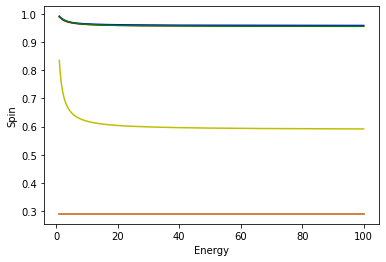

In [8]:
#stable x1 = J=0
zz = np.arange(0.01,0.99,1/200)

X11 = [[0, Z] for Z in zz]
X22 = [[2, Z] for Z in zz]
X33 = [[4, Z] for Z in zz]
X44 = [[10, Z] for Z in zz]
X55 = [[16, Z] for Z in zz]
X66 = [[20, Z] for Z in zz]
zz = 1/zz


plt.plot(zz, model.predict(X11),color = 'r' )
plt.plot(zz, model.predict(X22), color = 'b')
plt.plot(zz, model.predict(X33),color = 'g')
plt.plot(zz, model.predict(X44),color = 'y')
plt.plot(zz, model.predict(X55))
plt.plot(zz, model.predict(X66))
plt.xlabel("Energy")
plt.ylabel("Spin")
#plt.savefig('Weights/0.1/plt.png')
plt.show()


In [ ]:
model.predict (X )*K_b #g_0